In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import scipy as sc
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# %cd /drive/MyDrive
%rm -r results
%cp -av ./drive/MyDrive/results_csv results


Mounted at /content/drive
'./drive/MyDrive/results_csv' -> 'results'
'./drive/MyDrive/results_csv/NSFP' -> 'results/NSFP'
'./drive/MyDrive/results_csv/NSFP/logs25' -> 'results/NSFP/logs25'
'./drive/MyDrive/results_csv/NSFP/logs25/action' -> 'results/NSFP/logs25/action'
'./drive/MyDrive/results_csv/NSFP/logs25/action/csv' -> 'results/NSFP/logs25/action/csv'
'./drive/MyDrive/results_csv/NSFP/logs25/action/csv/run-Episode_E_Forcast_E_pred-tag-Episode_E_Forcast.csv' -> 'results/NSFP/logs25/action/csv/run-Episode_E_Forcast_E_pred-tag-Episode_E_Forcast.csv'
'./drive/MyDrive/results_csv/NSFP/logs25/action/csv/run-Episode_E_Forcast_E_actl-tag-Episode_E_Forcast.csv' -> 'results/NSFP/logs25/action/csv/run-Episode_E_Forcast_E_actl-tag-Episode_E_Forcast.csv'
'./drive/MyDrive/results_csv/NSFP/logs25/action/csv/run-Episode_E_E-tag-Episode_E.csv' -> 'results/NSFP/logs25/action/csv/run-Episode_E_E-tag-Episode_E.csv'
'./drive/MyDrive/results_csv/NSFP/logs25/action/csv/run-Episode_DP_DP-tag-Episode_DP.c

In [38]:

##################Data Preperation######################
BATT_LEVEL = 15000000 #mJ (mC * 3 = mJ)
scenarios = ['25', '50', '75', '100', '125', '150', '175', '200', '225', '250']
TSBOARD_SMOOTHING = [0.75]
plt.rcParams.update({'font.size': 14})
plt.rcParams["figure.figsize"] = [7, 4.50]
plt.rcParams["figure.autolayout"] = True

class Labeloffset():
    def __init__(self,  ax, label="", axis="y"):
        self.axis = {"y":ax.yaxis, "x":ax.xaxis}[axis]
        self.label=label
        ax.callbacks.connect(axis+'lim_changed', self.update)
        ax.figure.canvas.draw()
        self.update(None)

    def update(self, lim):
        fmt = self.axis.get_major_formatter()
        self.axis.offsetText.set_visible(False)
        self.axis.set_label_text(self.label + " "+ fmt.get_offset() )

### DataFrames ###
var_holder = {}
for nd in scenarios:
  try:
    var_holder['sdwise_action_' + nd + '_delay'] = pd.read_csv(f"results/SDWISE/logs{nd}/action/csv/run-Episode_D_D-tag-Episode_D.csv")
    var_holder['sdwise_action_' + nd + '_drop'] = pd.read_csv(f"results/SDWISE/logs{nd}/action/csv/run-Episode_DP_DP-tag-Episode_DP.csv")
    var_holder['sdwise_action_' + nd + '_engcons'] = pd.read_csv(f"results/SDWISE/logs{nd}/action/csv/run-Episode_EC_EC-tag-Episode_EC.csv")
    var_holder['sdwise_action_' + nd + '_engconsvar'] = pd.read_csv(f"results/SDWISE/logs{nd}/action/csv/run-Episode_EC_var_EC_var-tag-Episode_EC_var.csv")
    var_holder['sdwise_action_' + nd + '_renergy'] = pd.read_csv(f"results/SDWISE/logs{nd}/action/csv/run-Episode_E_E-tag-Episode_E.csv")
    var_holder['sdwise_action_' + nd + '_rtti'] = pd.read_csv(f"results/SDWISE/logs{nd}/action/csv/run-Episode_RT_RT-tag-Episode_RT.csv")
    var_holder['sdwise_action_' + nd + '_rttivar'] = pd.read_csv(f"results/SDWISE/logs{nd}/action/csv/run-Episode_RT_var_RT_var-tag-Episode_RT_var.csv")
    var_holder['sdwise_action_' + nd + '_return'] = pd.read_csv(f"results/SDWISE/logs{nd}/action/csv/run-Episode_R_R-tag-Episode_R.csv")
    var_holder['sdwise_action_' + nd + '_txpacketin'] = pd.read_csv(f"results/SDWISE/logs{nd}/action/csv/run-Episode_TX_in_TX_in-tag-Episode_TX_in.csv")
    var_holder['sdwise_action_' + nd + '_rxpacket'] = pd.read_csv(f"results/SDWISE/logs{nd}/action/csv/run-Episode_RX_RX-tag-Episode_RX.csv")
    var_holder['sdwise_action_' + nd + '_throughput'] = pd.read_csv(f"results/SDWISE/logs{nd}/action/csv/run-Episode_T_T-tag-Episode_T.csv")
    var_holder['sdwise_action_' + nd + '_rxpacketout'] = pd.read_csv(f"results/SDWISE/logs{nd}/action/csv/run-Episode_RX_out_RX_out-tag-Episode_RX_out.csv")
    var_holder['sdwise_action_' + nd + '_txpacket'] = pd.read_csv(f"results/SDWISE/logs{nd}/action/csv/run-Episode_TX_TX-tag-Episode_TX.csv")

    var_holder['atcp_action_' + nd + '_delay'] = pd.read_csv(f"results/ATCP/logs{nd}/action/csv/run-Episode_D_D-tag-Episode_D.csv")
    var_holder['atcp_action_' + nd + '_drop'] = pd.read_csv(f"results/ATCP/logs{nd}/action/csv/run-Episode_DP_DP-tag-Episode_DP.csv")
    var_holder['atcp_action_' + nd + '_engcons'] = pd.read_csv(f"results/ATCP/logs{nd}/action/csv/run-Episode_EC_EC-tag-Episode_EC.csv")
    var_holder['atcp_action_' + nd + '_engconsvar'] = pd.read_csv(f"results/ATCP/logs{nd}/action/csv/run-Episode_EC_var_EC_var-tag-Episode_EC_var.csv")
    var_holder['atcp_action_' + nd + '_renergy'] = pd.read_csv(f"results/ATCP/logs{nd}/action/csv/run-Episode_E_E-tag-Episode_E.csv")
    var_holder['atcp_action_' + nd + '_rtti'] = pd.read_csv(f"results/ATCP/logs{nd}/action/csv/run-Episode_RT_RT-tag-Episode_RT.csv")
    var_holder['atcp_action_' + nd + '_rttivar'] = pd.read_csv(f"results/ATCP/logs{nd}/action/csv/run-Episode_RT_var_RT_var-tag-Episode_RT_var.csv")
    var_holder['atcp_action_' + nd + '_return'] = pd.read_csv(f"results/ATCP/logs{nd}/action/csv/run-Episode_R_R-tag-Episode_R.csv")
    var_holder['atcp_action_' + nd + '_txpacketin'] = pd.read_csv(f"results/ATCP/logs{nd}/action/csv/run-Episode_TX_in_TX_in-tag-Episode_TX_in.csv")
    var_holder['atcp_action_' + nd + '_rxpacket'] = pd.read_csv(f"results/ATCP/logs{nd}/action/csv/run-Episode_RX_RX-tag-Episode_RX.csv")
    var_holder['atcp_action_' + nd + '_throughput'] = pd.read_csv(f"results/ATCP/logs{nd}/action/csv/run-Episode_T_T-tag-Episode_T.csv")
    var_holder['atcp_action_' + nd + '_rxpacketout'] = pd.read_csv(f"results/ATCP/logs{nd}/action/csv/run-Episode_RX_out_RX_out-tag-Episode_RX_out.csv")
    var_holder['atcp_action_' + nd + '_txpacket'] = pd.read_csv(f"results/ATCP/logs{nd}/action/csv/run-Episode_TX_TX-tag-Episode_TX.csv")
    var_holder['atcp_action_' + nd + '_policyloss'] = pd.read_csv(f"results/ATCP/logs{nd}/action/csv/run-Training_Policy_Loss_loss-tag-Training_Policy_Loss.csv")
    var_holder['atcp_action_' + nd + '_valueloss'] = pd.read_csv(f"results/ATCP/logs{nd}/action/csv/run-Training_Value_Loss_loss-tag-Training_Value_Loss.csv")

    var_holder['nsfp_action_' + nd + '_delay'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_D_D-tag-Episode_D.csv")
    var_holder['nsfp_action_' + nd + '_drop'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_DP_DP-tag-Episode_DP.csv")
    var_holder['nsfp_action_' + nd + '_engcons'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_EC_EC-tag-Episode_EC.csv")
    var_holder['nsfp_action_' + nd + '_engconsvar'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_EC_var_EC_var-tag-Episode_EC_var.csv")
    var_holder['nsfp_action_' + nd + '_renergy'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_E_E-tag-Episode_E.csv")
    var_holder['nsfp_action_' + nd + '_rtti'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_RT_RT-tag-Episode_RT.csv")
    var_holder['nsfp_action_' + nd + '_rttivar'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_RT_var_RT_var-tag-Episode_RT_var.csv")
    var_holder['nsfp_action_' + nd + '_return'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_R_R-tag-Episode_R.csv")
    var_holder['nsfp_action_' + nd + '_txpacketin'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_TX_in_TX_in-tag-Episode_TX_in.csv")
    var_holder['nsfp_action_' + nd + '_rxpacket'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_RX_RX-tag-Episode_RX.csv")
    var_holder['nsfp_action_' + nd + '_throughput'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_T_T-tag-Episode_T.csv")
    var_holder['nsfp_action_' + nd + '_rxpacketout'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_RX_out_RX_out-tag-Episode_RX_out.csv")
    var_holder['nsfp_action_' + nd + '_txpacket'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_TX_TX-tag-Episode_TX.csv")
    var_holder['nsfp_action_' + nd + '_policyloss'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Training_Policy_Loss_loss-tag-Training_Policy_Loss.csv")
    var_holder['nsfp_action_' + nd + '_valueloss'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Training_Value_Loss_loss-tag-Training_Value_Loss.csv")
    var_holder['nsfp_action_' + nd + '_renergy_forc_actl'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_E_Forcast_E_actl-tag-Episode_E_Forcast.csv")
    var_holder['nsfp_action_' + nd + '_renergy_forc_pred'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_E_Forcast_E_pred-tag-Episode_E_Forcast.csv")
    var_holder['nsfp_action_' + nd + '_rxbyte_forc_actl'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_RX_bytes_Forcast_RX_bytes_actl-tag-Episode_RX_bytes_Forcast.csv")
    var_holder['nsfp_action_' + nd + '_rxbyte_forc_pred'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_RX_bytes_Forcast_RX_bytes_pred-tag-Episode_RX_bytes_Forcast.csv")
    var_holder['nsfp_action_' + nd + '_rxpacket_forc_actl'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_RX_Forcast_RX_actl-tag-Episode_RX_Forcast.csv")
    var_holder['nsfp_action_' + nd + '_rxpacket_forc_pred'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_RX_Forcast_RX_pred-tag-Episode_RX_Forcast.csv")
    var_holder['nsfp_action_' + nd + '_txbyte_forc_actl'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_TX_bytes_Forcast_TX_bytes_actl-tag-Episode_TX_bytes_Forcast.csv")
    var_holder['nsfp_action_' + nd + '_txbyte_forc_pred'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_TX_bytes_Forcast_TX_bytes_pred-tag-Episode_TX_bytes_Forcast.csv")
    var_holder['nsfp_action_' + nd + '_txpacket_forc_actl'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_TX_Forcast_TX_actl-tag-Episode_TX_Forcast.csv")
    var_holder['nsfp_action_' + nd + '_txpacket_forc_pred'] = pd.read_csv(f"results/NSFP/logs{nd}/action/csv/run-Episode_TX_Forcast_TX_pred-tag-Episode_TX_Forcast.csv")

    var_holder['mp_atcnsf_action_' + nd + '_delay'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_D_D-tag-Episode_D.csv")
    var_holder['mp_atcnsf_action_' + nd + '_drop'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_DP_DP-tag-Episode_DP.csv")
    var_holder['mp_atcnsf_action_' + nd + '_engcons'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_EC_EC-tag-Episode_EC.csv")
    var_holder['mp_atcnsf_action_' + nd + '_engconsvar'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_EC_var_EC_var-tag-Episode_EC_var.csv")
    var_holder['mp_atcnsf_action_' + nd + '_renergy'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_E_E-tag-Episode_E.csv")
    var_holder['mp_atcnsf_action_' + nd + '_rtti'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_RT_RT-tag-Episode_RT.csv")
    var_holder['mp_atcnsf_action_' + nd + '_rttivar'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_RT_var_RT_var-tag-Episode_RT_var.csv")
    var_holder['mp_atcnsf_action_' + nd + '_return'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_R_R-tag-Episode_R.csv")
    var_holder['mp_atcnsf_action_' + nd + '_txpacketin'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_TX_in_TX_in-tag-Episode_TX_in.csv")
    var_holder['mp_atcnsf_action_' + nd + '_rxpacket'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_RX_RX-tag-Episode_RX.csv")
    var_holder['mp_atcnsf_action_' + nd + '_throughput'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_T_T-tag-Episode_T.csv")
    var_holder['mp_atcnsf_action_' + nd + '_rxpacketout'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_RX_out_RX_out-tag-Episode_RX_out.csv")
    var_holder['mp_atcnsf_action_' + nd + '_txpacket'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_TX_TX-tag-Episode_TX.csv")
    var_holder['mp_atcnsf_action_' + nd + '_policyloss'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Training_Policy_Loss_loss-tag-Training_Policy_Loss.csv")
    var_holder['mp_atcnsf_action_' + nd + '_valueloss'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Training_Value_Loss_loss-tag-Training_Value_Loss.csv")
    var_holder['mp_atcnsf_action_' + nd + '_renergy_forc_actl'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_E_Forcast_E_actl-tag-Episode_E_Forcast.csv")
    var_holder['mp_atcnsf_action_' + nd + '_renergy_forc_pred'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_E_Forcast_E_pred-tag-Episode_E_Forcast.csv")
    var_holder['mp_atcnsf_action_' + nd + '_rxbyte_forc_actl'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_RX_bytes_Forcast_RX_bytes_actl-tag-Episode_RX_bytes_Forcast.csv")
    var_holder['mp_atcnsf_action_' + nd + '_rxbyte_forc_pred'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_RX_bytes_Forcast_RX_bytes_pred-tag-Episode_RX_bytes_Forcast.csv")
    var_holder['mp_atcnsf_action_' + nd + '_rxpacket_forc_actl'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_RX_Forcast_RX_actl-tag-Episode_RX_Forcast.csv")
    var_holder['mp_atcnsf_action_' + nd + '_rxpacket_forc_pred'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_RX_Forcast_RX_pred-tag-Episode_RX_Forcast.csv")
    var_holder['mp_atcnsf_action_' + nd + '_txbyte_forc_actl'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_TX_bytes_Forcast_TX_bytes_actl-tag-Episode_TX_bytes_Forcast.csv")
    var_holder['mp_atcnsf_action_' + nd + '_txbyte_forc_pred'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_TX_bytes_Forcast_TX_bytes_pred-tag-Episode_TX_bytes_Forcast.csv")
    var_holder['mp_atcnsf_action_' + nd + '_txpacket_forc_actl'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_TX_Forcast_TX_actl-tag-Episode_TX_Forcast.csv")
    var_holder['mp_atcnsf_action_' + nd + '_txpacket_forc_pred'] = pd.read_csv(f"results/MP_ATCNSF/logs{nd}/action/csv/run-Episode_TX_Forcast_TX_pred-tag-Episode_TX_Forcast.csv")

    var_holder['rpls_action_' + nd + '_delay'] = pd.read_csv(f"results/RPLS/logs{nd}/action/csv/run-Episode_D_D-tag-Episode_D.csv")
    var_holder['rpls_action_' + nd + '_drop'] = pd.read_csv(f"results/RPLS/logs{nd}/action/csv/run-Episode_DP_DP-tag-Episode_DP.csv")
    var_holder['rpls_action_' + nd + '_engcons'] = pd.read_csv(f"results/RPLS/logs{nd}/action/csv/run-Episode_EC_EC-tag-Episode_EC.csv")
    var_holder['rpls_action_' + nd + '_engconsvar'] = pd.read_csv(f"results/RPLS/logs{nd}/action/csv/run-Episode_EC_var_EC_var-tag-Episode_EC_var.csv")
    var_holder['rpls_action_' + nd + '_renergy'] = pd.read_csv(f"results/RPLS/logs{nd}/action/csv/run-Episode_E_E-tag-Episode_E.csv")
    var_holder['rpls_action_' + nd + '_rtti'] = pd.read_csv(f"results/RPLS/logs{nd}/action/csv/run-Episode_RT_RT-tag-Episode_RT.csv")
    var_holder['rpls_action_' + nd + '_rttivar'] = pd.read_csv(f"results/RPLS/logs{nd}/action/csv/run-Episode_RT_var_RT_var-tag-Episode_RT_var.csv")
    var_holder['rpls_action_' + nd + '_return'] = pd.read_csv(f"results/RPLS/logs{nd}/action/csv/run-Episode_R_R-tag-Episode_R.csv")
    var_holder['rpls_action_' + nd + '_txpacketin'] = pd.read_csv(f"results/RPLS/logs{nd}/action/csv/run-Episode_TX_in_TX_in-tag-Episode_TX_in.csv")
    var_holder['rpls_action_' + nd + '_rxpacket'] = pd.read_csv(f"results/RPLS/logs{nd}/action/csv/run-Episode_RX_RX-tag-Episode_RX.csv")
    var_holder['rpls_action_' + nd + '_throughput'] = pd.read_csv(f"results/RPLS/logs{nd}/action/csv/run-Episode_T_T-tag-Episode_T.csv")
    var_holder['rpls_action_' + nd + '_rxpacketout'] = pd.read_csv(f"results/RPLS/logs{nd}/action/csv/run-Episode_RX_out_RX_out-tag-Episode_RX_out.csv")
    var_holder['rpls_action_' + nd + '_txpacket'] = pd.read_csv(f"results/RPLS/logs{nd}/action/csv/run-Episode_TX_TX-tag-Episode_TX.csv")
    var_holder['rpls_action_' + nd + '_loss'] = pd.read_csv(f"results/RPLS/logs{nd}/action/csv/run-Training_Loss_loss-tag-Training_Loss.csv")

    var_holder['drlir_action_' + nd + '_delay'] = pd.read_csv(f"results/DRLIR/logs{nd}/action/csv/run-Episode_D_D-tag-Episode_D.csv")
    var_holder['drlir_action_' + nd + '_drop'] = pd.read_csv(f"results/DRLIR/logs{nd}/action/csv/run-Episode_DP_DP-tag-Episode_DP.csv")
    var_holder['drlir_action_' + nd + '_engcons'] = pd.read_csv(f"results/DRLIR/logs{nd}/action/csv/run-Episode_EC_EC-tag-Episode_EC.csv")
    var_holder['drlir_action_' + nd + '_engconsvar'] = pd.read_csv(f"results/DRLIR/logs{nd}/action/csv/run-Episode_EC_var_EC_var-tag-Episode_EC_var.csv")
    var_holder['drlir_action_' + nd + '_renergy'] = pd.read_csv(f"results/DRLIR/logs{nd}/action/csv/run-Episode_E_E-tag-Episode_E.csv")
    var_holder['drlir_action_' + nd + '_rtti'] = pd.read_csv(f"results/DRLIR/logs{nd}/action/csv/run-Episode_RT_RT-tag-Episode_RT.csv")
    var_holder['drlir_action_' + nd + '_rttivar'] = pd.read_csv(f"results/DRLIR/logs{nd}/action/csv/run-Episode_RT_var_RT_var-tag-Episode_RT_var.csv")
    var_holder['drlir_action_' + nd + '_return'] = pd.read_csv(f"results/DRLIR/logs{nd}/action/csv/run-Episode_R_R-tag-Episode_R.csv")
    var_holder['drlir_action_' + nd + '_txpacketin'] = pd.read_csv(f"results/DRLIR/logs{nd}/action/csv/run-Episode_TX_in_TX_in-tag-Episode_TX_in.csv")
    var_holder['drlir_action_' + nd + '_rxpacket'] = pd.read_csv(f"results/DRLIR/logs{nd}/action/csv/run-Episode_RX_RX-tag-Episode_RX.csv")
    var_holder['drlir_action_' + nd + '_throughput'] = pd.read_csv(f"results/DRLIR/logs{nd}/action/csv/run-Episode_T_T-tag-Episode_T.csv")
    var_holder['drlir_action_' + nd + '_rxpacketout'] = pd.read_csv(f"results/DRLIR/logs{nd}/action/csv/run-Episode_RX_out_RX_out-tag-Episode_RX_out.csv")
    var_holder['drlir_action_' + nd + '_txpacket'] = pd.read_csv(f"results/DRLIR/logs{nd}/action/csv/run-Episode_TX_TX-tag-Episode_TX.csv")
    var_holder['drlir_action_' + nd + '_loss'] = pd.read_csv(f"results/DRLIR/logs{nd}/action/csv/run-Training_Loss_loss-tag-Training_Loss.csv")

    var_holder['rlsdwsn_action_' + nd + '_delay'] = pd.read_csv(f"results/RLSDWSN/logs{nd}/action/csv/run-Episode_D_D-tag-Episode_D.csv")
    var_holder['rlsdwsn_action_' + nd + '_drop'] = pd.read_csv(f"results/RLSDWSN/logs{nd}/action/csv/run-Episode_DP_DP-tag-Episode_DP.csv")
    var_holder['rlsdwsn_action_' + nd + '_engcons'] = pd.read_csv(f"results/RLSDWSN/logs{nd}/action/csv/run-Episode_EC_EC-tag-Episode_EC.csv")
    var_holder['rlsdwsn_action_' + nd + '_engconsvar'] = pd.read_csv(f"results/RLSDWSN/logs{nd}/action/csv/run-Episode_EC_var_EC_var-tag-Episode_EC_var.csv")
    var_holder['rlsdwsn_action_' + nd + '_renergy'] = pd.read_csv(f"results/RLSDWSN/logs{nd}/action/csv/run-Episode_E_E-tag-Episode_E.csv")
    var_holder['rlsdwsn_action_' + nd + '_rtti'] = pd.read_csv(f"results/RLSDWSN/logs{nd}/action/csv/run-Episode_RT_RT-tag-Episode_RT.csv")
    var_holder['rlsdwsn_action_' + nd + '_rttivar'] = pd.read_csv(f"results/RLSDWSN/logs{nd}/action/csv/run-Episode_RT_var_RT_var-tag-Episode_RT_var.csv")
    var_holder['rlsdwsn_action_' + nd + '_return'] = pd.read_csv(f"results/RLSDWSN/logs{nd}/action/csv/run-Episode_R_R-tag-Episode_R.csv")
    var_holder['rlsdwsn_action_' + nd + '_txpacketin'] = pd.read_csv(f"results/RLSDWSN/logs{nd}/action/csv/run-Episode_TX_in_TX_in-tag-Episode_TX_in.csv")
    var_holder['rlsdwsn_action_' + nd + '_rxpacket'] = pd.read_csv(f"results/RLSDWSN/logs{nd}/action/csv/run-Episode_RX_RX-tag-Episode_RX.csv")
    var_holder['rlsdwsn_action_' + nd + '_throughput'] = pd.read_csv(f"results/RLSDWSN/logs{nd}/action/csv/run-Episode_T_T-tag-Episode_T.csv")
    var_holder['rlsdwsn_action_' + nd + '_rxpacketout'] = pd.read_csv(f"results/RLSDWSN/logs{nd}/action/csv/run-Episode_RX_out_RX_out-tag-Episode_RX_out.csv")
    var_holder['rlsdwsn_action_' + nd + '_txpacket'] = pd.read_csv(f"results/RLSDWSN/logs{nd}/action/csv/run-Episode_TX_TX-tag-Episode_TX.csv")
    var_holder['rlsdwsn_action_' + nd + '_loss'] = pd.read_csv(f"results/RLSDWSN/logs{nd}/action/csv/run-Training_Loss_loss-tag-Training_Loss.csv")
  except:
    continue

locals().update(var_holder)
# def calculate_network_lifetime_at_t(scenarios_residual_energy, scenarios_energy_consumption, t, t_prime):
#     node_lifetimes = []

#     for i in range(len(scenarios_residual_energy)):
#         if scenarios_energy_consumption[i] != 0:  # Avoid division by zero
#             lt_i_t = scenarios_residual_energy[i] / scenarios_energy_consumption[i]
#             node_lifetimes.append(lt_i_t)
#         else:
#             node_lifetimes.append(float('inf'))  # Infinite lifetime if no energy consumption

#     network_lifetime_at_t = min(node_lifetimes)
#     return network_lifetime_at_t

# # Example usage
# scenarios_residual_energy = [1000, 900, 1100, 1200]  # Residual energy for each node at time t
# scenarios_energy_consumption = [10, 15, 12, 20]      # Energy consumption rate for each node at time t

# # Calculate network lifetime at time step t
# network_lifetime_at_t = calculate_network_lifetime_at_t(scenarios_residual_energy, scenarios_energy_consumption, 1, 5)
# print(f"Network Lifetime at time step t: {network_lifetime_at_t} seconds")


############# DATA ################
sdwise_action_25_engcons["Value"] = np.where(sdwise_action_25_engcons["Value"]<0, 0, sdwise_action_25_engcons["Value"])
sdwise_action_50_engcons["Value"] = np.where(sdwise_action_50_engcons["Value"]<0, 0, sdwise_action_50_engcons["Value"])
sdwise_action_75_engcons["Value"] = np.where(sdwise_action_75_engcons["Value"]<0, 0, sdwise_action_75_engcons["Value"])
sdwise_action_100_engcons["Value"] = np.where(sdwise_action_100_engcons["Value"]<0, 0, sdwise_action_100_engcons["Value"])
sdwise_action_125_engcons["Value"] = np.where(sdwise_action_125_engcons["Value"]<0, 0, sdwise_action_125_engcons["Value"])
sdwise_action_150_engcons["Value"] = np.where(sdwise_action_150_engcons["Value"]<0, 0, sdwise_action_150_engcons["Value"])
sdwise_action_175_engcons["Value"] = np.where(sdwise_action_175_engcons["Value"]<0, 0, sdwise_action_175_engcons["Value"])
sdwise_action_200_engcons["Value"] = np.where(sdwise_action_200_engcons["Value"]<0, 0, sdwise_action_200_engcons["Value"])
sdwise_action_225_engcons["Value"] = np.where(sdwise_action_225_engcons["Value"]<0, 0, sdwise_action_225_engcons["Value"])
sdwise_action_250_engcons["Value"] = np.where(sdwise_action_250_engcons["Value"]<0, 0, sdwise_action_250_engcons["Value"])
atcp_action_25_engcons["Value"] = np.where(atcp_action_25_engcons["Value"]<0, 0, atcp_action_25_engcons["Value"])
atcp_action_50_engcons["Value"] = np.where(atcp_action_50_engcons["Value"]<0, 0, atcp_action_50_engcons["Value"])
atcp_action_75_engcons["Value"] = np.where(atcp_action_75_engcons["Value"]<0, 0, atcp_action_75_engcons["Value"])
atcp_action_100_engcons["Value"] = np.where(atcp_action_100_engcons["Value"]<0, 0, atcp_action_100_engcons["Value"])
atcp_action_125_engcons["Value"] = np.where(atcp_action_125_engcons["Value"]<0, 0, atcp_action_125_engcons["Value"])
atcp_action_150_engcons["Value"] = np.where(atcp_action_150_engcons["Value"]<0, 0, atcp_action_150_engcons["Value"])
atcp_action_175_engcons["Value"] = np.where(atcp_action_175_engcons["Value"]<0, 0, atcp_action_175_engcons["Value"])
atcp_action_200_engcons["Value"] = np.where(atcp_action_200_engcons["Value"]<0, 0, atcp_action_200_engcons["Value"])
atcp_action_225_engcons["Value"] = np.where(atcp_action_225_engcons["Value"]<0, 0, atcp_action_225_engcons["Value"])
atcp_action_250_engcons["Value"] = np.where(atcp_action_250_engcons["Value"]<0, 0, atcp_action_250_engcons["Value"])
nsfp_action_25_engcons["Value"] = np.where(nsfp_action_25_engcons["Value"]<0, 0, nsfp_action_25_engcons["Value"])
nsfp_action_50_engcons["Value"] = np.where(nsfp_action_50_engcons["Value"]<0, 0, nsfp_action_50_engcons["Value"])
nsfp_action_75_engcons["Value"] = np.where(nsfp_action_75_engcons["Value"]<0, 0, nsfp_action_75_engcons["Value"])
nsfp_action_100_engcons["Value"] = np.where(nsfp_action_100_engcons["Value"]<0, 0, nsfp_action_100_engcons["Value"])
nsfp_action_125_engcons["Value"] = np.where(nsfp_action_125_engcons["Value"]<0, 0, nsfp_action_125_engcons["Value"])
nsfp_action_150_engcons["Value"] = np.where(nsfp_action_150_engcons["Value"]<0, 0, nsfp_action_150_engcons["Value"])
nsfp_action_175_engcons["Value"] = np.where(nsfp_action_175_engcons["Value"]<0, 0, nsfp_action_175_engcons["Value"])
nsfp_action_200_engcons["Value"] = np.where(nsfp_action_200_engcons["Value"]<0, 0, nsfp_action_200_engcons["Value"])
nsfp_action_225_engcons["Value"] = np.where(nsfp_action_225_engcons["Value"]<0, 0, nsfp_action_225_engcons["Value"])
nsfp_action_250_engcons["Value"] = np.where(nsfp_action_250_engcons["Value"]<0, 0, nsfp_action_250_engcons["Value"])
mp_atcnsf_action_25_engcons["Value"] = np.where(mp_atcnsf_action_25_engcons["Value"]<0, 0, mp_atcnsf_action_25_engcons["Value"])
mp_atcnsf_action_50_engcons["Value"] = np.where(mp_atcnsf_action_50_engcons["Value"]<0, 0, mp_atcnsf_action_50_engcons["Value"])
mp_atcnsf_action_75_engcons["Value"] = np.where(mp_atcnsf_action_75_engcons["Value"]<0, 0, mp_atcnsf_action_75_engcons["Value"])
mp_atcnsf_action_100_engcons["Value"] = np.where(mp_atcnsf_action_100_engcons["Value"]<0, 0, mp_atcnsf_action_100_engcons["Value"])
mp_atcnsf_action_125_engcons["Value"] = np.where(mp_atcnsf_action_125_engcons["Value"]<0, 0, mp_atcnsf_action_125_engcons["Value"])
mp_atcnsf_action_150_engcons["Value"] = np.where(mp_atcnsf_action_150_engcons["Value"]<0, 0, mp_atcnsf_action_150_engcons["Value"])
mp_atcnsf_action_175_engcons["Value"] = np.where(mp_atcnsf_action_175_engcons["Value"]<0, 0, mp_atcnsf_action_175_engcons["Value"])
mp_atcnsf_action_200_engcons["Value"] = np.where(mp_atcnsf_action_200_engcons["Value"]<0, 0, mp_atcnsf_action_200_engcons["Value"])
mp_atcnsf_action_225_engcons["Value"] = np.where(mp_atcnsf_action_225_engcons["Value"]<0, 0, mp_atcnsf_action_225_engcons["Value"])
mp_atcnsf_action_250_engcons["Value"] = np.where(mp_atcnsf_action_250_engcons["Value"]<0, 0, mp_atcnsf_action_250_engcons["Value"])
rpls_action_25_engcons["Value"] = np.where(rpls_action_25_engcons["Value"]<0, 0, rpls_action_25_engcons["Value"])
rpls_action_50_engcons["Value"] = np.where(rpls_action_50_engcons["Value"]<0, 0, rpls_action_50_engcons["Value"])
rpls_action_75_engcons["Value"] = np.where(rpls_action_75_engcons["Value"]<0, 0, rpls_action_75_engcons["Value"])
rpls_action_100_engcons["Value"] = np.where(rpls_action_100_engcons["Value"]<0, 0, rpls_action_100_engcons["Value"])
rpls_action_125_engcons["Value"] = np.where(rpls_action_125_engcons["Value"]<0, 0, rpls_action_125_engcons["Value"])
rpls_action_150_engcons["Value"] = np.where(rpls_action_150_engcons["Value"]<0, 0, rpls_action_150_engcons["Value"])
rpls_action_175_engcons["Value"] = np.where(rpls_action_175_engcons["Value"]<0, 0, rpls_action_175_engcons["Value"])
rpls_action_200_engcons["Value"] = np.where(rpls_action_200_engcons["Value"]<0, 0, rpls_action_200_engcons["Value"])
rpls_action_225_engcons["Value"] = np.where(rpls_action_225_engcons["Value"]<0, 0, rpls_action_225_engcons["Value"])
rpls_action_250_engcons["Value"] = np.where(rpls_action_250_engcons["Value"]<0, 0, rpls_action_250_engcons["Value"])
drlir_action_25_engcons["Value"] = np.where(drlir_action_25_engcons["Value"]<0, 0, drlir_action_25_engcons["Value"])
drlir_action_50_engcons["Value"] = np.where(drlir_action_50_engcons["Value"]<0, 0, drlir_action_50_engcons["Value"])
drlir_action_75_engcons["Value"] = np.where(drlir_action_75_engcons["Value"]<0, 0, drlir_action_75_engcons["Value"])
drlir_action_100_engcons["Value"] = np.where(drlir_action_100_engcons["Value"]<0, 0, drlir_action_100_engcons["Value"])
drlir_action_125_engcons["Value"] = np.where(drlir_action_125_engcons["Value"]<0, 0, drlir_action_125_engcons["Value"])
drlir_action_150_engcons["Value"] = np.where(drlir_action_150_engcons["Value"]<0, 0, drlir_action_150_engcons["Value"])
drlir_action_175_engcons["Value"] = np.where(drlir_action_175_engcons["Value"]<0, 0, drlir_action_175_engcons["Value"])
drlir_action_200_engcons["Value"] = np.where(drlir_action_200_engcons["Value"]<0, 0, drlir_action_200_engcons["Value"])
drlir_action_225_engcons["Value"] = np.where(drlir_action_225_engcons["Value"]<0, 0, drlir_action_225_engcons["Value"])
drlir_action_250_engcons["Value"] = np.where(drlir_action_250_engcons["Value"]<0, 0, drlir_action_250_engcons["Value"])
rlsdwsn_action_25_engcons["Value"] = np.where(rlsdwsn_action_25_engcons["Value"]<0, 0, rlsdwsn_action_25_engcons["Value"])
rlsdwsn_action_50_engcons["Value"] = np.where(rlsdwsn_action_50_engcons["Value"]<0, 0, rlsdwsn_action_50_engcons["Value"])
rlsdwsn_action_75_engcons["Value"] = np.where(rlsdwsn_action_75_engcons["Value"]<0, 0, rlsdwsn_action_75_engcons["Value"])
rlsdwsn_action_100_engcons["Value"] = np.where(rlsdwsn_action_100_engcons["Value"]<0, 0, rlsdwsn_action_100_engcons["Value"])
rlsdwsn_action_125_engcons["Value"] = np.where(rlsdwsn_action_125_engcons["Value"]<0, 0, rlsdwsn_action_125_engcons["Value"])
rlsdwsn_action_150_engcons["Value"] = np.where(rlsdwsn_action_150_engcons["Value"]<0, 0, rlsdwsn_action_150_engcons["Value"])
rlsdwsn_action_175_engcons["Value"] = np.where(rlsdwsn_action_175_engcons["Value"]<0, 0, rlsdwsn_action_175_engcons["Value"])
rlsdwsn_action_200_engcons["Value"] = np.where(rlsdwsn_action_200_engcons["Value"]<0, 0, rlsdwsn_action_200_engcons["Value"])
rlsdwsn_action_225_engcons["Value"] = np.where(rlsdwsn_action_225_engcons["Value"]<0, 0, rlsdwsn_action_225_engcons["Value"])
rlsdwsn_action_250_engcons["Value"] = np.where(rlsdwsn_action_250_engcons["Value"]<0, 0, rlsdwsn_action_250_engcons["Value"])

data = pd.DataFrame({'scenarios': scenarios,
  'delay_action_atcp': [atcp_action_25_delay["Value"].mean(), atcp_action_50_delay["Value"].mean(), atcp_action_75_delay["Value"].mean(), atcp_action_100_delay["Value"].mean(), atcp_action_125_delay["Value"].mean(), atcp_action_150_delay["Value"].mean(), atcp_action_175_delay["Value"].mean(), atcp_action_200_delay["Value"].mean(), atcp_action_225_delay["Value"].mean(), atcp_action_250_delay["Value"].mean()],
  'delay_action_nsfp': [nsfp_action_25_delay["Value"].mean(), nsfp_action_50_delay["Value"].mean(), nsfp_action_75_delay["Value"].mean(), nsfp_action_100_delay["Value"].mean(), nsfp_action_125_delay["Value"].mean(), nsfp_action_150_delay["Value"].mean(), nsfp_action_175_delay["Value"].mean(), nsfp_action_200_delay["Value"].mean(), nsfp_action_225_delay["Value"].mean(), nsfp_action_250_delay["Value"].mean()],
  'delay_action_mp_atcnsf': [mp_atcnsf_action_25_delay["Value"].mean(), mp_atcnsf_action_50_delay["Value"].mean(), mp_atcnsf_action_75_delay["Value"].mean(), mp_atcnsf_action_100_delay["Value"].mean(), mp_atcnsf_action_125_delay["Value"].mean(), mp_atcnsf_action_150_delay["Value"].mean(), mp_atcnsf_action_175_delay["Value"].mean(), mp_atcnsf_action_200_delay["Value"].mean(), mp_atcnsf_action_225_delay["Value"].mean(), mp_atcnsf_action_250_delay["Value"].mean()],
  'delay_action_rpls': [rpls_action_25_delay["Value"].mean(), rpls_action_50_delay["Value"].mean(), rpls_action_75_delay["Value"].mean(), rpls_action_100_delay["Value"].mean(), rpls_action_125_delay["Value"].mean(), rpls_action_150_delay["Value"].mean(), rpls_action_175_delay["Value"].mean(), rpls_action_200_delay["Value"].mean(), rpls_action_225_delay["Value"].mean(), rpls_action_250_delay["Value"].mean()],
  'delay_action_drlir': [drlir_action_25_delay["Value"].mean(), drlir_action_50_delay["Value"].mean(), drlir_action_75_delay["Value"].mean(), drlir_action_100_delay["Value"].mean(), drlir_action_125_delay["Value"].mean(), drlir_action_150_delay["Value"].mean(), drlir_action_175_delay["Value"].mean(), drlir_action_200_delay["Value"].mean(), drlir_action_225_delay["Value"].mean(), drlir_action_250_delay["Value"].mean()],
  'delay_action_rlsdwsn': [rlsdwsn_action_25_delay["Value"].mean(), rlsdwsn_action_50_delay["Value"].mean(), rlsdwsn_action_75_delay["Value"].mean(), rlsdwsn_action_100_delay["Value"].mean(), rlsdwsn_action_125_delay["Value"].mean(), rlsdwsn_action_150_delay["Value"].mean(), rlsdwsn_action_175_delay["Value"].mean(), rlsdwsn_action_200_delay["Value"].mean(), rlsdwsn_action_225_delay["Value"].mean(), rlsdwsn_action_250_delay["Value"].mean()],
  'delay_action_sdwise': [sdwise_action_25_delay["Value"].mean(), sdwise_action_50_delay["Value"].mean(), sdwise_action_75_delay["Value"].mean(), sdwise_action_100_delay["Value"].mean(), sdwise_action_125_delay["Value"].mean(), sdwise_action_150_delay["Value"].mean(), sdwise_action_175_delay["Value"].mean(), sdwise_action_200_delay["Value"].mean(), sdwise_action_225_delay["Value"].mean(), sdwise_action_250_delay["Value"].mean()],
  'throughput_action_atcp': [atcp_action_25_throughput["Value"].mean(), atcp_action_50_throughput["Value"].mean(), atcp_action_75_throughput["Value"].mean(), atcp_action_100_throughput["Value"].mean(), atcp_action_125_throughput["Value"].mean(), atcp_action_150_throughput["Value"].mean(), atcp_action_175_throughput["Value"].mean(), atcp_action_200_throughput["Value"].mean(), atcp_action_225_throughput["Value"].mean(), atcp_action_250_throughput["Value"].mean()],
  'throughput_action_nsfp': [nsfp_action_25_throughput["Value"].mean(), nsfp_action_50_throughput["Value"].mean(), nsfp_action_75_throughput["Value"].mean(), nsfp_action_100_throughput["Value"].mean(), nsfp_action_125_throughput["Value"].mean(), nsfp_action_150_throughput["Value"].mean(), nsfp_action_175_throughput["Value"].mean(), nsfp_action_200_throughput["Value"].mean(), nsfp_action_225_throughput["Value"].mean(), nsfp_action_250_throughput["Value"].mean()],
  'throughput_action_mp_atcnsf': [mp_atcnsf_action_25_throughput["Value"].mean(), mp_atcnsf_action_50_throughput["Value"].mean(), mp_atcnsf_action_75_throughput["Value"].mean(), mp_atcnsf_action_100_throughput["Value"].mean(), mp_atcnsf_action_125_throughput["Value"].mean(), mp_atcnsf_action_150_throughput["Value"].mean(), mp_atcnsf_action_175_throughput["Value"].mean(), mp_atcnsf_action_200_throughput["Value"].mean(), mp_atcnsf_action_225_throughput["Value"].mean(), mp_atcnsf_action_250_throughput["Value"].mean()],
  'throughput_action_rpls': [rpls_action_25_throughput["Value"].mean(), rpls_action_50_throughput["Value"].mean(), rpls_action_75_throughput["Value"].mean(), rpls_action_100_throughput["Value"].mean(), rpls_action_125_throughput["Value"].mean(), rpls_action_150_throughput["Value"].mean(), rpls_action_175_throughput["Value"].mean(), rpls_action_200_throughput["Value"].mean(), rpls_action_225_throughput["Value"].mean(), rpls_action_250_throughput["Value"].mean()],
  'throughput_action_drlir': [drlir_action_25_throughput["Value"].mean(), drlir_action_50_throughput["Value"].mean(), drlir_action_75_throughput["Value"].mean(), drlir_action_100_throughput["Value"].mean(), drlir_action_125_throughput["Value"].mean(), drlir_action_150_throughput["Value"].mean(), drlir_action_175_throughput["Value"].mean(), drlir_action_200_throughput["Value"].mean(), drlir_action_225_throughput["Value"].mean(), drlir_action_250_throughput["Value"].mean()],
  'throughput_action_rlsdwsn': [rlsdwsn_action_25_throughput["Value"].mean(), rlsdwsn_action_50_throughput["Value"].mean(), rlsdwsn_action_75_throughput["Value"].mean(), rlsdwsn_action_100_throughput["Value"].mean(), rlsdwsn_action_125_throughput["Value"].mean(), rlsdwsn_action_150_throughput["Value"].mean(), rlsdwsn_action_175_throughput["Value"].mean(), rlsdwsn_action_200_throughput["Value"].mean(), rlsdwsn_action_225_throughput["Value"].mean(), rlsdwsn_action_250_throughput["Value"].mean()],
  'throughput_action_sdwise': [sdwise_action_25_throughput["Value"].mean(), sdwise_action_50_throughput["Value"].mean(), sdwise_action_75_throughput["Value"].mean(), sdwise_action_100_throughput["Value"].mean(), sdwise_action_125_throughput["Value"].mean(), sdwise_action_150_throughput["Value"].mean(), sdwise_action_175_throughput["Value"].mean(), sdwise_action_200_throughput["Value"].mean(), sdwise_action_225_throughput["Value"].mean(), sdwise_action_250_throughput["Value"].mean()],
  'renergy_action_atcp': [atcp_action_25_renergy["Value"].mean()*3, atcp_action_50_renergy["Value"].mean()*3, atcp_action_75_renergy["Value"].mean()*3, atcp_action_100_renergy["Value"].mean()*3, atcp_action_125_renergy["Value"].mean()*3, atcp_action_150_renergy["Value"].mean()*3, atcp_action_175_renergy["Value"].mean()*3, atcp_action_200_renergy["Value"].mean()*3, atcp_action_225_renergy["Value"].mean()*3, atcp_action_250_renergy["Value"].mean()*3],
  'renergy_action_nsfp': [nsfp_action_25_renergy["Value"].mean()*3, nsfp_action_50_renergy["Value"].mean()*3, nsfp_action_75_renergy["Value"].mean()*3, nsfp_action_100_renergy["Value"].mean()*3, nsfp_action_125_renergy["Value"].mean()*3, nsfp_action_150_renergy["Value"].mean()*3, nsfp_action_175_renergy["Value"].mean()*3, nsfp_action_200_renergy["Value"].mean()*3, nsfp_action_225_renergy["Value"].mean()*3, nsfp_action_250_renergy["Value"].mean()*3],
  'renergy_action_mp_atcnsf': [mp_atcnsf_action_25_renergy["Value"].mean()*3, mp_atcnsf_action_50_renergy["Value"].mean()*3, mp_atcnsf_action_75_renergy["Value"].mean()*3, mp_atcnsf_action_100_renergy["Value"].mean()*3, mp_atcnsf_action_125_renergy["Value"].mean()*3, mp_atcnsf_action_150_renergy["Value"].mean()*3, mp_atcnsf_action_175_renergy["Value"].mean()*3, mp_atcnsf_action_200_renergy["Value"].mean()*3, mp_atcnsf_action_225_renergy["Value"].mean()*3, mp_atcnsf_action_250_renergy["Value"].mean()*3],
  'renergy_action_rpls': [rpls_action_25_renergy["Value"].mean()*3, rpls_action_50_renergy["Value"].mean()*3, rpls_action_75_renergy["Value"].mean()*3, rpls_action_100_renergy["Value"].mean()*3, rpls_action_125_renergy["Value"].mean()*3, rpls_action_150_renergy["Value"].mean()*3, rpls_action_175_renergy["Value"].mean()*3, rpls_action_200_renergy["Value"].mean()*3, rpls_action_225_renergy["Value"].mean()*3, rpls_action_250_renergy["Value"].mean()*3],
  'renergy_action_drlir': [drlir_action_25_renergy["Value"].mean()*3, drlir_action_50_renergy["Value"].mean()*3, drlir_action_75_renergy["Value"].mean()*3, drlir_action_100_renergy["Value"].mean()*3, drlir_action_125_renergy["Value"].mean()*3, drlir_action_150_renergy["Value"].mean()*3, drlir_action_175_renergy["Value"].mean()*3, drlir_action_200_renergy["Value"].mean()*3, drlir_action_225_renergy["Value"].mean()*3, drlir_action_250_renergy["Value"].mean()*3],
  'renergy_action_rlsdwsn': [rlsdwsn_action_25_renergy["Value"].mean()*3, rlsdwsn_action_50_renergy["Value"].mean()*3, rlsdwsn_action_75_renergy["Value"].mean()*3, rlsdwsn_action_100_renergy["Value"].mean()*3, rlsdwsn_action_125_renergy["Value"].mean()*3, rlsdwsn_action_150_renergy["Value"].mean()*3, rlsdwsn_action_175_renergy["Value"].mean()*3, rlsdwsn_action_200_renergy["Value"].mean()*3, rlsdwsn_action_225_renergy["Value"].mean()*3, rlsdwsn_action_250_renergy["Value"].mean()*3],
  'renergy_action_sdwise': [sdwise_action_25_renergy["Value"].mean()*3, sdwise_action_50_renergy["Value"].mean()*3, sdwise_action_75_renergy["Value"].mean()*3, sdwise_action_100_renergy["Value"].mean()*3, sdwise_action_125_renergy["Value"].mean()*3, sdwise_action_150_renergy["Value"].mean()*3, sdwise_action_175_renergy["Value"].mean()*3, sdwise_action_200_renergy["Value"].mean()*3, sdwise_action_225_renergy["Value"].mean()*3, sdwise_action_250_renergy["Value"].mean()*3],
  'engcons_action_atcp': [atcp_action_25_engcons["Value"].mean(), atcp_action_50_engcons["Value"].mean(), atcp_action_75_engcons["Value"].mean(), atcp_action_100_engcons["Value"].mean(), atcp_action_125_engcons["Value"].mean(), atcp_action_150_engcons["Value"].mean(), atcp_action_175_engcons["Value"].mean(), atcp_action_200_engcons["Value"].mean(), atcp_action_225_engcons["Value"].mean(), atcp_action_250_engcons["Value"].mean()],
  'engcons_action_nsfp': [nsfp_action_25_engcons["Value"].mean(), nsfp_action_50_engcons["Value"].mean(), nsfp_action_75_engcons["Value"].mean(), nsfp_action_100_engcons["Value"].mean(), nsfp_action_125_engcons["Value"].mean(), nsfp_action_150_engcons["Value"].mean(), nsfp_action_175_engcons["Value"].mean(), nsfp_action_200_engcons["Value"].mean(), nsfp_action_225_engcons["Value"].mean(), nsfp_action_250_engcons["Value"].mean()],
  'engcons_action_mp_atcnsf': [mp_atcnsf_action_25_engcons["Value"].mean(), mp_atcnsf_action_50_engcons["Value"].mean(), mp_atcnsf_action_75_engcons["Value"].mean(), mp_atcnsf_action_100_engcons["Value"].mean(), mp_atcnsf_action_125_engcons["Value"].mean(), mp_atcnsf_action_150_engcons["Value"].mean(), mp_atcnsf_action_175_engcons["Value"].mean(), mp_atcnsf_action_200_engcons["Value"].mean(), mp_atcnsf_action_225_engcons["Value"].mean(), mp_atcnsf_action_250_engcons["Value"].mean()],
  'engcons_action_rpls': [rpls_action_25_engcons["Value"].mean(), rpls_action_50_engcons["Value"].mean(), rpls_action_75_engcons["Value"].mean(), rpls_action_100_engcons["Value"].mean(), rpls_action_125_engcons["Value"].mean(), rpls_action_150_engcons["Value"].mean(), rpls_action_175_engcons["Value"].mean(), rpls_action_200_engcons["Value"].mean(), rpls_action_225_engcons["Value"].mean(), rpls_action_250_engcons["Value"].mean()],
  'engcons_action_drlir': [drlir_action_25_engcons["Value"].mean(), drlir_action_50_engcons["Value"].mean(), drlir_action_75_engcons["Value"].mean(), drlir_action_100_engcons["Value"].mean(), drlir_action_125_engcons["Value"].mean(), drlir_action_150_engcons["Value"].mean(), drlir_action_175_engcons["Value"].mean(), drlir_action_200_engcons["Value"].mean(), drlir_action_225_engcons["Value"].mean(), drlir_action_250_engcons["Value"].mean()],
  'engcons_action_rlsdwsn': [rlsdwsn_action_25_engcons["Value"].mean(), rlsdwsn_action_50_engcons["Value"].mean(), rlsdwsn_action_75_engcons["Value"].mean(), rlsdwsn_action_100_engcons["Value"].mean(), rlsdwsn_action_125_engcons["Value"].mean(), rlsdwsn_action_150_engcons["Value"].mean(), rlsdwsn_action_175_engcons["Value"].mean(), rlsdwsn_action_200_engcons["Value"].mean(), rlsdwsn_action_225_engcons["Value"].mean(), rlsdwsn_action_250_engcons["Value"].mean()],
  'engcons_action_sdwise': [sdwise_action_25_engcons["Value"].mean(), sdwise_action_50_engcons["Value"].mean(), sdwise_action_75_engcons["Value"].mean(), sdwise_action_100_engcons["Value"].mean(), sdwise_action_125_engcons["Value"].mean(), sdwise_action_150_engcons["Value"].mean(), sdwise_action_175_engcons["Value"].mean(), sdwise_action_200_engcons["Value"].mean(), sdwise_action_225_engcons["Value"].mean(), sdwise_action_250_engcons["Value"].mean()],
  'txpacketin_action_atcp': [atcp_action_25_txpacketin["Value"].mean(), atcp_action_50_txpacketin["Value"].mean(), atcp_action_75_txpacketin["Value"].mean(), atcp_action_100_txpacketin["Value"].mean(), atcp_action_125_txpacketin["Value"].mean(), atcp_action_150_txpacketin["Value"].mean(), atcp_action_175_txpacketin["Value"].mean(), atcp_action_200_txpacketin["Value"].mean(), atcp_action_225_txpacketin["Value"].mean(), atcp_action_250_txpacketin["Value"].mean()],
  'txpacketin_action_nsfp': [nsfp_action_25_txpacketin["Value"].mean(), nsfp_action_50_txpacketin["Value"].mean(), nsfp_action_75_txpacketin["Value"].mean(), nsfp_action_100_txpacketin["Value"].mean(), nsfp_action_125_txpacketin["Value"].mean(), nsfp_action_150_txpacketin["Value"].mean(), nsfp_action_175_txpacketin["Value"].mean(), nsfp_action_200_txpacketin["Value"].mean(), nsfp_action_225_txpacketin["Value"].mean(), nsfp_action_250_txpacketin["Value"].mean()],
  'txpacketin_action_mp_atcnsf': [mp_atcnsf_action_25_txpacketin["Value"].mean(), mp_atcnsf_action_50_txpacketin["Value"].mean(), mp_atcnsf_action_75_txpacketin["Value"].mean(), mp_atcnsf_action_100_txpacketin["Value"].mean(), mp_atcnsf_action_125_txpacketin["Value"].mean(), mp_atcnsf_action_150_txpacketin["Value"].mean(), mp_atcnsf_action_175_txpacketin["Value"].mean(), mp_atcnsf_action_200_txpacketin["Value"].mean(), mp_atcnsf_action_225_txpacketin["Value"].mean(), mp_atcnsf_action_250_txpacketin["Value"].mean()],
  'txpacketin_action_rpls': [rpls_action_25_txpacketin["Value"].mean(), rpls_action_50_txpacketin["Value"].mean(), rpls_action_75_txpacketin["Value"].mean(), rpls_action_100_txpacketin["Value"].mean(), rpls_action_125_txpacketin["Value"].mean(), rpls_action_150_txpacketin["Value"].mean(), rpls_action_175_txpacketin["Value"].mean(), rpls_action_200_txpacketin["Value"].mean(), rpls_action_225_txpacketin["Value"].mean(), rpls_action_250_txpacketin["Value"].mean()],
  'txpacketin_action_drlir': [drlir_action_25_txpacketin["Value"].mean(), drlir_action_50_txpacketin["Value"].mean(), drlir_action_75_txpacketin["Value"].mean(), drlir_action_100_txpacketin["Value"].mean(), drlir_action_125_txpacketin["Value"].mean(), drlir_action_150_txpacketin["Value"].mean(), drlir_action_175_txpacketin["Value"].mean(), drlir_action_200_txpacketin["Value"].mean(), drlir_action_225_txpacketin["Value"].mean(), drlir_action_250_txpacketin["Value"].mean()],
  'txpacketin_action_rlsdwsn': [rlsdwsn_action_25_txpacketin["Value"].mean(), rlsdwsn_action_50_txpacketin["Value"].mean(), rlsdwsn_action_75_txpacketin["Value"].mean(), rlsdwsn_action_100_txpacketin["Value"].mean(), rlsdwsn_action_125_txpacketin["Value"].mean(), rlsdwsn_action_150_txpacketin["Value"].mean(), rlsdwsn_action_175_txpacketin["Value"].mean(), rlsdwsn_action_200_txpacketin["Value"].mean(), rlsdwsn_action_225_txpacketin["Value"].mean(), rlsdwsn_action_250_txpacketin["Value"].mean()],
  'txpacketin_action_sdwise': [sdwise_action_25_txpacketin["Value"].mean(), sdwise_action_50_txpacketin["Value"].mean(), sdwise_action_75_txpacketin["Value"].mean(), sdwise_action_100_txpacketin["Value"].mean(), sdwise_action_125_txpacketin["Value"].mean(), sdwise_action_150_txpacketin["Value"].mean(), sdwise_action_175_txpacketin["Value"].mean(), sdwise_action_200_txpacketin["Value"].mean(), sdwise_action_225_txpacketin["Value"].mean(), sdwise_action_250_txpacketin["Value"].mean()],
  'drop_action_atcp': [atcp_action_25_drop["Value"].mean(), atcp_action_50_drop["Value"].mean(), atcp_action_75_drop["Value"].mean(), atcp_action_100_drop["Value"].mean(), atcp_action_125_drop["Value"].mean(), atcp_action_150_drop["Value"].mean(), atcp_action_175_drop["Value"].mean(), atcp_action_200_drop["Value"].mean(), atcp_action_225_drop["Value"].mean(), atcp_action_250_drop["Value"].mean()],
  'drop_action_nsfp': [nsfp_action_25_drop["Value"].mean(), nsfp_action_50_drop["Value"].mean(), nsfp_action_75_drop["Value"].mean(), nsfp_action_100_drop["Value"].mean(), nsfp_action_125_drop["Value"].mean(), nsfp_action_150_drop["Value"].mean(), nsfp_action_175_drop["Value"].mean(), nsfp_action_200_drop["Value"].mean(), nsfp_action_225_drop["Value"].mean(), nsfp_action_250_drop["Value"].mean()],
  'drop_action_mp_atcnsf': [mp_atcnsf_action_25_drop["Value"].mean(), mp_atcnsf_action_50_drop["Value"].mean(), mp_atcnsf_action_75_drop["Value"].mean(), mp_atcnsf_action_100_drop["Value"].mean(), mp_atcnsf_action_125_drop["Value"].mean(), mp_atcnsf_action_150_drop["Value"].mean(), mp_atcnsf_action_175_drop["Value"].mean(), mp_atcnsf_action_200_drop["Value"].mean(), mp_atcnsf_action_225_drop["Value"].mean(), mp_atcnsf_action_250_drop["Value"].mean()],
  'drop_action_rpls': [rpls_action_25_drop["Value"].mean(), rpls_action_50_drop["Value"].mean(), rpls_action_75_drop["Value"].mean(), rpls_action_100_drop["Value"].mean(), rpls_action_125_drop["Value"].mean(), rpls_action_150_drop["Value"].mean(), rpls_action_175_drop["Value"].mean(), rpls_action_200_drop["Value"].mean(), rpls_action_225_drop["Value"].mean(), rpls_action_250_drop["Value"].mean()],
  'drop_action_drlir': [drlir_action_25_drop["Value"].mean(), drlir_action_50_drop["Value"].mean(), drlir_action_75_drop["Value"].mean(), drlir_action_100_drop["Value"].mean(), drlir_action_125_drop["Value"].mean(), drlir_action_150_drop["Value"].mean(), drlir_action_175_drop["Value"].mean(), drlir_action_200_drop["Value"].mean(), drlir_action_225_drop["Value"].mean(), drlir_action_250_drop["Value"].mean()],
  'drop_action_rlsdwsn': [rlsdwsn_action_25_drop["Value"].mean(), rlsdwsn_action_50_drop["Value"].mean(), rlsdwsn_action_75_drop["Value"].mean(), rlsdwsn_action_100_drop["Value"].mean(), rlsdwsn_action_125_drop["Value"].mean(), rlsdwsn_action_150_drop["Value"].mean(), rlsdwsn_action_175_drop["Value"].mean(), rlsdwsn_action_200_drop["Value"].mean(), rlsdwsn_action_225_drop["Value"].mean(), rlsdwsn_action_250_drop["Value"].mean()],
  'drop_action_sdwise': [sdwise_action_25_drop["Value"].mean(), sdwise_action_50_drop["Value"].mean(), sdwise_action_75_drop["Value"].mean(), sdwise_action_100_drop["Value"].mean(), sdwise_action_125_drop["Value"].mean(), sdwise_action_150_drop["Value"].mean(), sdwise_action_175_drop["Value"].mean(), sdwise_action_200_drop["Value"].mean(), sdwise_action_225_drop["Value"].mean(), sdwise_action_250_drop["Value"].mean()],
  'engconsvar_action_atcp': [atcp_action_25_engconsvar["Value"].mean(), atcp_action_50_engconsvar["Value"].mean(), atcp_action_75_engconsvar["Value"].mean(), atcp_action_100_engconsvar["Value"].mean(), atcp_action_125_engconsvar["Value"].mean(), atcp_action_150_engconsvar["Value"].mean(), atcp_action_175_engconsvar["Value"].mean(), atcp_action_200_engconsvar["Value"].mean(), atcp_action_225_engconsvar["Value"].mean(), atcp_action_250_engconsvar["Value"].mean()],
  'engconsvar_action_nsfp': [nsfp_action_25_engconsvar["Value"].mean(), nsfp_action_50_engconsvar["Value"].mean(), nsfp_action_75_engconsvar["Value"].mean(), nsfp_action_100_engconsvar["Value"].mean(), nsfp_action_125_engconsvar["Value"].mean(), nsfp_action_150_engconsvar["Value"].mean(), nsfp_action_175_engconsvar["Value"].mean(), nsfp_action_200_engconsvar["Value"].mean(), nsfp_action_225_engconsvar["Value"].mean(), nsfp_action_250_engconsvar["Value"].mean()],
  'engconsvar_action_mp_atcnsf': [mp_atcnsf_action_25_engconsvar["Value"].mean(), mp_atcnsf_action_50_engconsvar["Value"].mean(), mp_atcnsf_action_75_engconsvar["Value"].mean(), mp_atcnsf_action_100_engconsvar["Value"].mean(), mp_atcnsf_action_125_engconsvar["Value"].mean(), mp_atcnsf_action_150_engconsvar["Value"].mean(), mp_atcnsf_action_175_engconsvar["Value"].mean(), mp_atcnsf_action_200_engconsvar["Value"].mean(), mp_atcnsf_action_225_engconsvar["Value"].mean(), mp_atcnsf_action_250_engconsvar["Value"].mean()],
  'engconsvar_action_rpls': [rpls_action_25_engconsvar["Value"].mean(), rpls_action_50_engconsvar["Value"].mean(), rpls_action_75_engconsvar["Value"].mean(), rpls_action_100_engconsvar["Value"].mean(), rpls_action_125_engconsvar["Value"].mean(), rpls_action_150_engconsvar["Value"].mean(), rpls_action_175_engconsvar["Value"].mean(), rpls_action_200_engconsvar["Value"].mean(), rpls_action_225_engconsvar["Value"].mean(), rpls_action_250_engconsvar["Value"].mean()],
  'engconsvar_action_drlir': [drlir_action_25_engconsvar["Value"].mean(), drlir_action_50_engconsvar["Value"].mean(), drlir_action_75_engconsvar["Value"].mean(), drlir_action_100_engconsvar["Value"].mean(), drlir_action_125_engconsvar["Value"].mean(), drlir_action_150_engconsvar["Value"].mean(), drlir_action_175_engconsvar["Value"].mean(), drlir_action_200_engconsvar["Value"].mean(), drlir_action_225_engconsvar["Value"].mean(), drlir_action_250_engconsvar["Value"].mean()],
  'engconsvar_action_rlsdwsn': [rlsdwsn_action_25_engconsvar["Value"].mean(), rlsdwsn_action_50_engconsvar["Value"].mean(), rlsdwsn_action_75_engconsvar["Value"].mean(), rlsdwsn_action_100_engconsvar["Value"].mean(), rlsdwsn_action_125_engconsvar["Value"].mean(), rlsdwsn_action_150_engconsvar["Value"].mean(), rlsdwsn_action_175_engconsvar["Value"].mean(), rlsdwsn_action_200_engconsvar["Value"].mean(), rlsdwsn_action_225_engconsvar["Value"].mean(), rlsdwsn_action_250_engconsvar["Value"].mean()],
  'engconsvar_action_sdwise': [sdwise_action_25_engconsvar["Value"].mean(), sdwise_action_50_engconsvar["Value"].mean(), sdwise_action_75_engconsvar["Value"].mean(), sdwise_action_100_engconsvar["Value"].mean(), sdwise_action_125_engconsvar["Value"].mean(), sdwise_action_150_engconsvar["Value"].mean(), sdwise_action_175_engconsvar["Value"].mean(), sdwise_action_200_engconsvar["Value"].mean(), sdwise_action_225_engconsvar["Value"].mean(), sdwise_action_250_engconsvar["Value"].mean()],
  'lifetime_action_atcp': [(atcp_action_25_renergy["Value"]/atcp_action_25_engcons["Value"]).min(), (atcp_action_50_renergy["Value"]/atcp_action_50_engcons["Value"]).min(), (atcp_action_75_renergy["Value"]/atcp_action_75_engcons["Value"]).min(), (atcp_action_100_renergy["Value"]/atcp_action_100_engcons["Value"]).min(), (atcp_action_125_renergy["Value"]/atcp_action_125_engcons["Value"]).min(), (atcp_action_150_renergy["Value"]/atcp_action_150_engcons["Value"]).min(), (atcp_action_175_renergy["Value"]/atcp_action_175_engcons["Value"]).min(), (atcp_action_200_renergy["Value"]/atcp_action_200_engcons["Value"]).min(), (atcp_action_225_renergy["Value"]/atcp_action_225_engcons["Value"]).min(), (atcp_action_250_renergy["Value"]/atcp_action_250_engcons["Value"]).min()],
  'lifetime_action_nsfp': [(nsfp_action_25_renergy["Value"]/nsfp_action_25_engcons["Value"]).min(), (nsfp_action_50_renergy["Value"]/nsfp_action_50_engcons["Value"]).min(), (nsfp_action_75_renergy["Value"]/nsfp_action_75_engcons["Value"]).min(), (nsfp_action_100_renergy["Value"]/nsfp_action_100_engcons["Value"]).min(), (nsfp_action_125_renergy["Value"]/nsfp_action_125_engcons["Value"]).min(), (nsfp_action_150_renergy["Value"]/nsfp_action_150_engcons["Value"]).min(), (nsfp_action_175_renergy["Value"]/nsfp_action_175_engcons["Value"]).min(), (nsfp_action_200_renergy["Value"]/nsfp_action_200_engcons["Value"]).min(), (nsfp_action_225_renergy["Value"]/nsfp_action_225_engcons["Value"]).min(), (nsfp_action_250_renergy["Value"]/nsfp_action_250_engcons["Value"]).min()],
  'lifetime_action_mp_atcnsf': [(mp_atcnsf_action_25_renergy["Value"]/mp_atcnsf_action_25_engcons["Value"]).min(), (mp_atcnsf_action_50_renergy["Value"]/mp_atcnsf_action_50_engcons["Value"]).min(), (mp_atcnsf_action_75_renergy["Value"]/mp_atcnsf_action_75_engcons["Value"]).min(), (mp_atcnsf_action_100_renergy["Value"]/mp_atcnsf_action_100_engcons["Value"]).min(), (mp_atcnsf_action_125_renergy["Value"]/mp_atcnsf_action_125_engcons["Value"]).min(), (mp_atcnsf_action_150_renergy["Value"]/mp_atcnsf_action_150_engcons["Value"]).min(), (mp_atcnsf_action_175_renergy["Value"]/mp_atcnsf_action_175_engcons["Value"]).min(), (mp_atcnsf_action_200_renergy["Value"]/mp_atcnsf_action_200_engcons["Value"]).min(), (mp_atcnsf_action_225_renergy["Value"]/mp_atcnsf_action_225_engcons["Value"]).min(), (mp_atcnsf_action_250_renergy["Value"]/mp_atcnsf_action_250_engcons["Value"]).min()],
  'lifetime_action_rpls': [(rpls_action_25_renergy["Value"]/rpls_action_25_engcons["Value"]).min(), (rpls_action_50_renergy["Value"]/rpls_action_50_engcons["Value"]).min(), (rpls_action_75_renergy["Value"]/rpls_action_75_engcons["Value"]).min(), (rpls_action_100_renergy["Value"]/rpls_action_100_engcons["Value"]).min(), (rpls_action_125_renergy["Value"]/rpls_action_125_engcons["Value"]).min(), (rpls_action_150_renergy["Value"]/rpls_action_150_engcons["Value"]).min(), (rpls_action_175_renergy["Value"]/rpls_action_175_engcons["Value"]).min(), (rpls_action_200_renergy["Value"]/rpls_action_200_engcons["Value"]).min(), (rpls_action_225_renergy["Value"]/rpls_action_225_engcons["Value"]).min(), (rpls_action_250_renergy["Value"]/rpls_action_250_engcons["Value"]).min()],
  'lifetime_action_drlir': [(drlir_action_25_renergy["Value"]/drlir_action_25_engcons["Value"]).min(), (drlir_action_50_renergy["Value"]/drlir_action_50_engcons["Value"]).min(), (drlir_action_75_renergy["Value"]/drlir_action_75_engcons["Value"]).min(), (drlir_action_100_renergy["Value"]/drlir_action_100_engcons["Value"]).min(), (drlir_action_125_renergy["Value"]/drlir_action_125_engcons["Value"]).min(), (drlir_action_150_renergy["Value"]/drlir_action_150_engcons["Value"]).min(), (drlir_action_175_renergy["Value"]/drlir_action_175_engcons["Value"]).min(), (drlir_action_200_renergy["Value"]/drlir_action_200_engcons["Value"]).min(), (drlir_action_225_renergy["Value"]/drlir_action_225_engcons["Value"]).min(), (drlir_action_250_renergy["Value"]/drlir_action_250_engcons["Value"]).min()],
  'lifetime_action_rlsdwsn': [(rlsdwsn_action_25_renergy["Value"]/rlsdwsn_action_25_engcons["Value"]).min(), (rlsdwsn_action_50_renergy["Value"]/rlsdwsn_action_50_engcons["Value"]).min(), (rlsdwsn_action_75_renergy["Value"]/rlsdwsn_action_75_engcons["Value"]).min(), (rlsdwsn_action_100_renergy["Value"]/rlsdwsn_action_100_engcons["Value"]).min(), (rlsdwsn_action_125_renergy["Value"]/rlsdwsn_action_125_engcons["Value"]).min(), (rlsdwsn_action_150_renergy["Value"]/rlsdwsn_action_150_engcons["Value"]).min(), (rlsdwsn_action_175_renergy["Value"]/rlsdwsn_action_175_engcons["Value"]).min(), (rlsdwsn_action_200_renergy["Value"]/rlsdwsn_action_200_engcons["Value"]).min(), (rlsdwsn_action_225_renergy["Value"]/rlsdwsn_action_225_engcons["Value"]).min(), (rlsdwsn_action_250_renergy["Value"]/rlsdwsn_action_250_engcons["Value"]).min()],
  'lifetime_action_sdwise': [(sdwise_action_25_renergy["Value"]/sdwise_action_25_engcons["Value"]).min(), (sdwise_action_50_renergy["Value"]/sdwise_action_50_engcons["Value"]).min(), (sdwise_action_75_renergy["Value"]/sdwise_action_75_engcons["Value"]).min(), (sdwise_action_100_renergy["Value"]/sdwise_action_100_engcons["Value"]).min(), (sdwise_action_125_renergy["Value"]/sdwise_action_125_engcons["Value"]).min(), (sdwise_action_150_renergy["Value"]/sdwise_action_150_engcons["Value"]).min(), (sdwise_action_175_renergy["Value"]/sdwise_action_175_engcons["Value"]).min(), (sdwise_action_200_renergy["Value"]/sdwise_action_200_engcons["Value"]).min(), (sdwise_action_225_renergy["Value"]/sdwise_action_225_engcons["Value"]).min(), (sdwise_action_250_renergy["Value"]/sdwise_action_250_engcons["Value"]).min()]
})


                                25         50         75        100  \
avg_ct_overhead_atcp       7903.10   13093.68   17334.83   21759.61   
avg_ct_overhead_rpls       8331.71   18011.79   24451.34   33600.67   
avg_ct_overhead_drlir      8351.28   18121.60   24505.87   33199.21   
avg_ct_overhead_rlsdwsn   10300.85   19791.67   29287.20   38820.10   
avg_ct_overhead_none       9917.48   19865.56   29271.03   38768.18   
avg_engcons_atcp         101751.05  121037.90  135476.92  148468.45   
avg_engcons_rpls         104919.00  125792.83  150417.04  166190.89   
avg_engcons_drlir        107673.49  130118.55  150623.86  159859.95   
avg_engcons_rlsdwsn      106963.05  122203.91  148580.71  165969.63   
avg_engcons_none         104893.71  130644.32  146901.25  167580.90   

                               125        150        175        200  \
avg_ct_overhead_atcp      24679.15   27466.33   29577.39   27219.04   
avg_ct_overhead_rpls      44023.09   51866.47   56672.54   51180.37   
avg_c

<ipython-input-39-b1b97fbf21b7>:234: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-39-b1b97fbf21b7>:248: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-39-b1b97fbf21b7>:262: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-39-b1b97fbf21b7>:276: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will r

                   Ptx_25    Ptx_50    Ptx_75   Ptx_100   Ptx_125   Ptx_150  \
SDWISE            9917.48  19865.56  29271.03  38768.18  48659.35  57816.27   
RPLS              8331.71  18011.79  24451.34  33600.67  44023.09  51866.47   
DRLIR             8351.28  18121.60  24505.87  33199.21  42898.65  51864.68   
RLSDWSN          10300.85  19791.67  29287.20  38820.10  48266.71  57986.06   
ATCP              7903.10  13093.68  17334.83  21759.61  24679.15  27466.33   
RPLS-enhance         0.16      0.09      0.16      0.13      0.10      0.10   
DRLIR-enhance        0.16      0.09      0.16      0.14      0.12      0.10   
RLSDWSN-enhance     -0.04      0.00     -0.00     -0.00      0.01     -0.00   
ATCP-enhance         0.20      0.34      0.41      0.44      0.49      0.52   

                  Ptx_175   Ptx_200   Ptx_225   Ptx_250      mean  
SDWISE           67922.59  62692.68  58103.81  48023.88  44104.08  
RPLS             56672.54  51180.37  40439.61  34277.11  36285.47  
DRLIR

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
<ipython-input-39-b1b97fbf21b7>:392: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-39-b1b97fbf21b7>:406: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-39-b1b97fbf21b7>:420: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-39-b1b97fbf21b7>:434: FutureWarning: Calling int on a single element Series is deprecated a

                      E_25       E_50       E_75      E_100      E_125  \
SDWISE           104893.71  130644.32  146901.25  167580.90  167823.17   
RPLS             104919.00  125792.83  150417.04  166190.89  172207.06   
DRLIR            107673.49  130118.55  150623.86  159859.95  172587.41   
RLSDWSN          106963.05  122203.91  148580.71  165969.63  163594.18   
ATCP             101751.05  121037.90  135476.92  148468.45  151599.01   
RPLS-enhance         -0.00       0.04      -0.02       0.01      -0.03   
DRLIR-enhance        -0.03       0.00      -0.03       0.05      -0.03   
RLSDWSN-enhance      -0.02       0.06      -0.01       0.01       0.03   
ATCP-enhance          0.03       0.07       0.08       0.11       0.10   

                     E_150      E_175      E_200      E_225      E_250  \
SDWISE           180071.50  197085.12  197256.13  224267.91  202857.60   
RPLS             192834.38  202406.67  209803.06  221309.71  205776.98   
DRLIR            186476.72  205086.72

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


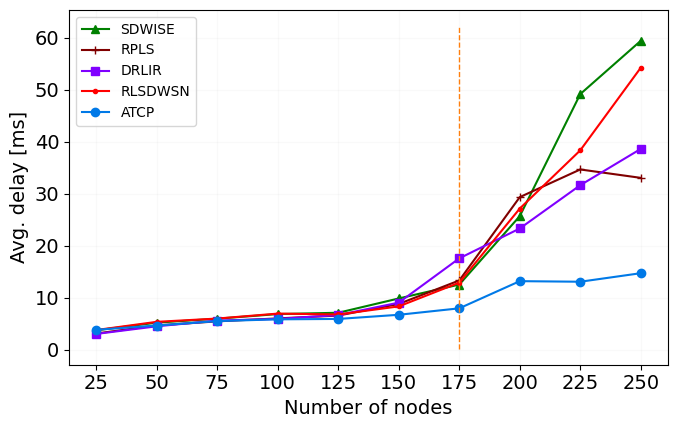

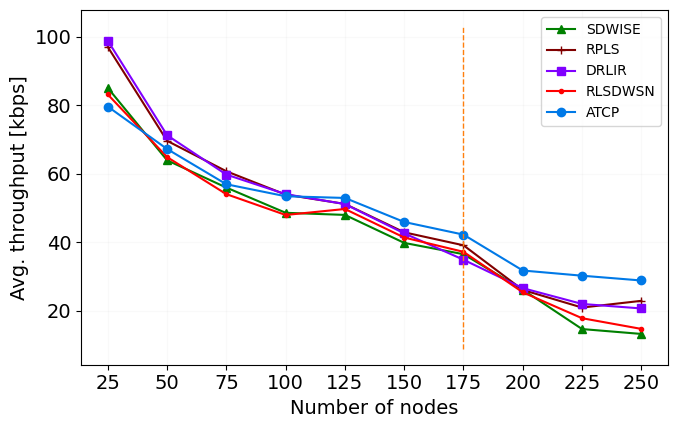

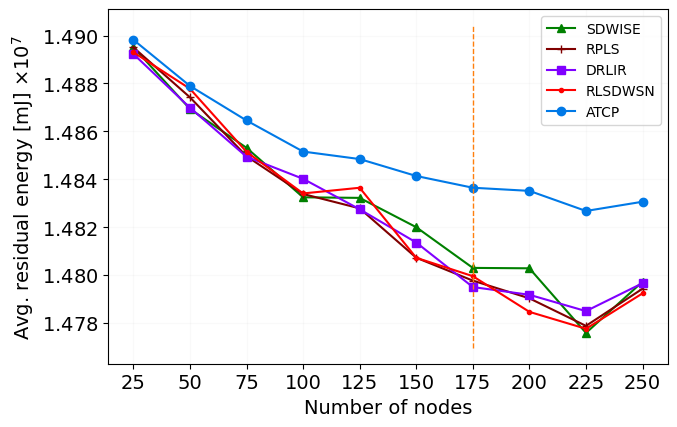

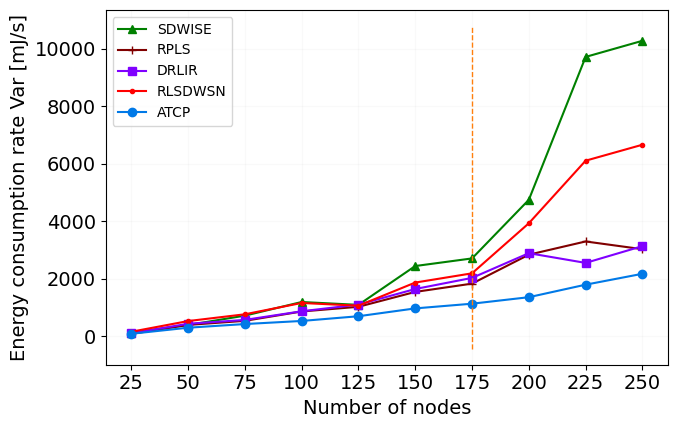

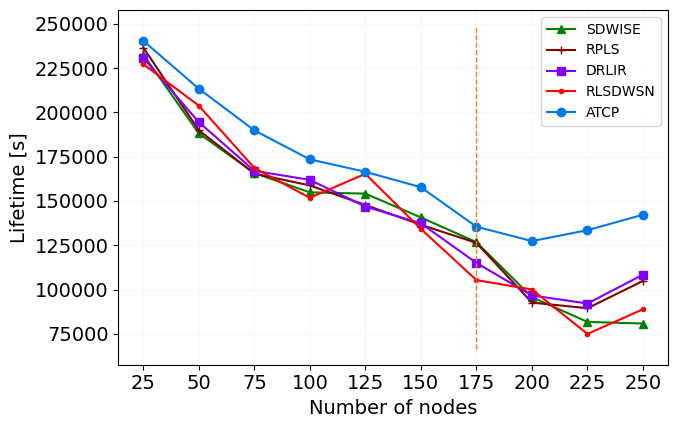

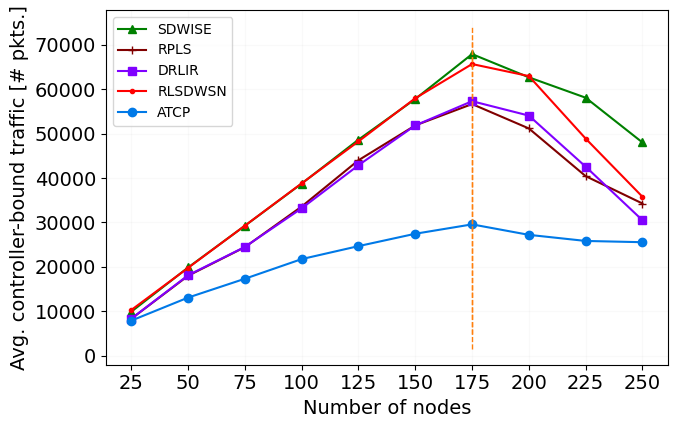

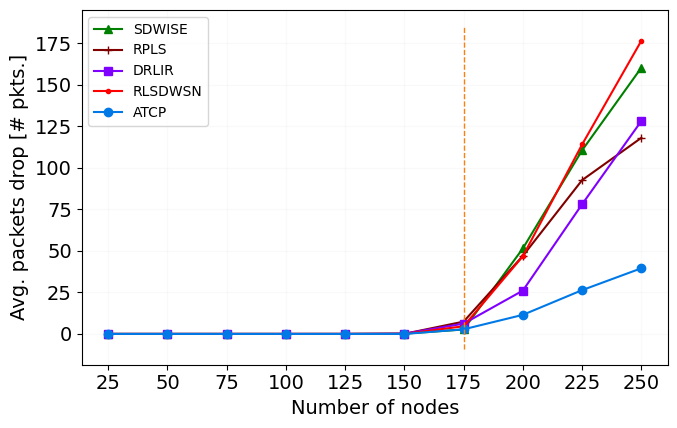

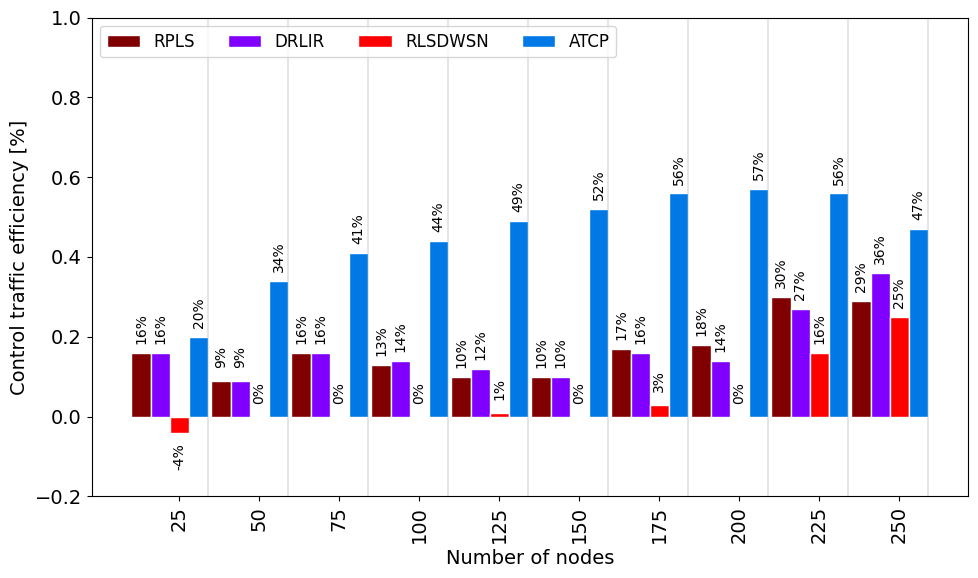

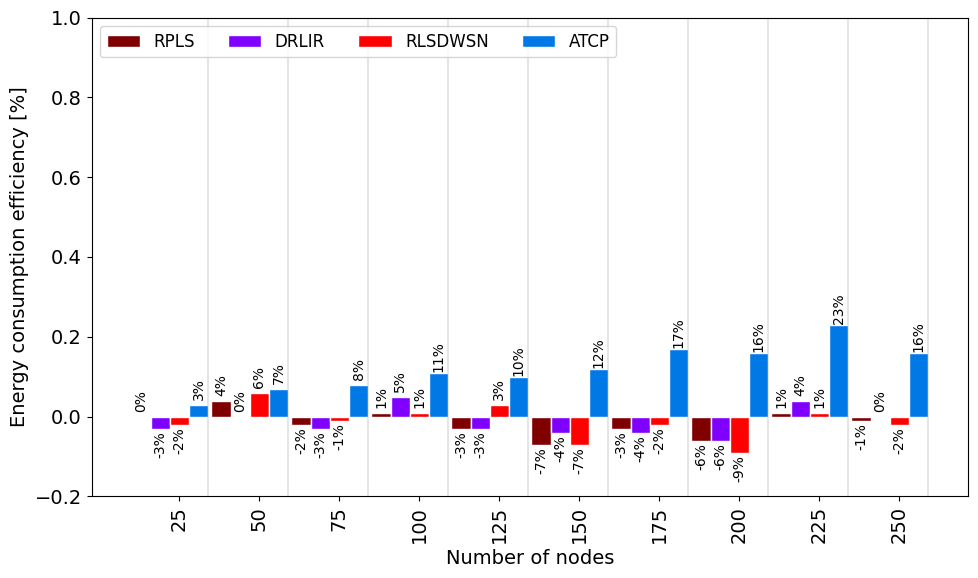

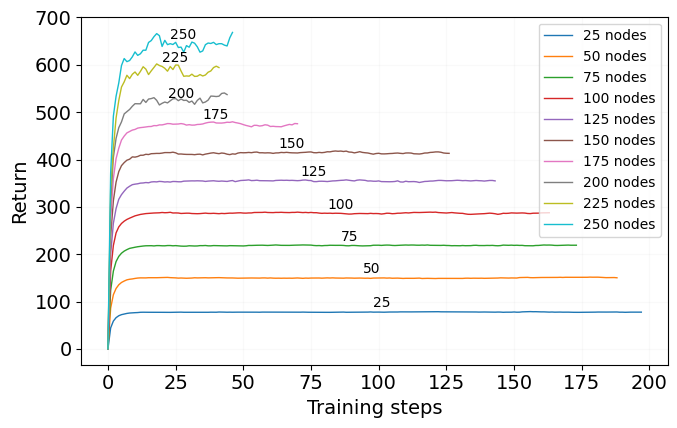

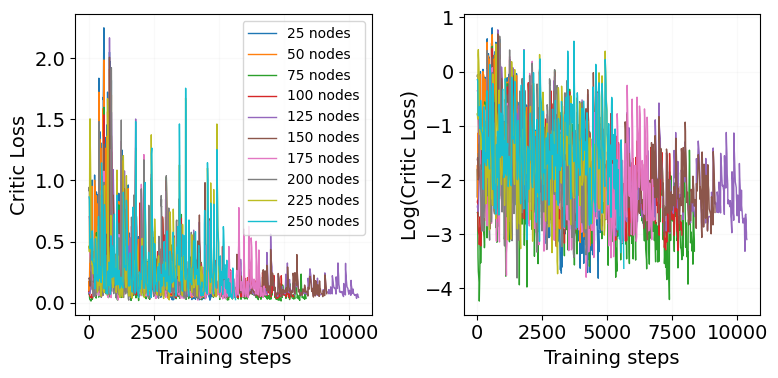

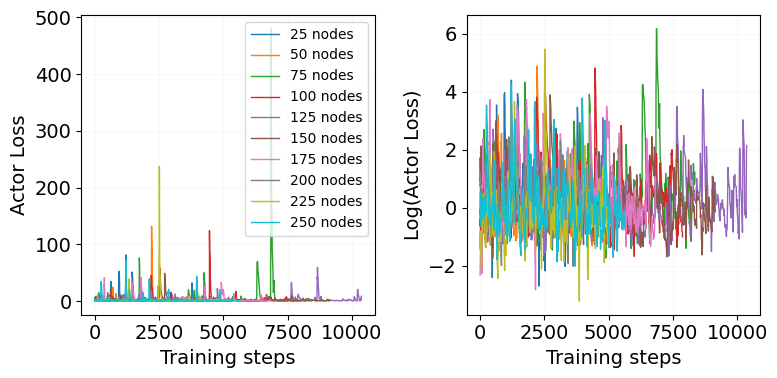

In [39]:
#######RESULTS (ATCP)##########
#--------------delay------------------
fig, ax = plt.subplots()
ax.plot(data['scenarios'], data['delay_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
ax.plot(data['scenarios'], data['delay_action_rpls'], label = "RPLS", marker="+", color = "#800000")
ax.plot(data['scenarios'], data['delay_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
ax.plot(data['scenarios'], data['delay_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['delay_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Avg. delay [ms]')
# axset_title("Avg. Delay")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("atcp_delay.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
ax.plot(data['scenarios'], data['throughput_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
ax.plot(data['scenarios'], data['throughput_action_rpls'], label = "RPLS", marker="+", color = "#800000")
ax.plot(data['scenarios'], data['throughput_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
ax.plot(data['scenarios'], data['throughput_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['throughput_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Avg. throughput [kbps]')
# ax.set_title("(b) Avg. Throughput")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("atcp_throughput.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
ax.plot(data['scenarios'], data['renergy_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
ax.plot(data['scenarios'], data['renergy_action_rpls'], label = "RPLS", marker="+", color = "#800000")
ax.plot(data['scenarios'], data['renergy_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
ax.plot(data['scenarios'], data['renergy_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['renergy_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))
ax.yaxis.set_major_formatter(formatter)
lo = Labeloffset(ax, label="Avg. residual energy [mJ]", axis="y")
# ax.set_ylabel('Avg. Residual Energy [mJ]')
# ax.set_title("(c) Avg. Residual Energy")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("atcp_renergy.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
ax.plot(data['scenarios'], data['engconsvar_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
ax.plot(data['scenarios'], data['engconsvar_action_rpls'], label = "RPLS", marker="+", color = "#800000")
ax.plot(data['scenarios'], data['engconsvar_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
ax.plot(data['scenarios'], data['engconsvar_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['engconsvar_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Energy consumption rate Var [mJ/s]')
# ax.set_title("(d) Energy consumption Per Second Variance")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("atcp_engcons_var.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
ax.plot(data['scenarios'], data['lifetime_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
ax.plot(data['scenarios'], data['lifetime_action_rpls'], label = "RPLS", marker="+", color = "#800000")
ax.plot(data['scenarios'], data['lifetime_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
ax.plot(data['scenarios'], data['lifetime_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['lifetime_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Lifetime [s]')
# ax.set_title("(d) Energy consumption Per Second Variance")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("atcp_lifetime.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
ax.plot(data['scenarios'], data['txpacketin_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
ax.plot(data['scenarios'], data['txpacketin_action_rpls'], label = "RPLS", marker="+", color = "#800000")
ax.plot(data['scenarios'], data['txpacketin_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
ax.plot(data['scenarios'], data['txpacketin_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['txpacketin_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Avg. controller-bound traffic [# pkts.]')
# ax.set_title("(e) Avg. Controller Overhead")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("atcp_txpacketin.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
ax.plot(data['scenarios'], data['drop_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
ax.plot(data['scenarios'], data['drop_action_rpls'], label = "RPLS", marker="+", color = "#800000")
ax.plot(data['scenarios'], data['drop_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
ax.plot(data['scenarios'], data['drop_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['drop_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Avg. packets drop [# pkts.]')
# ax.set_title("(f) Avg. Packets Drop")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("atcp_drop.eps", format="eps", dpi=600)

ct = pd.concat([round(data['txpacketin_action_atcp'], 2), round(data['txpacketin_action_rpls'], 2), round(data['txpacketin_action_drlir'], 2), round(data['txpacketin_action_rlsdwsn'], 2), round(data['txpacketin_action_sdwise'], 2), round(BATT_LEVEL - data['renergy_action_atcp'], 2), round(BATT_LEVEL - data['renergy_action_rpls'], 2), round(BATT_LEVEL - data['renergy_action_drlir'], 2), round(BATT_LEVEL - data['renergy_action_rlsdwsn'], 2), round(BATT_LEVEL - data['renergy_action_sdwise'], 2)],
                axis=1, ignore_index=True).T
ct.columns = scenarios
ct.index = ['avg_ct_overhead_atcp', 'avg_ct_overhead_rpls', 'avg_ct_overhead_drlir', 'avg_ct_overhead_rlsdwsn', 'avg_ct_overhead_none', 'avg_engcons_atcp', 'avg_engcons_rpls', 'avg_engcons_drlir', 'avg_engcons_rlsdwsn', 'avg_engcons_none']
print(ct)
fig, ax = plt.subplots(figsize=(10, 6))
fig.tight_layout()
# Avg. = ct.mean(axis=1)
# ptx_overhead_enhancement = (Ptx_n - Ptx_n prime / Ptx_n prime)
dd1_1 = np.array([[round((ct.loc['avg_ct_overhead_none']['25'] - ct.loc['avg_ct_overhead_rpls']['25']) / ct.loc['avg_ct_overhead_none']['25'], 2),
                round((ct.loc['avg_ct_overhead_none']['50'] - ct.loc['avg_ct_overhead_rpls']['50']) / ct.loc['avg_ct_overhead_none']['50'], 2),
                round((ct.loc['avg_ct_overhead_none']['75'] - ct.loc['avg_ct_overhead_rpls']['75']) / ct.loc['avg_ct_overhead_none']['75'], 2),
                round((ct.loc['avg_ct_overhead_none']['100'] - ct.loc['avg_ct_overhead_rpls']['100']) / ct.loc['avg_ct_overhead_none']['100'], 2),
                round((ct.loc['avg_ct_overhead_none']['125'] - ct.loc['avg_ct_overhead_rpls']['125']) / ct.loc['avg_ct_overhead_none']['125'], 2),
                round((ct.loc['avg_ct_overhead_none']['150'] - ct.loc['avg_ct_overhead_rpls']['150']) / ct.loc['avg_ct_overhead_none']['150'], 2),
                round((ct.loc['avg_ct_overhead_none']['175'] - ct.loc['avg_ct_overhead_rpls']['175']) / ct.loc['avg_ct_overhead_none']['175'], 2),
                round((ct.loc['avg_ct_overhead_none']['200'] - ct.loc['avg_ct_overhead_rpls']['200']) / ct.loc['avg_ct_overhead_none']['200'], 2),
                round((ct.loc['avg_ct_overhead_none']['225'] - ct.loc['avg_ct_overhead_rpls']['225']) / ct.loc['avg_ct_overhead_none']['225'], 2),
                round((ct.loc['avg_ct_overhead_none']['250'] - ct.loc['avg_ct_overhead_rpls']['250']) / ct.loc['avg_ct_overhead_none']['250'], 2)]
               ], dtype=float)
control_overhead_1 = pd.DataFrame(dd1_1, columns=scenarios, index=['avg_ct_overhead_rpls_enhance'])
control_overhead_1 = control_overhead_1.T

dd1_2 = np.array([[round((ct.loc['avg_ct_overhead_none']['25'] - ct.loc['avg_ct_overhead_drlir']['25']) / ct.loc['avg_ct_overhead_none']['25'], 2),
                round((ct.loc['avg_ct_overhead_none']['50'] - ct.loc['avg_ct_overhead_drlir']['50']) / ct.loc['avg_ct_overhead_none']['50'], 2),
                round((ct.loc['avg_ct_overhead_none']['75'] - ct.loc['avg_ct_overhead_drlir']['75']) / ct.loc['avg_ct_overhead_none']['75'], 2),
                round((ct.loc['avg_ct_overhead_none']['100'] - ct.loc['avg_ct_overhead_drlir']['100']) / ct.loc['avg_ct_overhead_none']['100'], 2),
                round((ct.loc['avg_ct_overhead_none']['125'] - ct.loc['avg_ct_overhead_drlir']['125']) / ct.loc['avg_ct_overhead_none']['125'], 2),
                round((ct.loc['avg_ct_overhead_none']['150'] - ct.loc['avg_ct_overhead_drlir']['150']) / ct.loc['avg_ct_overhead_none']['150'], 2),
                round((ct.loc['avg_ct_overhead_none']['175'] - ct.loc['avg_ct_overhead_drlir']['175']) / ct.loc['avg_ct_overhead_none']['175'], 2),
                round((ct.loc['avg_ct_overhead_none']['200'] - ct.loc['avg_ct_overhead_drlir']['200']) / ct.loc['avg_ct_overhead_none']['200'], 2),
                round((ct.loc['avg_ct_overhead_none']['225'] - ct.loc['avg_ct_overhead_drlir']['225']) / ct.loc['avg_ct_overhead_none']['225'], 2),
                round((ct.loc['avg_ct_overhead_none']['250'] - ct.loc['avg_ct_overhead_drlir']['250']) / ct.loc['avg_ct_overhead_none']['250'], 2)]
               ], dtype=float)
control_overhead_2 = pd.DataFrame(dd1_2, columns=scenarios, index=['avg_ct_overhead_drlir_enhance'])
control_overhead_2 = control_overhead_2.T

dd1_3 = np.array([[round((ct.loc['avg_ct_overhead_none']['25'] - ct.loc['avg_ct_overhead_rlsdwsn']['25']) / ct.loc['avg_ct_overhead_none']['25'], 2),
                round((ct.loc['avg_ct_overhead_none']['50'] - ct.loc['avg_ct_overhead_rlsdwsn']['50']) / ct.loc['avg_ct_overhead_none']['50'], 2),
                round((ct.loc['avg_ct_overhead_none']['75'] - ct.loc['avg_ct_overhead_rlsdwsn']['75']) / ct.loc['avg_ct_overhead_none']['75'], 2),
                round((ct.loc['avg_ct_overhead_none']['100'] - ct.loc['avg_ct_overhead_rlsdwsn']['100']) / ct.loc['avg_ct_overhead_none']['100'], 2),
                round((ct.loc['avg_ct_overhead_none']['125'] - ct.loc['avg_ct_overhead_rlsdwsn']['125']) / ct.loc['avg_ct_overhead_none']['125'], 2),
                round((ct.loc['avg_ct_overhead_none']['150'] - ct.loc['avg_ct_overhead_rlsdwsn']['150']) / ct.loc['avg_ct_overhead_none']['150'], 2),
                round((ct.loc['avg_ct_overhead_none']['175'] - ct.loc['avg_ct_overhead_rlsdwsn']['175']) / ct.loc['avg_ct_overhead_none']['175'], 2),
                round((ct.loc['avg_ct_overhead_none']['200'] - ct.loc['avg_ct_overhead_rlsdwsn']['200']) / ct.loc['avg_ct_overhead_none']['200'], 2),
                round((ct.loc['avg_ct_overhead_none']['225'] - ct.loc['avg_ct_overhead_rlsdwsn']['225']) / ct.loc['avg_ct_overhead_none']['225'], 2),
                round((ct.loc['avg_ct_overhead_none']['250'] - ct.loc['avg_ct_overhead_rlsdwsn']['250']) / ct.loc['avg_ct_overhead_none']['250'], 2)]
               ], dtype=float)
control_overhead_3 = pd.DataFrame(dd1_3, columns=scenarios, index=['avg_ct_overhead_rlsdwsn_enhance'])
control_overhead_3 = control_overhead_3.T

dd1_4 = np.array([[round((ct.loc['avg_ct_overhead_none']['25'] - ct.loc['avg_ct_overhead_atcp']['25']) / ct.loc['avg_ct_overhead_none']['25'], 2),
                round((ct.loc['avg_ct_overhead_none']['50'] - ct.loc['avg_ct_overhead_atcp']['50']) / ct.loc['avg_ct_overhead_none']['50'], 2),
                round((ct.loc['avg_ct_overhead_none']['75'] - ct.loc['avg_ct_overhead_atcp']['75']) / ct.loc['avg_ct_overhead_none']['75'], 2),
                round((ct.loc['avg_ct_overhead_none']['100'] - ct.loc['avg_ct_overhead_atcp']['100']) / ct.loc['avg_ct_overhead_none']['100'], 2),
                round((ct.loc['avg_ct_overhead_none']['125'] - ct.loc['avg_ct_overhead_atcp']['125']) / ct.loc['avg_ct_overhead_none']['125'], 2),
                round((ct.loc['avg_ct_overhead_none']['150'] - ct.loc['avg_ct_overhead_atcp']['150']) / ct.loc['avg_ct_overhead_none']['150'], 2),
                round((ct.loc['avg_ct_overhead_none']['175'] - ct.loc['avg_ct_overhead_atcp']['175']) / ct.loc['avg_ct_overhead_none']['175'], 2),
                round((ct.loc['avg_ct_overhead_none']['200'] - ct.loc['avg_ct_overhead_atcp']['200']) / ct.loc['avg_ct_overhead_none']['200'], 2),
                round((ct.loc['avg_ct_overhead_none']['225'] - ct.loc['avg_ct_overhead_atcp']['225']) / ct.loc['avg_ct_overhead_none']['225'], 2),
                round((ct.loc['avg_ct_overhead_none']['250'] - ct.loc['avg_ct_overhead_atcp']['250']) / ct.loc['avg_ct_overhead_none']['250'], 2)]
               ], dtype=float)
control_overhead_4 = pd.DataFrame(dd1_4, columns=scenarios, index=['avg_ct_overhead_atcp_enhance'])
control_overhead_4 = control_overhead_4.T

# Add bars
width = 6
offset = 0  # Adjust the offset value as needed
xticks_values = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
x_new = [value + offset * i for i, value in enumerate(xticks_values)]
ax.bar(np.array(x_new) - 2*width, control_overhead_1["avg_ct_overhead_rpls_enhance"], width=width, color = '#800000', edgecolor='white', label="RPLS")
ax.bar(np.array(x_new) - width, control_overhead_2["avg_ct_overhead_drlir_enhance"], width=width, color = '#8000ff', edgecolor='white', label="DRLIR")
ax.bar(np.array(x_new) , control_overhead_3["avg_ct_overhead_rlsdwsn_enhance"], width=width, color = '#ff0000', edgecolor='white', label="RLSDWSN")
ax.bar(np.array(x_new) + width, control_overhead_4["avg_ct_overhead_atcp_enhance"], width=width, color = '#0079E7', edgecolor='white', label="ATCP")

# Add percentages as labels
i = 0
for idx in control_overhead_1.index:
    start = 0
    y = control_overhead_1.loc[idx, :]
    value = control_overhead_1.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i - 2*width,
        y=(start + y+0.06) if y.item() >= 0 else (start + y-0.06),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in control_overhead_2.index:
    start = 0
    y = control_overhead_2.loc[idx, :]
    value = control_overhead_2.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i - width,
        y=(start + y+0.06) if y.item() >= 0 else (start + y-0.06),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in control_overhead_3.index:
    start = 0
    y = control_overhead_3.loc[idx, :]
    value = control_overhead_3.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i,
        y=(start + y+0.06) if y.item() >= 0 else (start + y-0.06),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in control_overhead_4.index:
    start = 0
    y = control_overhead_4.loc[idx, :]
    value = control_overhead_4.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i + width,
        y=(start + y+0.06) if y.item() >= 0 else (start + y-0.06),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0

control_overhead = pd.concat([ct.loc['avg_ct_overhead_none'], ct.loc['avg_ct_overhead_rpls'], ct.loc['avg_ct_overhead_drlir'], ct.loc['avg_ct_overhead_rlsdwsn'], ct.loc['avg_ct_overhead_atcp'], control_overhead_1.iloc[:, 0], control_overhead_2.iloc[:, 0], control_overhead_3.iloc[:, 0], control_overhead_4.iloc[:, 0]], axis=1)
# Calculate mean and round the values
mean_row = control_overhead.mean().round(2)
# Append the mean row to the DataFrame
control_overhead.loc['mean'] = mean_row
control_overhead = control_overhead.T
# Set the columns and index of the DataFrame
control_overhead.index = ['SDWISE', 'RPLS', 'DRLIR', 'RLSDWSN', 'ATCP', 'RPLS-enhance', 'DRLIR-enhance', 'RLSDWSN-enhance', 'ATCP-enhance']
control_overhead.columns = ['Ptx_25', 'Ptx_50', 'Ptx_75', 'Ptx_100', 'Ptx_125', 'Ptx_150', 'Ptx_175', 'Ptx_200', 'Ptx_225', 'Ptx_250', 'mean']
print(control_overhead)

ax.tick_params(axis='x', labelrotation = 90)
plt.setp(ax, xticks=x_new, xticklabels=scenarios)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Control traffic efficiency [%]')
# ax.set_title("Avg. Control Traffic as Percentage of Enhancements for Different Node Scenarios")
ax.legend(fontsize="12", loc ="upper left", ncol=6)
ax.set_ylim(ymin=-0.2, ymax=1)
# ax.margins(None, 0.2)
# ax.grid(alpha=0.07)
i = 0
for idx in scenarios:
    ax.vlines(int(idx) + offset * i + width + width/2, -0.2, 1.4, linestyles='solid', colors='gray', alpha=0.2)
    i += 1
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("atcp_txpacketin_comparison.eps", format="eps", dpi=600)

fig, ax = plt.subplots(figsize=(10, 6))
fig.tight_layout()
# EC_n = E_0 - E_n
# EC_enhancement = (EC_n prime - EC_n / EC_n prime)
dd2_1 = np.array([[round((ct.loc['avg_engcons_none']['25'] - ct.loc['avg_engcons_rpls']['25']) / ct.loc['avg_engcons_none']['25'], 2),
                round((ct.loc['avg_engcons_none']['50'] - ct.loc['avg_engcons_rpls']['50']) / ct.loc['avg_engcons_none']['50'], 2),
                round((ct.loc['avg_engcons_none']['75'] - ct.loc['avg_engcons_rpls']['75']) / ct.loc['avg_engcons_none']['75'], 2),
                round((ct.loc['avg_engcons_none']['100'] - ct.loc['avg_engcons_rpls']['100']) / ct.loc['avg_engcons_none']['100'], 2),
                round((ct.loc['avg_engcons_none']['125'] - ct.loc['avg_engcons_rpls']['125']) / ct.loc['avg_engcons_none']['125'], 2),
                round((ct.loc['avg_engcons_none']['150'] - ct.loc['avg_engcons_rpls']['150']) / ct.loc['avg_engcons_none']['150'], 2),
                round((ct.loc['avg_engcons_none']['175'] - ct.loc['avg_engcons_rpls']['175']) / ct.loc['avg_engcons_none']['175'], 2),
                round((ct.loc['avg_engcons_none']['200'] - ct.loc['avg_engcons_rpls']['200']) / ct.loc['avg_engcons_none']['200'], 2),
                round((ct.loc['avg_engcons_none']['225'] - ct.loc['avg_engcons_rpls']['225']) / ct.loc['avg_engcons_none']['225'], 2),
                round((ct.loc['avg_engcons_none']['250'] - ct.loc['avg_engcons_rpls']['250']) / ct.loc['avg_engcons_none']['250'], 2)]
               ], dtype=float)
energy_consumption_1 = pd.DataFrame(dd2_1, columns=scenarios, index=['avg_engcons_rpls_enhance'])
energy_consumption_1 = energy_consumption_1.T

dd2_2 = np.array([[round((ct.loc['avg_engcons_none']['25'] - ct.loc['avg_engcons_drlir']['25']) / ct.loc['avg_engcons_none']['25'], 2),
                round((ct.loc['avg_engcons_none']['50'] - ct.loc['avg_engcons_drlir']['50']) / ct.loc['avg_engcons_none']['50'], 2),
                round((ct.loc['avg_engcons_none']['75'] - ct.loc['avg_engcons_drlir']['75']) / ct.loc['avg_engcons_none']['75'], 2),
                round((ct.loc['avg_engcons_none']['100'] - ct.loc['avg_engcons_drlir']['100']) / ct.loc['avg_engcons_none']['100'], 2),
                round((ct.loc['avg_engcons_none']['125'] - ct.loc['avg_engcons_drlir']['125']) / ct.loc['avg_engcons_none']['125'], 2),
                round((ct.loc['avg_engcons_none']['150'] - ct.loc['avg_engcons_drlir']['150']) / ct.loc['avg_engcons_none']['150'], 2),
                round((ct.loc['avg_engcons_none']['175'] - ct.loc['avg_engcons_drlir']['175']) / ct.loc['avg_engcons_none']['175'], 2),
                round((ct.loc['avg_engcons_none']['200'] - ct.loc['avg_engcons_drlir']['200']) / ct.loc['avg_engcons_none']['200'], 2),
                round((ct.loc['avg_engcons_none']['225'] - ct.loc['avg_engcons_drlir']['225']) / ct.loc['avg_engcons_none']['225'], 2),
                round((ct.loc['avg_engcons_none']['250'] - ct.loc['avg_engcons_drlir']['250']) / ct.loc['avg_engcons_none']['250'], 2)]
               ], dtype=float)
energy_consumption_2 = pd.DataFrame(dd2_2, columns=scenarios, index=['avg_engcons_drlir_enhance'])
energy_consumption_2 = energy_consumption_2.T

dd2_3 = np.array([[round((ct.loc['avg_engcons_none']['25'] - ct.loc['avg_engcons_rlsdwsn']['25']) / ct.loc['avg_engcons_none']['25'], 2),
                round((ct.loc['avg_engcons_none']['50'] - ct.loc['avg_engcons_rlsdwsn']['50']) / ct.loc['avg_engcons_none']['50'], 2),
                round((ct.loc['avg_engcons_none']['75'] - ct.loc['avg_engcons_rlsdwsn']['75']) / ct.loc['avg_engcons_none']['75'], 2),
                round((ct.loc['avg_engcons_none']['100'] - ct.loc['avg_engcons_rlsdwsn']['100']) / ct.loc['avg_engcons_none']['100'], 2),
                round((ct.loc['avg_engcons_none']['125'] - ct.loc['avg_engcons_rlsdwsn']['125']) / ct.loc['avg_engcons_none']['125'], 2),
                round((ct.loc['avg_engcons_none']['150'] - ct.loc['avg_engcons_rlsdwsn']['150']) / ct.loc['avg_engcons_none']['150'], 2),
                round((ct.loc['avg_engcons_none']['175'] - ct.loc['avg_engcons_rlsdwsn']['175']) / ct.loc['avg_engcons_none']['175'], 2),
                round((ct.loc['avg_engcons_none']['200'] - ct.loc['avg_engcons_rlsdwsn']['200']) / ct.loc['avg_engcons_none']['200'], 2),
                round((ct.loc['avg_engcons_none']['225'] - ct.loc['avg_engcons_rlsdwsn']['225']) / ct.loc['avg_engcons_none']['225'], 2),
                round((ct.loc['avg_engcons_none']['250'] - ct.loc['avg_engcons_rlsdwsn']['250']) / ct.loc['avg_engcons_none']['250'], 2)]
               ], dtype=float)
energy_consumption_3 = pd.DataFrame(dd2_3, columns=scenarios, index=['avg_engcons_rlsdwsn_enhance'])
energy_consumption_3 = energy_consumption_3.T

dd2_4 = np.array([[round((ct.loc['avg_engcons_none']['25'] - ct.loc['avg_engcons_atcp']['25']) / ct.loc['avg_engcons_none']['25'], 2),
                round((ct.loc['avg_engcons_none']['50'] - ct.loc['avg_engcons_atcp']['50']) / ct.loc['avg_engcons_none']['50'], 2),
                round((ct.loc['avg_engcons_none']['75'] - ct.loc['avg_engcons_atcp']['75']) / ct.loc['avg_engcons_none']['75'], 2),
                round((ct.loc['avg_engcons_none']['100'] - ct.loc['avg_engcons_atcp']['100']) / ct.loc['avg_engcons_none']['100'], 2),
                round((ct.loc['avg_engcons_none']['125'] - ct.loc['avg_engcons_atcp']['125']) / ct.loc['avg_engcons_none']['125'], 2),
                round((ct.loc['avg_engcons_none']['150'] - ct.loc['avg_engcons_atcp']['150']) / ct.loc['avg_engcons_none']['150'], 2),
                round((ct.loc['avg_engcons_none']['175'] - ct.loc['avg_engcons_atcp']['175']) / ct.loc['avg_engcons_none']['175'], 2),
                round((ct.loc['avg_engcons_none']['200'] - ct.loc['avg_engcons_atcp']['200']) / ct.loc['avg_engcons_none']['200'], 2),
                round((ct.loc['avg_engcons_none']['225'] - ct.loc['avg_engcons_atcp']['225']) / ct.loc['avg_engcons_none']['225'], 2),
                round((ct.loc['avg_engcons_none']['250'] - ct.loc['avg_engcons_atcp']['250']) / ct.loc['avg_engcons_none']['250'], 2)]
               ], dtype=float)
energy_consumption_4 = pd.DataFrame(dd2_4, columns=scenarios, index=['avg_engcons_atcp_enhance'])
energy_consumption_4 = energy_consumption_4.T

# Add bars
width = 6
offset = 0  # Adjust the offset value as needed
xticks_values = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
x_new = [value + offset * i for i, value in enumerate(xticks_values)]
ax.bar(np.array(x_new) - 2*width, energy_consumption_1["avg_engcons_rpls_enhance"], width=width, color = '#800000', edgecolor='white', label="RPLS")
ax.bar(np.array(x_new) - width, energy_consumption_2["avg_engcons_drlir_enhance"], width=width, color = '#8000ff', edgecolor='white', label="DRLIR")
ax.bar(np.array(x_new) , energy_consumption_3["avg_engcons_rlsdwsn_enhance"], width=width, color = '#ff0000', edgecolor='white', label="RLSDWSN")
ax.bar(np.array(x_new) + width, energy_consumption_4["avg_engcons_atcp_enhance"], width=width, color = '#0079E7', edgecolor='white', label="ATCP")

# Add percentages as labels
i = 0
for idx in energy_consumption_1.index:
    start = 0
    y = energy_consumption_1.loc[idx, :]
    value = energy_consumption_1.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i - 2*width,
        y=(start + y+0.04) if y.item() >= 0 else (start + y-0.04),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in energy_consumption_2.index:
    start = 0
    y = energy_consumption_2.loc[idx, :]
    value = energy_consumption_2.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i - width,
        y=(start + y+0.04) if y.item() >= 0 else (start + y-0.04),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in energy_consumption_3.index:
    start = 0
    y = energy_consumption_3.loc[idx, :]
    value = energy_consumption_3.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i,
        y=(start + y+0.04) if y.item() >= 0 else (start + y-0.04),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in energy_consumption_4.index:
    start = 0
    y = energy_consumption_4.loc[idx, :]
    value = energy_consumption_4.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i + width,
        y=(start + y+0.04) if y.item() >= 0 else (start + y-0.04),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0

energy_consumption = pd.concat([ct.loc['avg_engcons_none'], ct.loc['avg_engcons_rpls'], ct.loc['avg_engcons_drlir'], ct.loc['avg_engcons_rlsdwsn'], ct.loc['avg_engcons_atcp'], energy_consumption_1.iloc[:, 0], energy_consumption_2.iloc[:, 0], energy_consumption_3.iloc[:, 0], energy_consumption_4.iloc[:, 0]], axis=1)
# Calculate mean and round the values
mean_row = energy_consumption.mean().round(2)
# Append the mean row to the DataFrame
energy_consumption.loc['mean'] = mean_row
energy_consumption = energy_consumption.T
# Set the columns and index of the DataFrame
energy_consumption.index = ['SDWISE', 'RPLS', 'DRLIR', 'RLSDWSN', 'ATCP', 'RPLS-enhance', 'DRLIR-enhance', 'RLSDWSN-enhance', 'ATCP-enhance']
energy_consumption.columns = ['E_25', 'E_50', 'E_75', 'E_100', 'E_125', 'E_150', 'E_175', 'E_200', 'E_225', 'E_250', 'mean']
print(energy_consumption)

ax.tick_params(axis='x', labelrotation = 90)
plt.setp(ax, xticks=x_new, xticklabels=scenarios)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Energy consumption efficiency [%]')
# ax.set_title("Avg. Energy Consumption as Percentage of Enhancements for Different Node Scenarios")
ax.legend(fontsize="12", loc ="upper left", ncol=6)
ax.set_ylim(ymin=-0.2, ymax=1)
# ax.margins(None, 0.2)
# ax.grid(alpha=0.07)
i = 0
for idx in scenarios:
    ax.vlines(int(idx) + offset * i + width + width/2, -0.2, 1.4, linestyles='solid', colors='gray', alpha=0.2)
    i += 1
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("atcp_renergy_comparison.eps", format="eps", dpi=600)

#######RESULTS (2)##########

#--------------return------------------
fig, ax = plt.subplots()
return_data_list = [
    atcp_action_25_return,
    atcp_action_50_return,
    atcp_action_75_return,
    atcp_action_100_return,
    atcp_action_125_return,
    atcp_action_150_return,
    atcp_action_175_return,
    atcp_action_200_return,
    atcp_action_225_return,
    atcp_action_250_return
]
# Plot smoothed return curves for each scenario
for scenario, return_data in zip(scenarios, return_data_list):
    # Smooth the return values using exponential moving Avg.
    smoothed_return = return_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax.plot(return_data["Step"], smoothed_return, label=f"{scenario} nodes", linewidth=1)
    ax.annotate(f"{scenario}", (return_data["Step"].iloc[int(return_data["Step"].max()/2)], smoothed_return.iloc[int(return_data["Step"].max()/2)]+10), fontsize=10)

# Set logarithmic scale for y-axis
# ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Training steps')
ax.set_ylabel('Return')
ax.grid(alpha=0.07)
ax.legend(fontsize='10')

plt.tight_layout()
plt.savefig("atcp_return.eps", format="eps", dpi=600)
plt.show()

#--------------critic loss------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
loss_data_list = [
    atcp_action_25_valueloss,
    atcp_action_50_valueloss,
    atcp_action_75_valueloss,
    atcp_action_100_valueloss,
    atcp_action_125_valueloss,
    atcp_action_150_valueloss,
    atcp_action_175_valueloss,
    atcp_action_200_valueloss,
    atcp_action_225_valueloss,
    atcp_action_250_valueloss
]
# Original Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax1.plot(loss_data["Step"], smoothed_valueloss, label=f"{scenario} nodes", linewidth=1)

ax1.set_xlabel('Training steps')
ax1.set_ylabel('Critic Loss')
ax1.grid(alpha=0.07)
ax1.legend(fontsize='10')

# Log Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax2.plot(loss_data["Step"], np.log(smoothed_valueloss), label=f"{scenario} nodes", linewidth=1)

ax2.set_xlabel('Training steps')
ax2.set_ylabel('Log(Critic Loss)')
ax2.grid(alpha=0.07)
# ax2.legend(fontsize='10')

plt.tight_layout()
plt.savefig("atcp_critic_loss.eps", format="eps", dpi=600)
plt.show()
#--------------actor loss------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
loss_data_list = [
    atcp_action_25_policyloss,
    atcp_action_50_policyloss,
    atcp_action_75_policyloss,
    atcp_action_100_policyloss,
    atcp_action_125_policyloss,
    atcp_action_150_policyloss,
    atcp_action_175_policyloss,
    atcp_action_200_policyloss,
    atcp_action_225_policyloss,
    atcp_action_250_policyloss
]
# Original Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax1.plot(loss_data["Step"], smoothed_valueloss, label=f"{scenario} nodes", linewidth=1)

ax1.set_xlabel('Training steps')
ax1.set_ylabel('Actor Loss')
ax1.grid(alpha=0.07)
ax1.legend(fontsize='10')

# Log Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax2.plot(loss_data["Step"], np.log(smoothed_valueloss), label=f"{scenario} nodes", linewidth=1)

ax2.set_xlabel('Training steps')
ax2.set_ylabel('Log(Actor Loss)')
ax2.grid(alpha=0.07)
# ax2.legend(fontsize='10')

plt.tight_layout()
plt.savefig("atcp_actor_loss.eps", format="eps", dpi=600)
plt.show()




                                25         50         75        100  \
avg_ct_overhead_atcp       7903.10   13093.68   17334.83   21759.61   
avg_ct_overhead_nsfp       2116.66    3465.15    4815.01    6173.72   
avg_ct_overhead_rpls       8331.71   18011.79   24451.34   33600.67   
avg_ct_overhead_drlir      8351.28   18121.60   24505.87   33199.21   
avg_ct_overhead_rlsdwsn   10300.85   19791.67   29287.20   38820.10   
avg_ct_overhead_none       9917.48   19865.56   29271.03   38768.18   
avg_engcons_atcp         101751.05  121037.90  135476.92  148468.45   
avg_engcons_nsfp          73904.48   86542.72   92671.95  105609.75   
avg_engcons_rpls         104919.00  125792.83  150417.04  166190.89   
avg_engcons_drlir        107673.49  130118.55  150623.86  159859.95   
avg_engcons_rlsdwsn      106963.05  122203.91  148580.71  165969.63   
avg_engcons_none         104893.71  130644.32  146901.25  167580.90   

                               125        150        175        200  \
avg_c

<ipython-input-40-7ef734777a30>:256: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-40-7ef734777a30>:270: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-40-7ef734777a30>:284: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-40-7ef734777a30>:298: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-40-7ef734777a30>:312: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the futur

                   Ptx_25    Ptx_50    Ptx_75   Ptx_100   Ptx_125   Ptx_150  \
SDWISE            9917.48  19865.56  29271.03  38768.18  48659.35  57816.27   
RPLS              8331.71  18011.79  24451.34  33600.67  44023.09  51866.47   
DRLIR             8351.28  18121.60  24505.87  33199.21  42898.65  51864.68   
RLSDWSN          10300.85  19791.67  29287.20  38820.10  48266.71  57986.06   
ATCP              7903.10  13093.68  17334.83  21759.61  24679.15  27466.33   
NSFP              2116.66   3465.15   4815.01   6173.72   7581.72   9098.58   
RPLS-enhance         0.16      0.09      0.16      0.13      0.10      0.10   
DRLIR-enhance        0.16      0.09      0.16      0.14      0.12      0.10   
RLSDWSN-enhance     -0.04      0.00     -0.00     -0.00      0.01     -0.00   
ATCP-enhance         0.20      0.34      0.41      0.44      0.49      0.52   
NSFP-enhance         0.79      0.83      0.84      0.84      0.84      0.84   

                  Ptx_175   Ptx_200   Ptx_225   Ptx

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
<ipython-input-40-7ef734777a30>:443: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-40-7ef734777a30>:457: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-40-7ef734777a30>:471: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-40-7ef734777a30>:485: FutureWarning: Calling int on a single element Series is deprecated a

                      E_25       E_50       E_75      E_100      E_125  \
SDWISE           104893.71  130644.32  146901.25  167580.90  167823.17   
RPLS             104919.00  125792.83  150417.04  166190.89  172207.06   
DRLIR            107673.49  130118.55  150623.86  159859.95  172587.41   
RLSDWSN          106963.05  122203.91  148580.71  165969.63  163594.18   
ATCP             101751.05  121037.90  135476.92  148468.45  151599.01   
NSFP              73904.48   86542.72   92671.95  105609.75  103648.34   
RPLS-enhance         -0.00       0.04      -0.02       0.01      -0.03   
DRLIR-enhance        -0.03       0.00      -0.03       0.05      -0.03   
RLSDWSN-enhance      -0.02       0.06      -0.01       0.01       0.03   
ATCP-enhance          0.03       0.07       0.08       0.11       0.10   
NSFP-enhance          0.30       0.34       0.37       0.37       0.38   

                     E_150      E_175      E_200      E_225      E_250  \
SDWISE           180071.50  197085.12

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


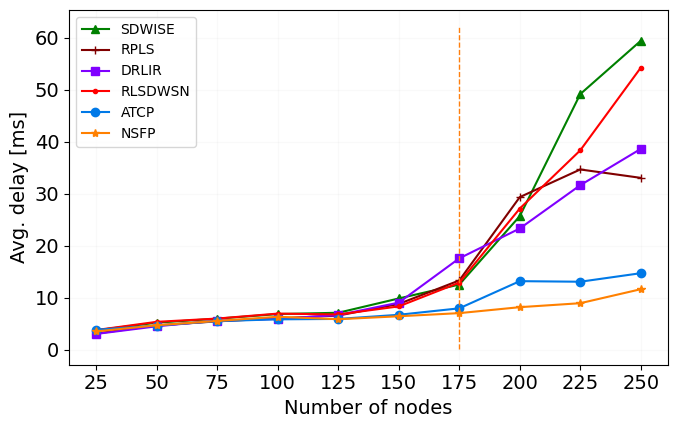

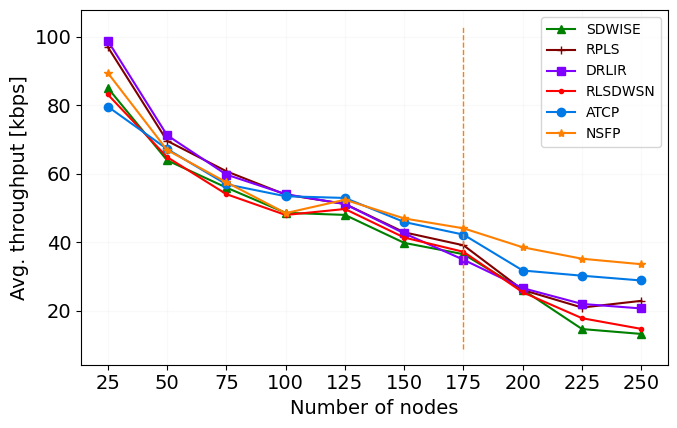

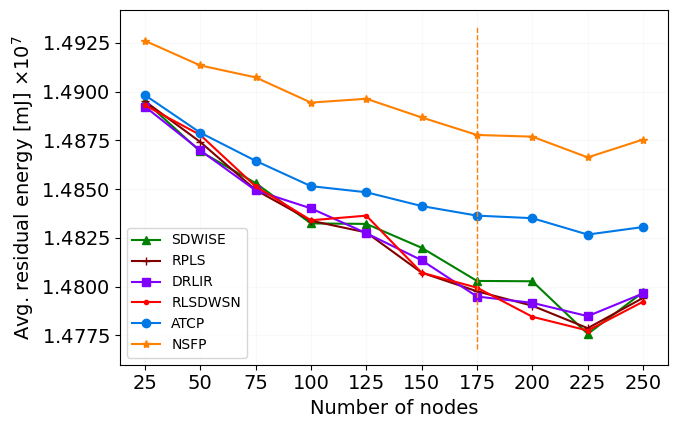

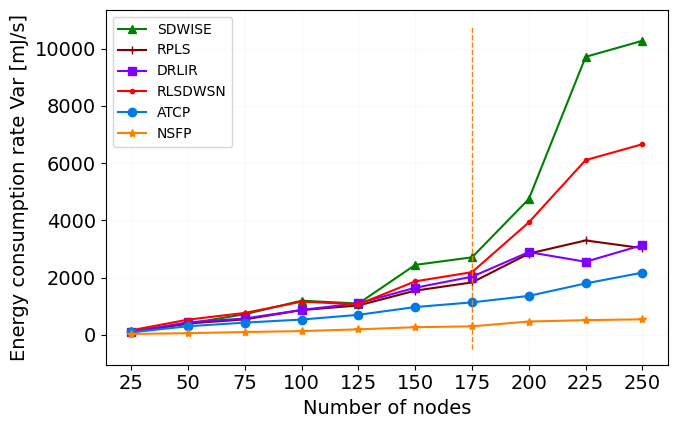

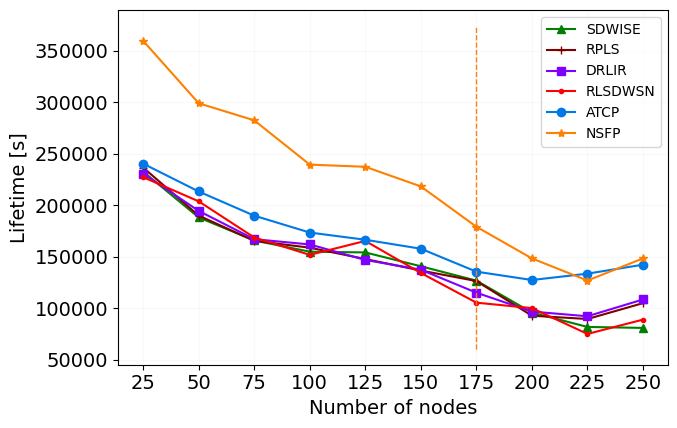

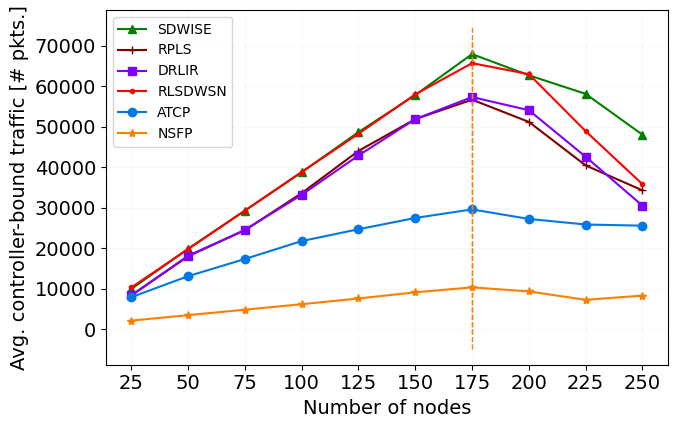

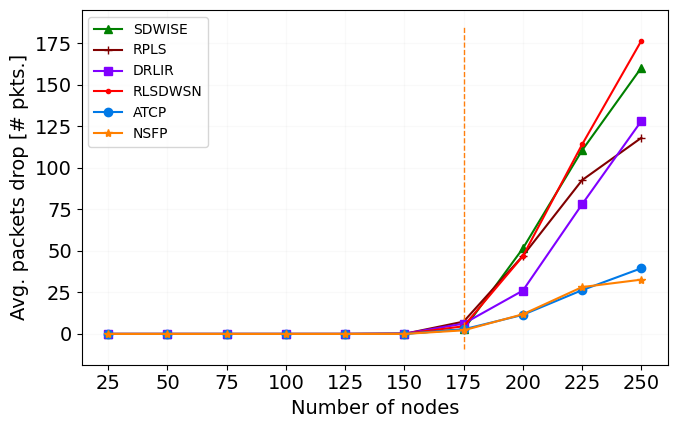

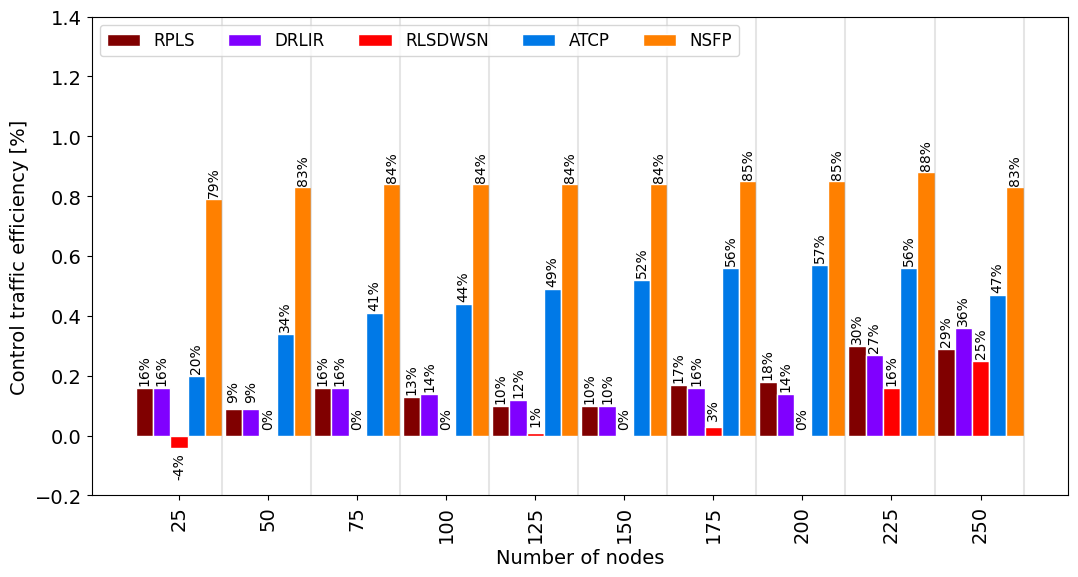

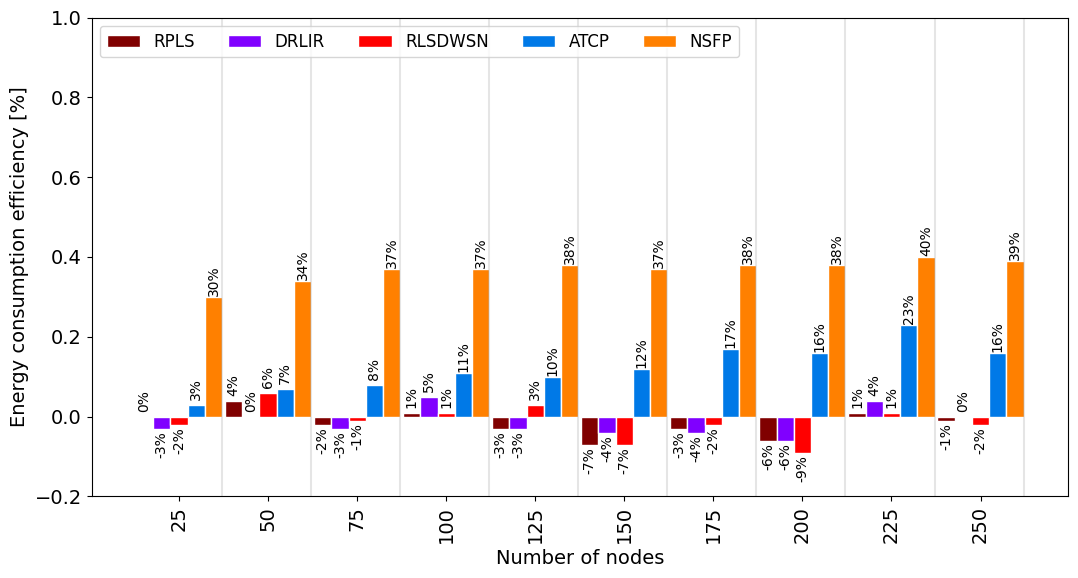

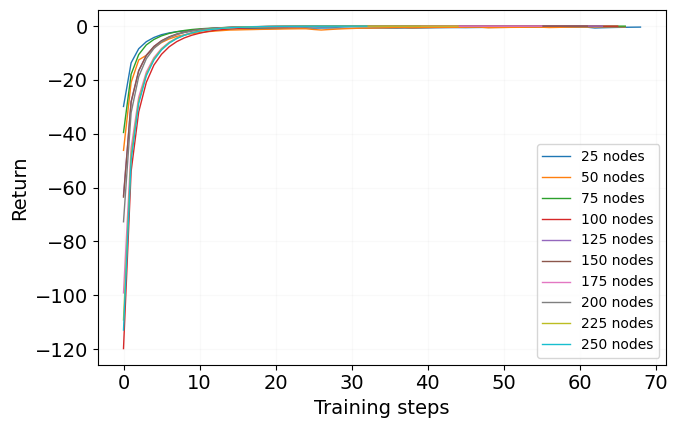

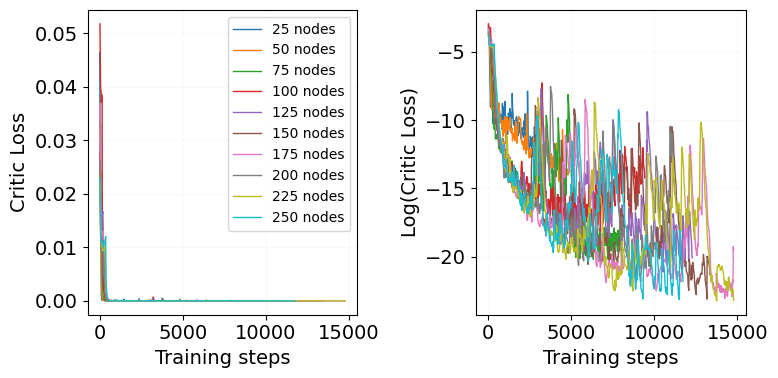

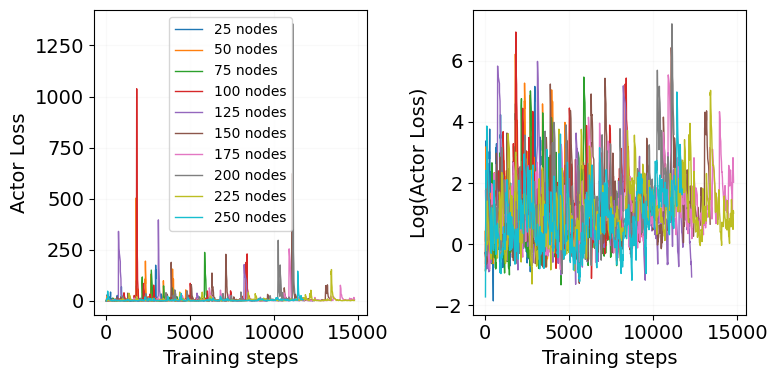

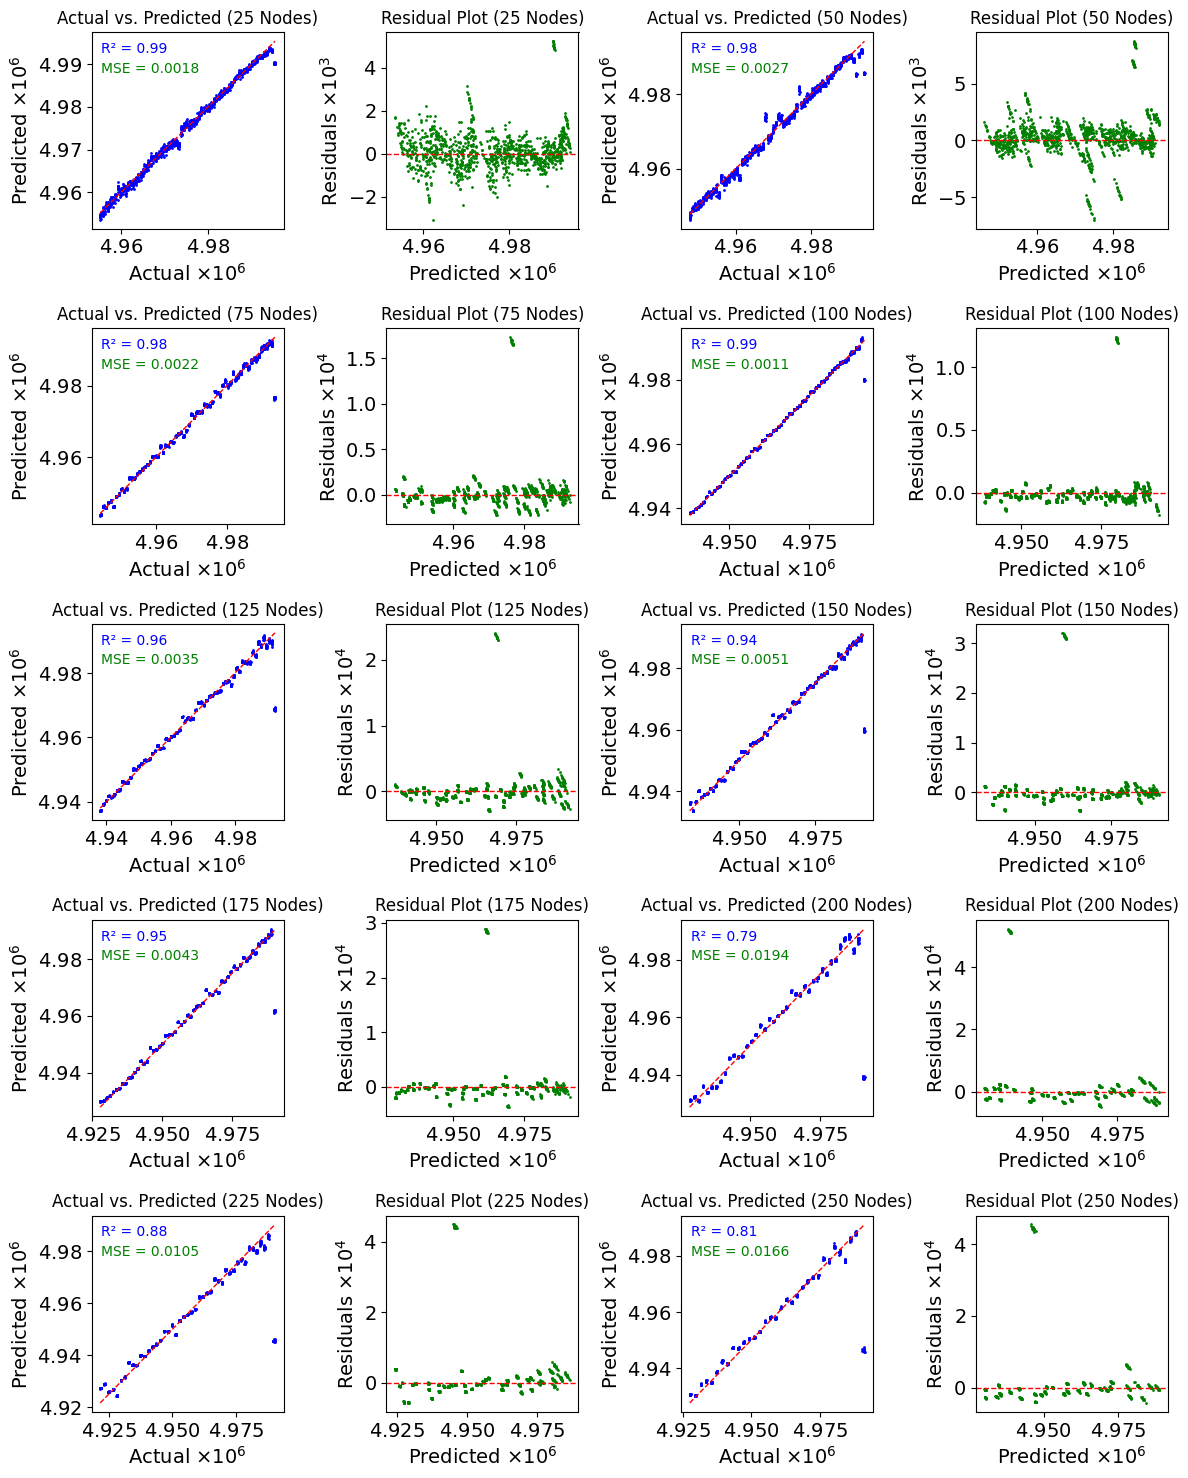

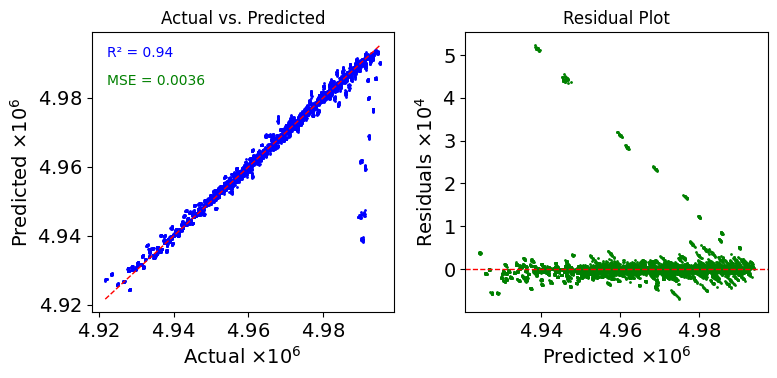

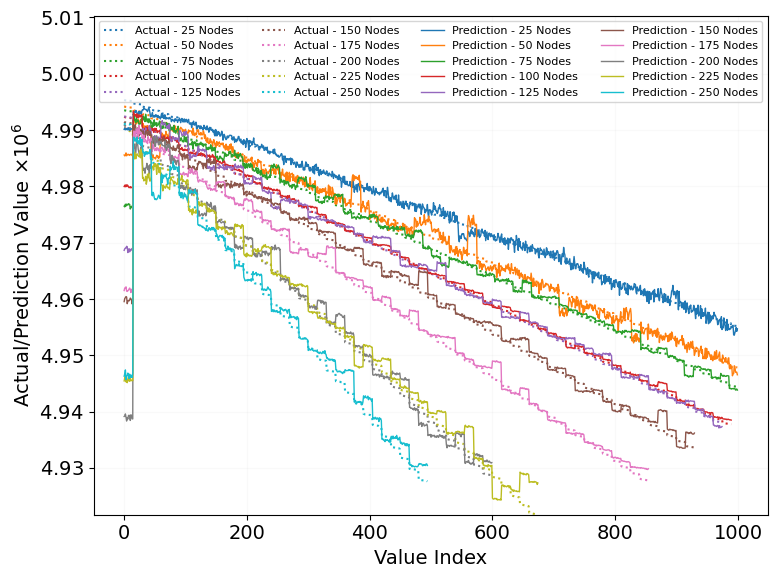

'\n#--------------NSFP Mean Actual vs. Prediction------------------\nfig, ax = plt.subplots()\nnds = [int(nd) for nd in scenarios]\n\n# Calculate mean actual values for each scenario\nmean_actual = [np.mean(nsfp_actl_pred[\'actl\'][scenario]) for scenario in scenarios]\n\n# Calculate mean predicted values for each scenario\nmean_pred = [np.mean(nsfp_actl_pred[\'pred\'][scenario]) for scenario in scenarios]\n\n# Plot mean actual and predicted curves\nax.plot(nds, mean_actual, label=\'Mean Actual\', color=\'blue\')\nax.plot(nds, mean_pred, label=\'Mean Prediction\', linestyle=\'--\', color=\'red\')\n\nax.set_xlabel(\'Number of Nodes\')\n# Formatting\nformatter = mticker.ScalarFormatter(useMathText=True)\nformatter.set_powerlimits((-3, 2))\nax.yaxis.set_major_formatter(formatter)\nLabeloffset(ax, label="Mean Values", axis="y")\nax.grid(alpha=0.07)\n\n# Adjust legend\nax.legend(fontsize=\'10\')\n\n# Save or display the plot\nplt.tight_layout()\nplt.savefig("nsfp_renergy_actl_pred_mean.eps"

In [40]:
#######RESULTS (NSFP)##########
#--------------delay------------------
fig, ax = plt.subplots()
ax.plot(data['scenarios'], data['delay_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
ax.plot(data['scenarios'], data['delay_action_rpls'], label = "RPLS", marker="+", color = "#800000")
ax.plot(data['scenarios'], data['delay_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
ax.plot(data['scenarios'], data['delay_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['delay_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
ax.plot(data['scenarios'], data['delay_action_nsfp'], label = "NSFP", marker="*", color = "#ff8000")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Avg. delay [ms]')
# axset_title("Avg. Delay")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("nsfp_delay.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
ax.plot(data['scenarios'], data['throughput_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
ax.plot(data['scenarios'], data['throughput_action_rpls'], label = "RPLS", marker="+", color = "#800000")
ax.plot(data['scenarios'], data['throughput_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
ax.plot(data['scenarios'], data['throughput_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['throughput_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
ax.plot(data['scenarios'], data['throughput_action_nsfp'], label = "NSFP", marker="*", color = "#ff8000")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Avg. throughput [kbps]')
# ax.set_title("(b) Avg. Throughput")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("nsfp_throughput.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
ax.plot(data['scenarios'], data['renergy_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
ax.plot(data['scenarios'], data['renergy_action_rpls'], label = "RPLS", marker="+", color = "#800000")
ax.plot(data['scenarios'], data['renergy_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
ax.plot(data['scenarios'], data['renergy_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['renergy_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
ax.plot(data['scenarios'], data['renergy_action_nsfp'], label = "NSFP", marker="*", color = "#ff8000")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))
ax.yaxis.set_major_formatter(formatter)
lo = Labeloffset(ax, label="Avg. residual energy [mJ]", axis="y")
# ax.set_ylabel('Avg. Residual Energy [mJ]')
# ax.set_title("(c) Avg. Residual Energy")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("nsfp_renergy.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
ax.plot(data['scenarios'], data['engconsvar_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
ax.plot(data['scenarios'], data['engconsvar_action_rpls'], label = "RPLS", marker="+", color = "#800000")
ax.plot(data['scenarios'], data['engconsvar_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
ax.plot(data['scenarios'], data['engconsvar_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['engconsvar_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
ax.plot(data['scenarios'], data['engconsvar_action_nsfp'], label = "NSFP", marker="*", color = "#ff8000")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Energy consumption rate Var [mJ/s]')
# ax.set_title("(d) Energy consumption Per Second Variance")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("nsfp_engcons_var.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
ax.plot(data['scenarios'], data['lifetime_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
ax.plot(data['scenarios'], data['lifetime_action_rpls'], label = "RPLS", marker="+", color = "#800000")
ax.plot(data['scenarios'], data['lifetime_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
ax.plot(data['scenarios'], data['lifetime_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['lifetime_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
ax.plot(data['scenarios'], data['lifetime_action_nsfp'], label = "NSFP", marker="*", color = "#ff8000")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Lifetime [s]')
# ax.set_title("(d) Energy consumption Per Second Variance")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("nsfp_lifetime.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
ax.plot(data['scenarios'], data['txpacketin_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
ax.plot(data['scenarios'], data['txpacketin_action_rpls'], label = "RPLS", marker="+", color = "#800000")
ax.plot(data['scenarios'], data['txpacketin_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
ax.plot(data['scenarios'], data['txpacketin_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['txpacketin_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
ax.plot(data['scenarios'], data['txpacketin_action_nsfp'], label = "NSFP", marker="*", color = "#ff8000")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Avg. controller-bound traffic [# pkts.]')
# ax.set_title("(e) Avg. Controller Overhead")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("nsfp_txpacketin.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
ax.plot(data['scenarios'], data['drop_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
ax.plot(data['scenarios'], data['drop_action_rpls'], label = "RPLS", marker="+", color = "#800000")
ax.plot(data['scenarios'], data['drop_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
ax.plot(data['scenarios'], data['drop_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['drop_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
ax.plot(data['scenarios'], data['drop_action_nsfp'], label = "NSFP", marker="*", color = "#ff8000")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Avg. packets drop [# pkts.]')
# ax.set_title("(f) Avg. Packets Drop")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("nsfp_drop.eps", format="eps", dpi=600)

ct = pd.concat([round(data['txpacketin_action_atcp'], 2), round(data['txpacketin_action_nsfp'], 2), round(data['txpacketin_action_rpls'], 2), round(data['txpacketin_action_drlir'], 2), round(data['txpacketin_action_rlsdwsn'], 2), round(data['txpacketin_action_sdwise'], 2), round(BATT_LEVEL - data['renergy_action_atcp'], 2), round(BATT_LEVEL - data['renergy_action_nsfp'], 2), round(BATT_LEVEL - data['renergy_action_rpls'], 2), round(BATT_LEVEL - data['renergy_action_drlir'], 2), round(BATT_LEVEL - data['renergy_action_rlsdwsn'], 2), round(BATT_LEVEL - data['renergy_action_sdwise'], 2)],
                axis=1, ignore_index=True).T
ct.columns = scenarios
ct.index = ['avg_ct_overhead_atcp', 'avg_ct_overhead_nsfp', 'avg_ct_overhead_rpls', 'avg_ct_overhead_drlir', 'avg_ct_overhead_rlsdwsn', 'avg_ct_overhead_none', 'avg_engcons_atcp', 'avg_engcons_nsfp', 'avg_engcons_rpls', 'avg_engcons_drlir', 'avg_engcons_rlsdwsn', 'avg_engcons_none']
print(ct)
fig, ax = plt.subplots(figsize=(11, 6))
fig.tight_layout()
# Avg. = ct.mean(axis=1)
# ptx_overhead_enhancement = (Ptx_n - Ptx_n prime / Ptx_n prime)
dd1_1 = np.array([[round((ct.loc['avg_ct_overhead_none']['25'] - ct.loc['avg_ct_overhead_rpls']['25']) / ct.loc['avg_ct_overhead_none']['25'], 2),
                round((ct.loc['avg_ct_overhead_none']['50'] - ct.loc['avg_ct_overhead_rpls']['50']) / ct.loc['avg_ct_overhead_none']['50'], 2),
                round((ct.loc['avg_ct_overhead_none']['75'] - ct.loc['avg_ct_overhead_rpls']['75']) / ct.loc['avg_ct_overhead_none']['75'], 2),
                round((ct.loc['avg_ct_overhead_none']['100'] - ct.loc['avg_ct_overhead_rpls']['100']) / ct.loc['avg_ct_overhead_none']['100'], 2),
                round((ct.loc['avg_ct_overhead_none']['125'] - ct.loc['avg_ct_overhead_rpls']['125']) / ct.loc['avg_ct_overhead_none']['125'], 2),
                round((ct.loc['avg_ct_overhead_none']['150'] - ct.loc['avg_ct_overhead_rpls']['150']) / ct.loc['avg_ct_overhead_none']['150'], 2),
                round((ct.loc['avg_ct_overhead_none']['175'] - ct.loc['avg_ct_overhead_rpls']['175']) / ct.loc['avg_ct_overhead_none']['175'], 2),
                round((ct.loc['avg_ct_overhead_none']['200'] - ct.loc['avg_ct_overhead_rpls']['200']) / ct.loc['avg_ct_overhead_none']['200'], 2),
                round((ct.loc['avg_ct_overhead_none']['225'] - ct.loc['avg_ct_overhead_rpls']['225']) / ct.loc['avg_ct_overhead_none']['225'], 2),
                round((ct.loc['avg_ct_overhead_none']['250'] - ct.loc['avg_ct_overhead_rpls']['250']) / ct.loc['avg_ct_overhead_none']['250'], 2)]
               ], dtype=float)
control_overhead_1 = pd.DataFrame(dd1_1, columns=scenarios, index=['avg_ct_overhead_rpls_enhance'])
control_overhead_1 = control_overhead_1.T

dd1_2 = np.array([[round((ct.loc['avg_ct_overhead_none']['25'] - ct.loc['avg_ct_overhead_drlir']['25']) / ct.loc['avg_ct_overhead_none']['25'], 2),
                round((ct.loc['avg_ct_overhead_none']['50'] - ct.loc['avg_ct_overhead_drlir']['50']) / ct.loc['avg_ct_overhead_none']['50'], 2),
                round((ct.loc['avg_ct_overhead_none']['75'] - ct.loc['avg_ct_overhead_drlir']['75']) / ct.loc['avg_ct_overhead_none']['75'], 2),
                round((ct.loc['avg_ct_overhead_none']['100'] - ct.loc['avg_ct_overhead_drlir']['100']) / ct.loc['avg_ct_overhead_none']['100'], 2),
                round((ct.loc['avg_ct_overhead_none']['125'] - ct.loc['avg_ct_overhead_drlir']['125']) / ct.loc['avg_ct_overhead_none']['125'], 2),
                round((ct.loc['avg_ct_overhead_none']['150'] - ct.loc['avg_ct_overhead_drlir']['150']) / ct.loc['avg_ct_overhead_none']['150'], 2),
                round((ct.loc['avg_ct_overhead_none']['175'] - ct.loc['avg_ct_overhead_drlir']['175']) / ct.loc['avg_ct_overhead_none']['175'], 2),
                round((ct.loc['avg_ct_overhead_none']['200'] - ct.loc['avg_ct_overhead_drlir']['200']) / ct.loc['avg_ct_overhead_none']['200'], 2),
                round((ct.loc['avg_ct_overhead_none']['225'] - ct.loc['avg_ct_overhead_drlir']['225']) / ct.loc['avg_ct_overhead_none']['225'], 2),
                round((ct.loc['avg_ct_overhead_none']['250'] - ct.loc['avg_ct_overhead_drlir']['250']) / ct.loc['avg_ct_overhead_none']['250'], 2)]
               ], dtype=float)
control_overhead_2 = pd.DataFrame(dd1_2, columns=scenarios, index=['avg_ct_overhead_drlir_enhance'])
control_overhead_2 = control_overhead_2.T

dd1_3 = np.array([[round((ct.loc['avg_ct_overhead_none']['25'] - ct.loc['avg_ct_overhead_rlsdwsn']['25']) / ct.loc['avg_ct_overhead_none']['25'], 2),
                round((ct.loc['avg_ct_overhead_none']['50'] - ct.loc['avg_ct_overhead_rlsdwsn']['50']) / ct.loc['avg_ct_overhead_none']['50'], 2),
                round((ct.loc['avg_ct_overhead_none']['75'] - ct.loc['avg_ct_overhead_rlsdwsn']['75']) / ct.loc['avg_ct_overhead_none']['75'], 2),
                round((ct.loc['avg_ct_overhead_none']['100'] - ct.loc['avg_ct_overhead_rlsdwsn']['100']) / ct.loc['avg_ct_overhead_none']['100'], 2),
                round((ct.loc['avg_ct_overhead_none']['125'] - ct.loc['avg_ct_overhead_rlsdwsn']['125']) / ct.loc['avg_ct_overhead_none']['125'], 2),
                round((ct.loc['avg_ct_overhead_none']['150'] - ct.loc['avg_ct_overhead_rlsdwsn']['150']) / ct.loc['avg_ct_overhead_none']['150'], 2),
                round((ct.loc['avg_ct_overhead_none']['175'] - ct.loc['avg_ct_overhead_rlsdwsn']['175']) / ct.loc['avg_ct_overhead_none']['175'], 2),
                round((ct.loc['avg_ct_overhead_none']['200'] - ct.loc['avg_ct_overhead_rlsdwsn']['200']) / ct.loc['avg_ct_overhead_none']['200'], 2),
                round((ct.loc['avg_ct_overhead_none']['225'] - ct.loc['avg_ct_overhead_rlsdwsn']['225']) / ct.loc['avg_ct_overhead_none']['225'], 2),
                round((ct.loc['avg_ct_overhead_none']['250'] - ct.loc['avg_ct_overhead_rlsdwsn']['250']) / ct.loc['avg_ct_overhead_none']['250'], 2)]
               ], dtype=float)
control_overhead_3 = pd.DataFrame(dd1_3, columns=scenarios, index=['avg_ct_overhead_rlsdwsn_enhance'])
control_overhead_3 = control_overhead_3.T

dd1_4 = np.array([[round((ct.loc['avg_ct_overhead_none']['25'] - ct.loc['avg_ct_overhead_atcp']['25']) / ct.loc['avg_ct_overhead_none']['25'], 2),
                round((ct.loc['avg_ct_overhead_none']['50'] - ct.loc['avg_ct_overhead_atcp']['50']) / ct.loc['avg_ct_overhead_none']['50'], 2),
                round((ct.loc['avg_ct_overhead_none']['75'] - ct.loc['avg_ct_overhead_atcp']['75']) / ct.loc['avg_ct_overhead_none']['75'], 2),
                round((ct.loc['avg_ct_overhead_none']['100'] - ct.loc['avg_ct_overhead_atcp']['100']) / ct.loc['avg_ct_overhead_none']['100'], 2),
                round((ct.loc['avg_ct_overhead_none']['125'] - ct.loc['avg_ct_overhead_atcp']['125']) / ct.loc['avg_ct_overhead_none']['125'], 2),
                round((ct.loc['avg_ct_overhead_none']['150'] - ct.loc['avg_ct_overhead_atcp']['150']) / ct.loc['avg_ct_overhead_none']['150'], 2),
                round((ct.loc['avg_ct_overhead_none']['175'] - ct.loc['avg_ct_overhead_atcp']['175']) / ct.loc['avg_ct_overhead_none']['175'], 2),
                round((ct.loc['avg_ct_overhead_none']['200'] - ct.loc['avg_ct_overhead_atcp']['200']) / ct.loc['avg_ct_overhead_none']['200'], 2),
                round((ct.loc['avg_ct_overhead_none']['225'] - ct.loc['avg_ct_overhead_atcp']['225']) / ct.loc['avg_ct_overhead_none']['225'], 2),
                round((ct.loc['avg_ct_overhead_none']['250'] - ct.loc['avg_ct_overhead_atcp']['250']) / ct.loc['avg_ct_overhead_none']['250'], 2)]
               ], dtype=float)
control_overhead_4 = pd.DataFrame(dd1_4, columns=scenarios, index=['avg_ct_overhead_atcp_enhance'])
control_overhead_4 = control_overhead_4.T

dd1_5 = np.array([[round((ct.loc['avg_ct_overhead_none']['25'] - ct.loc['avg_ct_overhead_nsfp']['25']) / ct.loc['avg_ct_overhead_none']['25'], 2),
                round((ct.loc['avg_ct_overhead_none']['50'] - ct.loc['avg_ct_overhead_nsfp']['50']) / ct.loc['avg_ct_overhead_none']['50'], 2),
                round((ct.loc['avg_ct_overhead_none']['75'] - ct.loc['avg_ct_overhead_nsfp']['75']) / ct.loc['avg_ct_overhead_none']['75'], 2),
                round((ct.loc['avg_ct_overhead_none']['100'] - ct.loc['avg_ct_overhead_nsfp']['100']) / ct.loc['avg_ct_overhead_none']['100'], 2),
                round((ct.loc['avg_ct_overhead_none']['125'] - ct.loc['avg_ct_overhead_nsfp']['125']) / ct.loc['avg_ct_overhead_none']['125'], 2),
                round((ct.loc['avg_ct_overhead_none']['150'] - ct.loc['avg_ct_overhead_nsfp']['150']) / ct.loc['avg_ct_overhead_none']['150'], 2),
                round((ct.loc['avg_ct_overhead_none']['175'] - ct.loc['avg_ct_overhead_nsfp']['175']) / ct.loc['avg_ct_overhead_none']['175'], 2),
                round((ct.loc['avg_ct_overhead_none']['200'] - ct.loc['avg_ct_overhead_nsfp']['200']) / ct.loc['avg_ct_overhead_none']['200'], 2),
                round((ct.loc['avg_ct_overhead_none']['225'] - ct.loc['avg_ct_overhead_nsfp']['225']) / ct.loc['avg_ct_overhead_none']['225'], 2),
                round((ct.loc['avg_ct_overhead_none']['250'] - ct.loc['avg_ct_overhead_nsfp']['250']) / ct.loc['avg_ct_overhead_none']['250'], 2)]
               ], dtype=float)
control_overhead_5 = pd.DataFrame(dd1_5, columns=scenarios, index=['avg_ct_overhead_nsfp_enhance'])
control_overhead_5 = control_overhead_5.T

# Add bars
width = 6
offset = 6  # Adjust the offset value as needed
xticks_values = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
x_new = [value + offset * i for i, value in enumerate(xticks_values)]
ax.bar(np.array(x_new) - 2*width, control_overhead_1["avg_ct_overhead_rpls_enhance"], width=width, color = '#800000', edgecolor='white', label="RPLS")
ax.bar(np.array(x_new) - width, control_overhead_2["avg_ct_overhead_drlir_enhance"], width=width, color = '#8000ff', edgecolor='white', label="DRLIR")
ax.bar(np.array(x_new) , control_overhead_3["avg_ct_overhead_rlsdwsn_enhance"], width=width, color = '#ff0000', edgecolor='white', label="RLSDWSN")
ax.bar(np.array(x_new) + width, control_overhead_4["avg_ct_overhead_atcp_enhance"], width=width, color = '#0079E7', edgecolor='white', label="ATCP")
ax.bar(np.array(x_new) + 2*width, control_overhead_5["avg_ct_overhead_nsfp_enhance"], width=width, color = '#ff8000', edgecolor='white', label="NSFP")

# Add percentages as labels
i = 0
for idx in control_overhead_1.index:
    start = 0
    y = control_overhead_1.loc[idx, :]
    value = control_overhead_1.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i - 2*width,
        y=(start + y+0.06) if y.item() >= 0 else (start + y-0.06),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in control_overhead_2.index:
    start = 0
    y = control_overhead_2.loc[idx, :]
    value = control_overhead_2.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i - width,
        y=(start + y+0.06) if y.item() >= 0 else (start + y-0.06),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in control_overhead_3.index:
    start = 0
    y = control_overhead_3.loc[idx, :]
    value = control_overhead_3.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i,
        y=(start + y+0.06) if y.item() >= 0 else (start + y-0.06),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in control_overhead_4.index:
    start = 0
    y = control_overhead_4.loc[idx, :]
    value = control_overhead_4.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i + width,
        y=(start + y+0.06) if y.item() >= 0 else (start + y-0.06),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in control_overhead_5.index:
    start = 0
    y = control_overhead_5.loc[idx, :]
    value = control_overhead_5.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i + 2*width,
        y=(start + y+0.06) if y.item() >= 0 else (start + y-0.06),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0

control_overhead = pd.concat([ct.loc['avg_ct_overhead_none'], ct.loc['avg_ct_overhead_rpls'], ct.loc['avg_ct_overhead_drlir'], ct.loc['avg_ct_overhead_rlsdwsn'], ct.loc['avg_ct_overhead_atcp'], ct.loc['avg_ct_overhead_nsfp'], control_overhead_1.iloc[:, 0], control_overhead_2.iloc[:, 0], control_overhead_3.iloc[:, 0], control_overhead_4.iloc[:, 0], control_overhead_5.iloc[:, 0]], axis=1)
# Calculate mean and round the values
mean_row = control_overhead.mean().round(2)
# Append the mean row to the DataFrame
control_overhead.loc['mean'] = mean_row
control_overhead = control_overhead.T
# Set the columns and index of the DataFrame
control_overhead.index = ['SDWISE', 'RPLS', 'DRLIR', 'RLSDWSN', 'ATCP', 'NSFP', 'RPLS-enhance', 'DRLIR-enhance', 'RLSDWSN-enhance', 'ATCP-enhance', 'NSFP-enhance']
control_overhead.columns = ['Ptx_25', 'Ptx_50', 'Ptx_75', 'Ptx_100', 'Ptx_125', 'Ptx_150', 'Ptx_175', 'Ptx_200', 'Ptx_225', 'Ptx_250', 'mean']
print(control_overhead)

ax.tick_params(axis='x', labelrotation = 90)
plt.setp(ax, xticks=x_new, xticklabels=scenarios)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Control traffic efficiency [%]')
# ax.set_title("Avg. Control Traffic as Percentage of Enhancements for Different Node Scenarios")
ax.legend(fontsize="12", loc ="upper left", ncol=6)
ax.set_ylim(ymin=-0.2, ymax=1.4)
# ax.margins(None, 0.2)
# ax.grid(alpha=0.07)
i = 0
for idx in scenarios:
    ax.vlines(int(idx) + offset * i + 2*width + width/2, -0.2, 1.4, linestyles='solid', colors='gray', alpha=0.2)
    i += 1
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("nsfp_txpacketin_comparison.eps", format="eps", dpi=600)

fig, ax = plt.subplots(figsize=(11, 6))
fig.tight_layout()
# EC_n = E_0 - E_n
# EC_enhancement = (EC_n prime - EC_n / EC_n prime)
dd2_1 = np.array([[round((ct.loc['avg_engcons_none']['25'] - ct.loc['avg_engcons_rpls']['25']) / ct.loc['avg_engcons_none']['25'], 2),
                round((ct.loc['avg_engcons_none']['50'] - ct.loc['avg_engcons_rpls']['50']) / ct.loc['avg_engcons_none']['50'], 2),
                round((ct.loc['avg_engcons_none']['75'] - ct.loc['avg_engcons_rpls']['75']) / ct.loc['avg_engcons_none']['75'], 2),
                round((ct.loc['avg_engcons_none']['100'] - ct.loc['avg_engcons_rpls']['100']) / ct.loc['avg_engcons_none']['100'], 2),
                round((ct.loc['avg_engcons_none']['125'] - ct.loc['avg_engcons_rpls']['125']) / ct.loc['avg_engcons_none']['125'], 2),
                round((ct.loc['avg_engcons_none']['150'] - ct.loc['avg_engcons_rpls']['150']) / ct.loc['avg_engcons_none']['150'], 2),
                round((ct.loc['avg_engcons_none']['175'] - ct.loc['avg_engcons_rpls']['175']) / ct.loc['avg_engcons_none']['175'], 2),
                round((ct.loc['avg_engcons_none']['200'] - ct.loc['avg_engcons_rpls']['200']) / ct.loc['avg_engcons_none']['200'], 2),
                round((ct.loc['avg_engcons_none']['225'] - ct.loc['avg_engcons_rpls']['225']) / ct.loc['avg_engcons_none']['225'], 2),
                round((ct.loc['avg_engcons_none']['250'] - ct.loc['avg_engcons_rpls']['250']) / ct.loc['avg_engcons_none']['250'], 2)]
               ], dtype=float)
energy_consumption_1 = pd.DataFrame(dd2_1, columns=scenarios, index=['avg_engcons_rpls_enhance'])
energy_consumption_1 = energy_consumption_1.T

dd2_2 = np.array([[round((ct.loc['avg_engcons_none']['25'] - ct.loc['avg_engcons_drlir']['25']) / ct.loc['avg_engcons_none']['25'], 2),
                round((ct.loc['avg_engcons_none']['50'] - ct.loc['avg_engcons_drlir']['50']) / ct.loc['avg_engcons_none']['50'], 2),
                round((ct.loc['avg_engcons_none']['75'] - ct.loc['avg_engcons_drlir']['75']) / ct.loc['avg_engcons_none']['75'], 2),
                round((ct.loc['avg_engcons_none']['100'] - ct.loc['avg_engcons_drlir']['100']) / ct.loc['avg_engcons_none']['100'], 2),
                round((ct.loc['avg_engcons_none']['125'] - ct.loc['avg_engcons_drlir']['125']) / ct.loc['avg_engcons_none']['125'], 2),
                round((ct.loc['avg_engcons_none']['150'] - ct.loc['avg_engcons_drlir']['150']) / ct.loc['avg_engcons_none']['150'], 2),
                round((ct.loc['avg_engcons_none']['175'] - ct.loc['avg_engcons_drlir']['175']) / ct.loc['avg_engcons_none']['175'], 2),
                round((ct.loc['avg_engcons_none']['200'] - ct.loc['avg_engcons_drlir']['200']) / ct.loc['avg_engcons_none']['200'], 2),
                round((ct.loc['avg_engcons_none']['225'] - ct.loc['avg_engcons_drlir']['225']) / ct.loc['avg_engcons_none']['225'], 2),
                round((ct.loc['avg_engcons_none']['250'] - ct.loc['avg_engcons_drlir']['250']) / ct.loc['avg_engcons_none']['250'], 2)]
               ], dtype=float)
energy_consumption_2 = pd.DataFrame(dd2_2, columns=scenarios, index=['avg_engcons_drlir_enhance'])
energy_consumption_2 = energy_consumption_2.T

dd2_3 = np.array([[round((ct.loc['avg_engcons_none']['25'] - ct.loc['avg_engcons_rlsdwsn']['25']) / ct.loc['avg_engcons_none']['25'], 2),
                round((ct.loc['avg_engcons_none']['50'] - ct.loc['avg_engcons_rlsdwsn']['50']) / ct.loc['avg_engcons_none']['50'], 2),
                round((ct.loc['avg_engcons_none']['75'] - ct.loc['avg_engcons_rlsdwsn']['75']) / ct.loc['avg_engcons_none']['75'], 2),
                round((ct.loc['avg_engcons_none']['100'] - ct.loc['avg_engcons_rlsdwsn']['100']) / ct.loc['avg_engcons_none']['100'], 2),
                round((ct.loc['avg_engcons_none']['125'] - ct.loc['avg_engcons_rlsdwsn']['125']) / ct.loc['avg_engcons_none']['125'], 2),
                round((ct.loc['avg_engcons_none']['150'] - ct.loc['avg_engcons_rlsdwsn']['150']) / ct.loc['avg_engcons_none']['150'], 2),
                round((ct.loc['avg_engcons_none']['175'] - ct.loc['avg_engcons_rlsdwsn']['175']) / ct.loc['avg_engcons_none']['175'], 2),
                round((ct.loc['avg_engcons_none']['200'] - ct.loc['avg_engcons_rlsdwsn']['200']) / ct.loc['avg_engcons_none']['200'], 2),
                round((ct.loc['avg_engcons_none']['225'] - ct.loc['avg_engcons_rlsdwsn']['225']) / ct.loc['avg_engcons_none']['225'], 2),
                round((ct.loc['avg_engcons_none']['250'] - ct.loc['avg_engcons_rlsdwsn']['250']) / ct.loc['avg_engcons_none']['250'], 2)]
               ], dtype=float)
energy_consumption_3 = pd.DataFrame(dd2_3, columns=scenarios, index=['avg_engcons_rlsdwsn_enhance'])
energy_consumption_3 = energy_consumption_3.T

dd2_4 = np.array([[round((ct.loc['avg_engcons_none']['25'] - ct.loc['avg_engcons_atcp']['25']) / ct.loc['avg_engcons_none']['25'], 2),
                round((ct.loc['avg_engcons_none']['50'] - ct.loc['avg_engcons_atcp']['50']) / ct.loc['avg_engcons_none']['50'], 2),
                round((ct.loc['avg_engcons_none']['75'] - ct.loc['avg_engcons_atcp']['75']) / ct.loc['avg_engcons_none']['75'], 2),
                round((ct.loc['avg_engcons_none']['100'] - ct.loc['avg_engcons_atcp']['100']) / ct.loc['avg_engcons_none']['100'], 2),
                round((ct.loc['avg_engcons_none']['125'] - ct.loc['avg_engcons_atcp']['125']) / ct.loc['avg_engcons_none']['125'], 2),
                round((ct.loc['avg_engcons_none']['150'] - ct.loc['avg_engcons_atcp']['150']) / ct.loc['avg_engcons_none']['150'], 2),
                round((ct.loc['avg_engcons_none']['175'] - ct.loc['avg_engcons_atcp']['175']) / ct.loc['avg_engcons_none']['175'], 2),
                round((ct.loc['avg_engcons_none']['200'] - ct.loc['avg_engcons_atcp']['200']) / ct.loc['avg_engcons_none']['200'], 2),
                round((ct.loc['avg_engcons_none']['225'] - ct.loc['avg_engcons_atcp']['225']) / ct.loc['avg_engcons_none']['225'], 2),
                round((ct.loc['avg_engcons_none']['250'] - ct.loc['avg_engcons_atcp']['250']) / ct.loc['avg_engcons_none']['250'], 2)]
               ], dtype=float)
energy_consumption_4 = pd.DataFrame(dd2_4, columns=scenarios, index=['avg_engcons_atcp_enhance'])
energy_consumption_4 = energy_consumption_4.T

dd2_5 = np.array([[round((ct.loc['avg_engcons_none']['25'] - ct.loc['avg_engcons_nsfp']['25']) / ct.loc['avg_engcons_none']['25'], 2),
                round((ct.loc['avg_engcons_none']['50'] - ct.loc['avg_engcons_nsfp']['50']) / ct.loc['avg_engcons_none']['50'], 2),
                round((ct.loc['avg_engcons_none']['75'] - ct.loc['avg_engcons_nsfp']['75']) / ct.loc['avg_engcons_none']['75'], 2),
                round((ct.loc['avg_engcons_none']['100'] - ct.loc['avg_engcons_nsfp']['100']) / ct.loc['avg_engcons_none']['100'], 2),
                round((ct.loc['avg_engcons_none']['125'] - ct.loc['avg_engcons_nsfp']['125']) / ct.loc['avg_engcons_none']['125'], 2),
                round((ct.loc['avg_engcons_none']['150'] - ct.loc['avg_engcons_nsfp']['150']) / ct.loc['avg_engcons_none']['150'], 2),
                round((ct.loc['avg_engcons_none']['175'] - ct.loc['avg_engcons_nsfp']['175']) / ct.loc['avg_engcons_none']['175'], 2),
                round((ct.loc['avg_engcons_none']['200'] - ct.loc['avg_engcons_nsfp']['200']) / ct.loc['avg_engcons_none']['200'], 2),
                round((ct.loc['avg_engcons_none']['225'] - ct.loc['avg_engcons_nsfp']['225']) / ct.loc['avg_engcons_none']['225'], 2),
                round((ct.loc['avg_engcons_none']['250'] - ct.loc['avg_engcons_nsfp']['250']) / ct.loc['avg_engcons_none']['250'], 2)]
               ], dtype=float)
energy_consumption_5 = pd.DataFrame(dd2_5, columns=scenarios, index=['avg_engcons_nsfp_enhance'])
energy_consumption_5 = energy_consumption_5.T

# Add bars
width = 6
offset = 6  # Adjust the offset value as needed
xticks_values = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
x_new = [value + offset * i for i, value in enumerate(xticks_values)]
ax.bar(np.array(x_new) - 2*width, energy_consumption_1["avg_engcons_rpls_enhance"], width=width, color = '#800000', edgecolor='white', label="RPLS")
ax.bar(np.array(x_new) - width, energy_consumption_2["avg_engcons_drlir_enhance"], width=width, color = '#8000ff', edgecolor='white', label="DRLIR")
ax.bar(np.array(x_new) , energy_consumption_3["avg_engcons_rlsdwsn_enhance"], width=width, color = '#ff0000', edgecolor='white', label="RLSDWSN")
ax.bar(np.array(x_new) + width, energy_consumption_4["avg_engcons_atcp_enhance"], width=width, color = '#0079E7', edgecolor='white', label="ATCP")
ax.bar(np.array(x_new) + 2*width, energy_consumption_5["avg_engcons_nsfp_enhance"], width=width, color = '#ff8000', edgecolor='white', label="NSFP")

# Add percentages as labels
i = 0
for idx in energy_consumption_1.index:
    start = 0
    y = energy_consumption_1.loc[idx, :]
    value = energy_consumption_1.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i - 2*width,
        y=(start + y+0.04) if y.item() >= 0 else (start + y-0.04),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in energy_consumption_2.index:
    start = 0
    y = energy_consumption_2.loc[idx, :]
    value = energy_consumption_2.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i - width,
        y=(start + y+0.04) if y.item() >= 0 else (start + y-0.04),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in energy_consumption_3.index:
    start = 0
    y = energy_consumption_3.loc[idx, :]
    value = energy_consumption_3.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i,
        y=(start + y+0.04) if y.item() >= 0 else (start + y-0.04),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in energy_consumption_4.index:
    start = 0
    y = energy_consumption_4.loc[idx, :]
    value = energy_consumption_4.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i + width,
        y=(start + y+0.04) if y.item() >= 0 else (start + y-0.04),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in energy_consumption_5.index:
    start = 0
    y = energy_consumption_5.loc[idx, :]
    value = energy_consumption_5.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i + 2*width,
        y=(start + y+0.04) if y.item() >= 0 else (start + y-0.04),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0

energy_consumption = pd.concat([ct.loc['avg_engcons_none'], ct.loc['avg_engcons_rpls'], ct.loc['avg_engcons_drlir'], ct.loc['avg_engcons_rlsdwsn'], ct.loc['avg_engcons_atcp'], ct.loc['avg_engcons_nsfp'], energy_consumption_1.iloc[:, 0], energy_consumption_2.iloc[:, 0], energy_consumption_3.iloc[:, 0], energy_consumption_4.iloc[:, 0], energy_consumption_5.iloc[:, 0]], axis=1)
# Calculate mean and round the values
mean_row = energy_consumption.mean().round(2)
# Append the mean row to the DataFrame
energy_consumption.loc['mean'] = mean_row
energy_consumption = energy_consumption.T
# Set the columns and index of the DataFrame
energy_consumption.index = ['SDWISE', 'RPLS', 'DRLIR', 'RLSDWSN', 'ATCP', 'NSFP', 'RPLS-enhance', 'DRLIR-enhance', 'RLSDWSN-enhance', 'ATCP-enhance', 'NSFP-enhance']
energy_consumption.columns = ['E_25', 'E_50', 'E_75', 'E_100', 'E_125', 'E_150', 'E_175', 'E_200', 'E_225', 'E_250', 'mean']
print(energy_consumption)

ax.tick_params(axis='x', labelrotation = 90)
plt.setp(ax, xticks=x_new, xticklabels=scenarios)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Energy consumption efficiency [%]')
# ax.set_title("Avg. Energy Consumption as Percentage of Enhancements for Different Node Scenarios")
ax.legend(fontsize="12", loc ="upper left", ncol=6)
ax.set_ylim(ymin=-0.2, ymax=1)
# ax.margins(None, 0.2)
# ax.grid(alpha=0.07)
i = 0
for idx in scenarios:
    ax.vlines(int(idx) + offset * i + 2*width + width/2, -0.2, 1.4, linestyles='solid', colors='gray', alpha=0.2)
    i += 1
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("nsfp_renergy_comparison.eps", format="eps", dpi=600)

#######RESULTS (2)##########

#--------------return------------------
fig, ax = plt.subplots()
return_data_list = [
    nsfp_action_25_return,
    nsfp_action_50_return,
    nsfp_action_75_return,
    nsfp_action_100_return,
    nsfp_action_125_return,
    nsfp_action_150_return,
    nsfp_action_175_return,
    nsfp_action_200_return,
    nsfp_action_225_return,
    nsfp_action_250_return
]
# Plot smoothed return curves for each scenario
for scenario, return_data in zip(scenarios, return_data_list):
    # Smooth the return values using exponential moving Avg.
    smoothed_return = return_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax.plot(return_data["Step"], smoothed_return, label=f"{scenario} nodes", linewidth=1)
    ax.annotate(f"{scenario}", (return_data["Step"].iloc[int(return_data["Step"].max()/2)], smoothed_return.iloc[int(return_data["Step"].max()/2)]+10), fontsize=10)

# Set logarithmic scale for y-axis
# ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Training steps')
ax.set_ylabel('Return')
ax.grid(alpha=0.07)
ax.legend(fontsize='10')

plt.tight_layout()
plt.savefig("nsfp_return.eps", format="eps", dpi=600)
plt.show()

'''
fig, ax = plt.subplots()
return_data_list = [
    rpls_action_25_return,
    rpls_action_50_return,
    rpls_action_75_return,
    rpls_action_100_return,
    rpls_action_125_return,
    rpls_action_150_return,
    rpls_action_175_return,
    rpls_action_200_return,
    rpls_action_225_return,
    rpls_action_250_return
]
# Plot smoothed return curves for each scenario
for scenario, return_data in zip(scenarios, return_data_list):
    # Smooth the return values using exponential moving Avg.
    smoothed_return = return_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax.plot(return_data["Step"], smoothed_return, label=f"{scenario} nodes", linewidth=1)

# Set logarithmic scale for y-axis
# ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Training steps')
ax.set_ylabel('Return')
ax.grid(alpha=0.07)
ax.legend(fontsize='10')

plt.tight_layout()
plt.savefig("rpls_return.eps", format="eps", dpi=600)
plt.show()

fig, ax = plt.subplots()
return_data_list = [
    drlir_action_25_return,
    drlir_action_50_return,
    drlir_action_75_return,
    drlir_action_100_return,
    drlir_action_125_return,
    drlir_action_150_return,
    drlir_action_175_return,
    drlir_action_200_return,
    drlir_action_225_return,
    drlir_action_250_return
]
# Plot smoothed return curves for each scenario
for scenario, return_data in zip(scenarios, return_data_list):
    # Smooth the return values using exponential moving Avg.
    smoothed_return = return_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax.plot(return_data["Step"], smoothed_return, label=f"{scenario} nodes", linewidth=1)

# Set logarithmic scale for y-axis
# ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Training steps')
ax.set_ylabel('Return')
ax.grid(alpha=0.07)
ax.legend(fontsize='10')

plt.tight_layout()
plt.savefig("drlir_return.eps", format="eps", dpi=600)
plt.show()

fig, ax = plt.subplots()
return_data_list = [
    rlsdwsn_action_25_return,
    rlsdwsn_action_50_return,
    rlsdwsn_action_75_return,
    rlsdwsn_action_100_return,
    rlsdwsn_action_125_return,
    rlsdwsn_action_150_return,
    rlsdwsn_action_175_return,
    rlsdwsn_action_200_return,
    rlsdwsn_action_225_return,
    rlsdwsn_action_250_return
]
# Plot smoothed return curves for each scenario
for scenario, return_data in zip(scenarios, return_data_list):
    # Smooth the return values using exponential moving Avg.
    smoothed_return = return_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax.plot(return_data["Step"], smoothed_return, label=f"{scenario} nodes", linewidth=1)

# Set logarithmic scale for y-axis
# ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Training steps')
ax.set_ylabel('Return')
ax.grid(alpha=0.07)
ax.legend(fontsize='10')

plt.tight_layout()
plt.savefig("rlsdwsn_return.eps", format="eps", dpi=600)
plt.show()
'''
#--------------critic loss------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
loss_data_list = [
    nsfp_action_25_valueloss,
    nsfp_action_50_valueloss,
    nsfp_action_75_valueloss,
    nsfp_action_100_valueloss,
    nsfp_action_125_valueloss,
    nsfp_action_150_valueloss,
    nsfp_action_175_valueloss,
    nsfp_action_200_valueloss,
    nsfp_action_225_valueloss,
    nsfp_action_250_valueloss
]
# Original Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax1.plot(loss_data["Step"], smoothed_valueloss, label=f"{scenario} nodes", linewidth=1)

ax1.set_xlabel('Training steps')
ax1.set_ylabel('Critic Loss')
ax1.grid(alpha=0.07)
ax1.legend(fontsize='10')

# Log Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax2.plot(loss_data["Step"], np.log(smoothed_valueloss), label=f"{scenario} nodes", linewidth=1)

ax2.set_xlabel('Training steps')
ax2.set_ylabel('Log(Critic Loss)')
ax2.grid(alpha=0.07)
# ax2.legend(fontsize='10')

plt.tight_layout()
plt.savefig("nsfp_critic_loss.eps", format="eps", dpi=600)
plt.show()
#--------------actor loss------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
loss_data_list = [
    nsfp_action_25_policyloss,
    nsfp_action_50_policyloss,
    nsfp_action_75_policyloss,
    nsfp_action_100_policyloss,
    nsfp_action_125_policyloss,
    nsfp_action_150_policyloss,
    nsfp_action_175_policyloss,
    nsfp_action_200_policyloss,
    nsfp_action_225_policyloss,
    nsfp_action_250_policyloss
]
# Original Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax1.plot(loss_data["Step"], smoothed_valueloss, label=f"{scenario} nodes", linewidth=1)

ax1.set_xlabel('Training steps')
ax1.set_ylabel('Actor Loss')
ax1.grid(alpha=0.07)
ax1.legend(fontsize='10')

# Log Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax2.plot(loss_data["Step"], np.log(smoothed_valueloss), label=f"{scenario} nodes", linewidth=1)

ax2.set_xlabel('Training steps')
ax2.set_ylabel('Log(Actor Loss)')
ax2.grid(alpha=0.07)
# ax2.legend(fontsize='10')

plt.tight_layout()
plt.savefig("nsfp_actor_loss.eps", format="eps", dpi=600)
plt.show()

'''
#--------------RPLS/DRLiR/RLSDWSN loss------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
loss_data_list = [
    rpls_action_25_loss,
    rpls_action_50_loss,
    rpls_action_75_loss,
    rpls_action_100_loss,
    rpls_action_125_loss,
    rpls_action_150_loss,
    rpls_action_175_loss,
    rpls_action_200_loss,
    rpls_action_225_loss,
    rpls_action_250_loss
]
# Original Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    # normalized_loss = (smoothed_valueloss - smoothed_valueloss.min()) / (smoothed_valueloss.max() - smoothed_valueloss.min())
    ax1.plot(loss_data["Step"], smoothed_valueloss, label=f"{scenario} nodes", linewidth=1)

ax1.set_xlabel('Training steps')
# formatter = mticker.ScalarFormatter(useMathText=True)
# formatter.set_powerlimits((-3,2))
# ax1.yaxis.set_major_formatter(formatter)
# Labeloffset(ax1, label="Loss", axis="y")
# ax1.set_ylim(0, 0.005)
ax1.set_ylabel('Loss')
ax1.grid(alpha=0.07)
ax1.legend(fontsize='10')

# Log Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax2.plot(loss_data["Step"], np.log(smoothed_valueloss), label=f"{scenario} nodes", linewidth=1)

ax2.set_xlabel('Training steps')
ax2.set_ylabel('Log(Loss)')
ax2.grid(alpha=0.07)
# ax2.legend(fontsize='10')

plt.tight_layout()
plt.savefig("rpls_actor_loss.eps", format="eps", dpi=600)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
loss_data_list = [
    drlir_action_25_loss,
    drlir_action_50_loss,
    drlir_action_75_loss,
    drlir_action_100_loss,
    drlir_action_125_loss,
    drlir_action_150_loss,
    drlir_action_175_loss,
    drlir_action_200_loss,
    drlir_action_225_loss,
    drlir_action_250_loss
]
# Original Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax1.plot(loss_data["Step"], smoothed_valueloss, label=f"{scenario} nodes", linewidth=1)

ax1.set_xlabel('Training steps')
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))
ax1.yaxis.set_major_formatter(formatter)
Labeloffset(ax1, label="Loss", axis="y")
# ax1.set_ylabel('Loss')
ax1.grid(alpha=0.07)
ax1.legend(fontsize='10')

# Log Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax2.plot(loss_data["Step"], np.log(smoothed_valueloss), label=f"{scenario} nodes", linewidth=1)

ax2.set_xlabel('Training steps')
ax2.set_ylabel('Log(Loss)')
ax2.grid(alpha=0.07)
# ax2.legend(fontsize='10')

plt.tight_layout()
plt.savefig("drlir_actor_loss.eps", format="eps", dpi=600)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
loss_data_list = [
    rlsdwsn_action_25_loss,
    rlsdwsn_action_50_loss,
    rlsdwsn_action_75_loss,
    rlsdwsn_action_100_loss,
    rlsdwsn_action_125_loss,
    rlsdwsn_action_150_loss,
    rlsdwsn_action_175_loss,
    rlsdwsn_action_200_loss,
    rlsdwsn_action_225_loss,
    rlsdwsn_action_250_loss
]
# Original Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax1.plot(loss_data["Step"], smoothed_valueloss, label=f"{scenario} nodes", linewidth=1)

ax1.set_xlabel('Training steps')
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))
ax1.yaxis.set_major_formatter(formatter)
Labeloffset(ax1, label="Loss", axis="y")
# ax1.set_ylabel('Loss')
ax1.grid(alpha=0.07)
ax1.legend(fontsize='10')

# Log Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax2.plot(loss_data["Step"], np.log(smoothed_valueloss), label=f"{scenario} nodes", linewidth=1)

ax2.set_xlabel('Training steps')
ax2.set_ylabel('Log(Loss)')
ax2.grid(alpha=0.07)
# ax2.legend(fontsize='10')

plt.tight_layout()
plt.savefig("rlsdwsn_actor_loss.eps", format="eps", dpi=600)
plt.show()
'''
#--------------NSFP Actual vs. Prediction----------------------
# MSE (Mean Squared Error) and R-squared are both commonly used metrics for evaluating regression models, but they capture different aspects of model performance and have their own strengths and weaknesses:

# Mean Squared Error (MSE):

#     Pros:
#         Provides a measure of the Avg. squared difference between the actual and predicted values.
#         Penalizes larger errors more heavily than smaller errors, making it sensitive to outliers.
#         Easy to interpret and understand.
#     Cons:
#         The MSE is sensitive to the scale of the data. When the target variable has large values, the squared errors can become very large, leading to inflated MSE values.
#         Not normalized, meaning that its value is highly dependent on the scale of the target variable. Comparing MSE values across different datasets with different scales may not be meaningful.
#         Outliers can heavily influence the MSE, potentially skewing its interpretation.

# R-squared (Coefficient of Determination):

#     Pros:
#         Represents the proportion of variance in the dependent variable (target variable) that is explained by the independent variables (features) in the regression model.
#         Scaled between 0 and 1, making it easier to compare across different models and datasets.
#         Provides an intuitive interpretation of the model's goodness of fit.
#     Cons:
#         R-squared can be misleading when used in isolation, as it does not indicate the magnitude of the errors or whether the model is biased.
#         Does not directly account for the scale of the data or the presence of outliers.
#         R-squared can be artificially inflated when adding more predictors to the model, even if those predictors are not truly associated with the target variable (overfitting).

    # Scatter plot of actual vs. predicted values: This plot helps visualize how well the model's predictions align with the actual values. Ideally, the points should fall close to the diagonal line (y = x).
    # Residual plot: This plot shows the residuals (the differences between actual and predicted values) against the predicted values. It helps to check for any patterns or heteroscedasticity in the residuals.

# Interpreting a residual plot for a regression prediction model involves examining the distribution and patterns of the residuals (the differences between the actual and predicted values) against the predicted values. Here are some key points to consider when interpreting a residual plot:

#     Randomness of Residuals:
#         Ideally, the residuals should be randomly scattered around the horizontal axis (predicted values) with no discernible pattern. A lack of pattern suggests that the model's predictions are unbiased and that the model captures the underlying relationship between the features and the target variable effectively.

#     Homoscedasticity vs. Heteroscedasticity:
#         Homoscedasticity refers to the constant variance of residuals across different levels of the predicted values. In other words, the spread of residuals should remain consistent throughout the range of predicted values. Conversely, heteroscedasticity occurs when the spread of residuals varies across the predicted values, indicating that the model's errors are not consistent across the data range.

#     Linearity:
#         The residual plot can provide insights into whether the relationship between the independent variables and the dependent variable is linear. If the residuals exhibit a clear pattern (e.g., a curve or a systematic increase or decrease) as the predicted values change, it suggests that the linear regression model may not adequately capture the underlying relationship and may require a more complex model.

#     Outliers and Influential Points:
#         Identify any outliers or influential points in the residual plot. Outliers are data points that significantly deviate from the overall pattern of the data and may have a disproportionate impact on the model's performance. Influential points have a strong influence on the model's parameters and may substantially alter the model's fit if removed.

#     Zero Mean Residuals:
#         Check whether the residuals have a mean close to zero. A mean significantly different from zero may indicate that the model is systematically overestimating or underestimating the target variable.

#     Check for Patterns:
#         Look for any systematic patterns or trends in the residuals, such as curvature or clustering. These patterns may suggest that the model is missing important features or that there are nonlinear relationships that the model cannot capture.

# Overall, a well-interpreted residual plot can provide valuable insights into the strengths and weaknesses of the regression model, helping identify areas for improvement and guiding further analysis or model refinement.

def normalize_data(x):
    return (x - x.min()) / (x.max() - x.min())

nsfp_actl_pred = {
    'actl': {
              '25':nsfp_action_25_renergy_forc_actl["Value"],
              '50':nsfp_action_50_renergy_forc_actl["Value"],
              '75':nsfp_action_75_renergy_forc_actl["Value"],
              '100':nsfp_action_100_renergy_forc_actl["Value"],
              '125':nsfp_action_125_renergy_forc_actl["Value"],
              '150':nsfp_action_150_renergy_forc_actl["Value"],
              '175':nsfp_action_175_renergy_forc_actl["Value"],
              '200':nsfp_action_200_renergy_forc_actl["Value"],
              '225':nsfp_action_225_renergy_forc_actl["Value"],
              '250':nsfp_action_250_renergy_forc_actl["Value"]
              },
    'pred': {
              '25':nsfp_action_25_renergy_forc_pred["Value"],
              '50':nsfp_action_50_renergy_forc_pred["Value"],
              '75':nsfp_action_75_renergy_forc_pred["Value"],
              '100':nsfp_action_100_renergy_forc_pred["Value"],
              '125':nsfp_action_125_renergy_forc_pred["Value"],
              '150':nsfp_action_150_renergy_forc_pred["Value"],
              '175':nsfp_action_175_renergy_forc_pred["Value"],
              '200':nsfp_action_200_renergy_forc_pred["Value"],
              '225':nsfp_action_225_renergy_forc_pred["Value"],
              '250':nsfp_action_250_renergy_forc_pred["Value"]
              }
    }

num_rows = int(np.ceil(len(scenarios) / 2))
fig, axs = plt.subplots(num_rows, 4, figsize=(12, 3 * num_rows))

for idx, scenario in enumerate(scenarios):
    row = idx // 2
    col = (idx % 2) * 2

    y_test = nsfp_actl_pred['actl'][scenario]
    y_pred = nsfp_actl_pred['pred'][scenario]
    mse = mean_squared_error(normalize_data(y_test), normalize_data(y_pred))
    r2 = r2_score(y_test, y_pred)

    # Scatter plot of actual vs. predicted values
    axs[row, col].scatter(y_test, y_pred, color='blue', s=1)
    axs[row, col].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=1)
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3,2))
    axs[row, col].xaxis.set_major_formatter(formatter)
    Labeloffset(axs[row, col], label="Actual", axis="x")
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3,2))
    axs[row, col].yaxis.set_major_formatter(formatter)
    Labeloffset(axs[row, col], label="Predicted", axis="y")
    # axs[row, col].set_xlabel('Actual')
    # axs[row, col].set_ylabel('Predicted')
    axs[row, col].set_title(f'Actual vs. Predicted ({scenario} Nodes)', fontsize=12)
    # Annotate R-squared and MSE
    axs[row, col].annotate(u'R\u00b2 = {:.2f}'.format(r2), xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10,
                         ha='left', va='top', color='blue')
    axs[row, col].annotate('MSE = {:.4f}'.format(mse), xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, ha='left',
                         va='top', color='green')

    # Residual plot
    residuals = y_test - y_pred
    axs[row, col+1].scatter(y_pred, residuals, color='green', s=1)
    axs[row, col+1].axhline(y=0, color='red', linestyle='--', linewidth=1)
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3,2))
    axs[row, col+1].xaxis.set_major_formatter(formatter)
    Labeloffset(axs[row, col+1], label="Predicted", axis="x")
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3,2))
    axs[row, col+1].yaxis.set_major_formatter(formatter)
    Labeloffset(axs[row, col+1], label="Residuals", axis="y")
    # axs[row, col+1].set_xlabel('Predicted')
    # axs[row, col+1].set_ylabel('Residuals')
    axs[row, col+1].set_title(f'Residual Plot ({scenario} Nodes)', fontsize=12)

# If there is an odd number of scenarios, create an empty subplot for the last row
if len(scenarios) % 2 != 0:
    fig.delaxes(axs[-1, -1])

plt.tight_layout()
plt.savefig("nsfp_renergy_actl_pred_scatter.eps", format="eps", dpi=600)
plt.show()

#---NSFP Combined Actual vs. Prediction-----
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
# Create lists to store predicted and actual values for all scenarios
all_actual = []
all_pred = []

# Store predicted and actual values for each scenario
for scenario in scenarios:
    all_actual.extend(nsfp_actl_pred['actl'][scenario])
    all_pred.extend(nsfp_actl_pred['pred'][scenario])

# Convert lists to numpy arrays
all_actual = np.array(all_actual)
all_pred = np.array(all_pred)


mse = mean_squared_error(normalize_data(all_actual), normalize_data(all_pred))
r2 = r2_score(all_actual, all_pred)

# Scatter plot of combined actual vs. predicted values
axs[0].scatter(all_actual, all_pred, color='blue', s=1)
axs[0].plot([all_actual.min(), all_actual.max()], [all_actual.min(), all_actual.max()], '--', color='red', linewidth=1)
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))
axs[0].xaxis.set_major_formatter(formatter)
Labeloffset(axs[0], label="Actual", axis="x")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))
axs[0].yaxis.set_major_formatter(formatter)
Labeloffset(axs[0], label="Predicted", axis="y")
# axs[0].set_xlabel('Actual')
# axs[0].set_ylabel('Predicted')
axs[0].set_title('Actual vs. Predicted', fontsize=12)
# Annotate R-squared and MSE
axs[0].annotate(u'R\u00b2 = {:.2f}'.format(r2), xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10,
                      ha='left', va='top', color='blue')
axs[0].annotate('MSE = {:.4f}'.format(mse), xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, ha='left',
                      va='top', color='green')

# Combined Residual plot
residuals = all_actual - all_pred
axs[1].scatter(all_pred, residuals, color='green', s=1)
axs[1].axhline(y=0, color='red', linestyle='--', linewidth=1)
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))
axs[1].xaxis.set_major_formatter(formatter)
Labeloffset(axs[1], label="Predicted", axis="x")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))
axs[1].yaxis.set_major_formatter(formatter)
Labeloffset(axs[1], label="Residuals", axis="y")
# axs[1].set_xlabel('Predicted')
# axs[1].set_ylabel('Residuals')
axs[1].set_title(f'Residual Plot', fontsize=12)

plt.tight_layout()
plt.savefig("nsfp_combined_renergy_actl_pred_scatter.eps", format="eps", dpi=600)
plt.show()

# # Creating heatmap for combined predicted vs. actual values
# heatmap, xedges, yedges = np.histogram2d(all_actual, all_pred, bins=50)
# extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
# plt.plot([all_actual.min(), all_actual.max()], [all_actual.min(), all_actual.max()], '--', color='red', linewidth=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Combined Actual vs. Predicted')
# plt.colorbar(label='Frequency')

# plt.tight_layout()
# plt.savefig("combined_actual_pred_heatmap.eps", format="eps", dpi=600)
# plt.show()

# # Create a list to store residuals for all scenarios
# all_residuals = []

# # Calculate residuals for each scenario and store them in the list
# for scenario in scenarios:
#     y_test = nsfp_actl_pred['actl'][scenario]
#     y_pred = nsfp_actl_pred['pred'][scenario]
#     residuals = y_test - y_pred
#     all_residuals.extend(residuals)

# # Convert list of residuals to numpy array
# combined_residuals = np.array(all_residuals)

# # Flatten the list of predicted values for all scenarios
# pred_values = np.concatenate([nsfp_actl_pred['pred'][scenario] for scenario in scenarios])

# # Creating heatmap for combined residuals
# heatmap, xedges, yedges = np.histogram2d(pred_values, combined_residuals, bins=50)
# extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
# plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
# plt.xlabel('Predicted')
# plt.ylabel('Residuals')
# plt.title('Combined Residual Plot')
# plt.colorbar(label='Frequency')

# plt.tight_layout()
# plt.savefig("combined_residual_heatmap.eps", format="eps", dpi=600)
# plt.show()
fig, ax = plt.subplots(figsize=(8, 6))

# Plot scattered actual points
for idx, scenario in enumerate(scenarios):
    ax.plot(nsfp_actl_pred['actl'][scenario], label=f'Actual - {scenario} Nodes', linestyle=':', color=f'C{idx}')
    # ax.scatter(range(len(nsfp_actl_pred['actl'][scenario])), nsfp_actl_pred['actl'][scenario], label=f'Actual - {scenario} Nodes', color=f'C{idx}', s=1)

# Plot prediction curves
for idx, scenario in enumerate(scenarios):
    ax.plot(nsfp_actl_pred['pred'][scenario], label=f'Prediction - {scenario} Nodes', color=f'C{idx}', linewidth=1)

# Initialize an empty list to store all actual and prediction values
all_values = []

# Extract actual and prediction values and append them to the all_values list
for scenario in scenarios:
    all_values.extend(nsfp_actl_pred['actl'][scenario])
    all_values.extend(nsfp_actl_pred['pred'][scenario])

# Calculate the maximum y-value
max_y_value = np.max(all_values) + 15000
min_y_value = np.min(all_values)
# Set y-axis limit
ax.set_ylim(min_y_value, max_y_value)

ax.set_xlabel('Value Index')
# Formatting
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 2))
# ax.xaxis.set_major_formatter(formatter)
# Labeloffset(ax, label="Value Index", axis="x")
ax.yaxis.set_major_formatter(formatter)
Labeloffset(ax, label="Actual/Prediction Value", axis="y")
ax.grid(alpha=0.07)
# Adjust legend
# ax.legend(fontsize='10', loc='upper right')
ax.legend(fontsize='8', loc='upper center', ncol=4)

# Save or display the plot
plt.tight_layout()
plt.savefig("nsfp_renergy_actl_pred.eps", format="eps", dpi=600)
plt.show()

'''
#--------------NSFP Mean Actual vs. Prediction------------------
fig, ax = plt.subplots()
nds = [int(nd) for nd in scenarios]

# Calculate mean actual values for each scenario
mean_actual = [np.mean(nsfp_actl_pred['actl'][scenario]) for scenario in scenarios]

# Calculate mean predicted values for each scenario
mean_pred = [np.mean(nsfp_actl_pred['pred'][scenario]) for scenario in scenarios]

# Plot mean actual and predicted curves
ax.plot(nds, mean_actual, label='Mean Actual', color='blue')
ax.plot(nds, mean_pred, label='Mean Prediction', linestyle='--', color='red')

ax.set_xlabel('Number of Nodes')
# Formatting
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 2))
ax.yaxis.set_major_formatter(formatter)
Labeloffset(ax, label="Mean Values", axis="y")
ax.grid(alpha=0.07)

# Adjust legend
ax.legend(fontsize='10')

# Save or display the plot
plt.tight_layout()
plt.savefig("nsfp_renergy_actl_pred_mean.eps", format="eps", dpi=600)
plt.show()
#--------------NSFP R2 Score------------------
# Lists to store actual and predicted values for each scenario
y_true_list = []
y_pred_list = []

# Populate the lists with actual and predicted values for each scenario
for scenario in scenarios:
    y_true_scenario = nsfp_actl_pred['actl'][scenario]  # Replace this with your actual data
    y_pred_scenario = nsfp_actl_pred['pred'][scenario]  # Replace this with your predicted data
    y_true_list.append(y_true_scenario)
    y_pred_list.append(y_pred_scenario)

# Function to calculate Avg. R-squared
def calculate_avg_r2(y_true, y_pred):
    r2_values = [r2_score(true, pred) for true, pred in zip(y_true, y_pred)]
    return np.mean(r2_values)

fig, ax = plt.subplots()

# Plot the R-squared scores for each scenario
ax.plot(scenarios,
        [round(r2_score(true, pred), 2) for true, pred in zip(y_true_list, y_pred_list)],
        marker='o',
        linestyle='-',
        color='blue',
        label=u"R\u00b2 Score")

# Formatting
ax.set_xlabel('Number of Nodes')
ax.set_ylabel(u"R\u00b2 Score")
avg_r2 = calculate_avg_r2(y_true_list, y_pred_list)
ax.annotate(u'Avg. R\u00b2 = {:.2f}'.format(avg_r2), xy=(0.05, 0.50), xycoords='axes fraction', fontsize=10,
            ha='left', va='top', color='blue')
ax.grid(alpha=0.07)
ax.legend(fontsize='10')

# Save or display the plot
plt.tight_layout()
plt.savefig("nsfp_renergy_r2score.eps", format="eps", dpi=600)
plt.show()
'''


                                  25         50         75        100  \
avg_ct_overhead_atcp         7903.10   13093.68   17334.83   21759.61   
avg_ct_overhead_nsfp         2116.66    3465.15    4815.01    6173.72   
avg_ct_overhead_mp_atcnsf    2120.21    3465.32    4822.86    6170.28   
avg_ct_overhead_rpls         8331.71   18011.79   24451.34   33600.67   
avg_ct_overhead_drlir        8351.28   18121.60   24505.87   33199.21   
avg_ct_overhead_rlsdwsn     10300.85   19791.67   29287.20   38820.10   
avg_ct_overhead_none         9917.48   19865.56   29271.03   38768.18   
avg_engcons_atcp           101751.05  121037.90  135476.92  148468.45   
avg_engcons_nsfp            73904.48   86542.72   92671.95  105609.75   
avg_engcons_mp_atcnsf       67977.79   83611.57   93018.40  101066.45   
avg_engcons_rpls           104919.00  125792.83  150417.04  166190.89   
avg_engcons_drlir          107673.49  130118.55  150623.86  159859.95   
avg_engcons_rlsdwsn        106963.05  122203.91  14

<ipython-input-41-38c3f1c46792>:278: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-41-38c3f1c46792>:292: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-41-38c3f1c46792>:306: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-41-38c3f1c46792>:320: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-41-38c3f1c46792>:334: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the futur

                     Ptx_25    Ptx_50    Ptx_75   Ptx_100   Ptx_125   Ptx_150  \
SDWISE              9917.48  19865.56  29271.03  38768.18  48659.35  57816.27   
RPLS                8331.71  18011.79  24451.34  33600.67  44023.09  51866.47   
DRLIR               8351.28  18121.60  24505.87  33199.21  42898.65  51864.68   
RLSDWSN            10300.85  19791.67  29287.20  38820.10  48266.71  57986.06   
ATCP                7903.10  13093.68  17334.83  21759.61  24679.15  27466.33   
NSFP                2116.66   3465.15   4815.01   6173.72   7581.72   9098.58   
MP_ATCNSF           2120.21   3465.32   4822.86   6170.28   7685.67   9015.15   
RPLS-enhance           0.16      0.09      0.16      0.13      0.10      0.10   
DRLIR-enhance          0.16      0.09      0.16      0.14      0.12      0.10   
RLSDWSN-enhance       -0.04      0.00     -0.00     -0.00      0.01     -0.00   
ATCP-enhance           0.20      0.34      0.41      0.44      0.49      0.52   
NSFP-enhance           0.79 

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
<ipython-input-41-38c3f1c46792>:492: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-41-38c3f1c46792>:506: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s=f"{int(round(100 * value, 0))}%",
<ipython-input-41-38c3f1c46792>:520: FutureWarning: Calling int on a si

                        E_25       E_50       E_75      E_100      E_125  \
SDWISE             104893.71  130644.32  146901.25  167580.90  167823.17   
RPLS               104919.00  125792.83  150417.04  166190.89  172207.06   
DRLIR              107673.49  130118.55  150623.86  159859.95  172587.41   
RLSDWSN            106963.05  122203.91  148580.71  165969.63  163594.18   
ATCP               101751.05  121037.90  135476.92  148468.45  151599.01   
NSFP                73904.48   86542.72   92671.95  105609.75  103648.34   
MP_ATCNSF           67977.79   83611.57   93018.40  101066.45  101055.41   
RPLS-enhance           -0.00       0.04      -0.02       0.01      -0.03   
DRLIR-enhance          -0.03       0.00      -0.03       0.05      -0.03   
RLSDWSN-enhance        -0.02       0.06      -0.01       0.01       0.03   
ATCP-enhance            0.03       0.07       0.08       0.11       0.10   
NSFP-enhance            0.30       0.34       0.37       0.37       0.38   
MP_ATCNSF-en

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


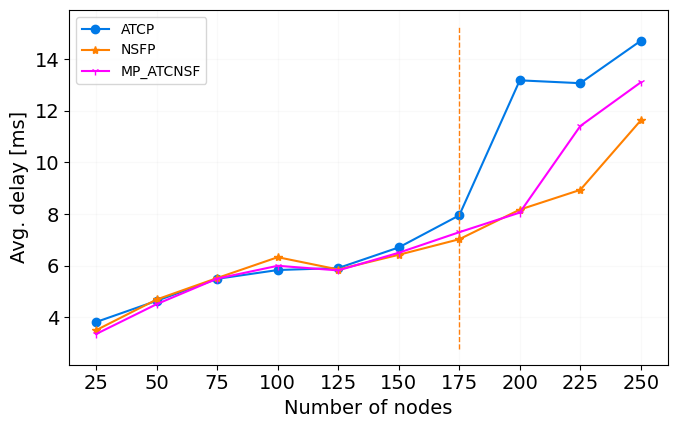

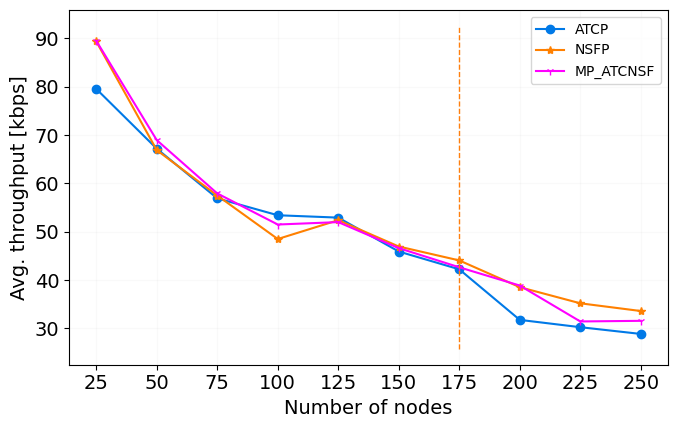

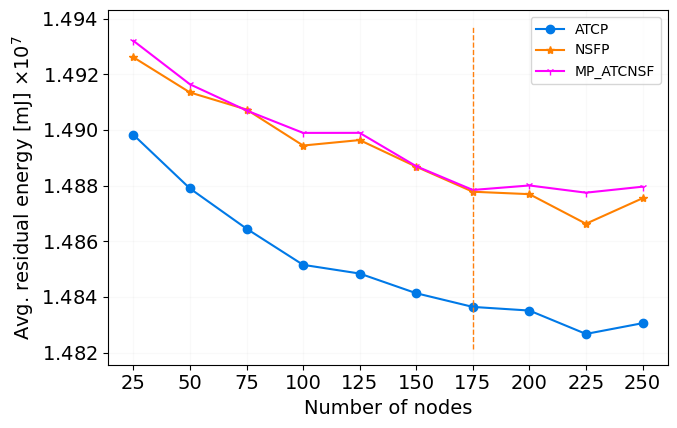

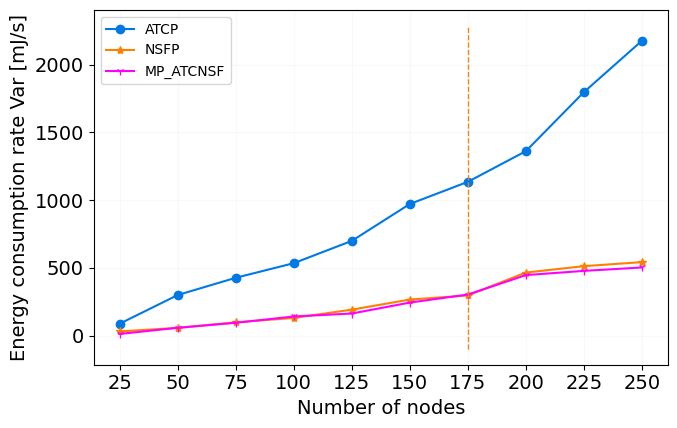

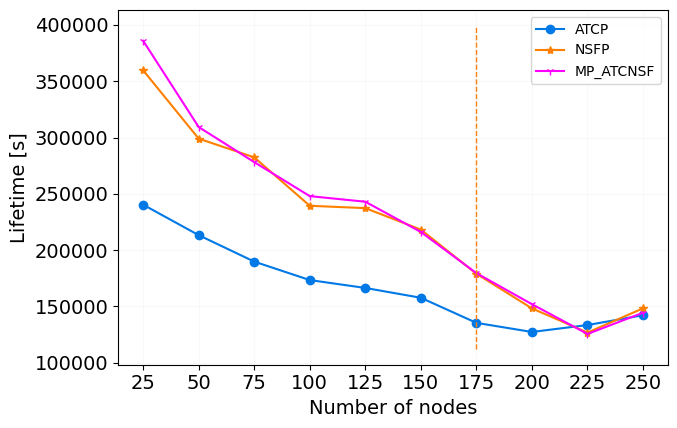

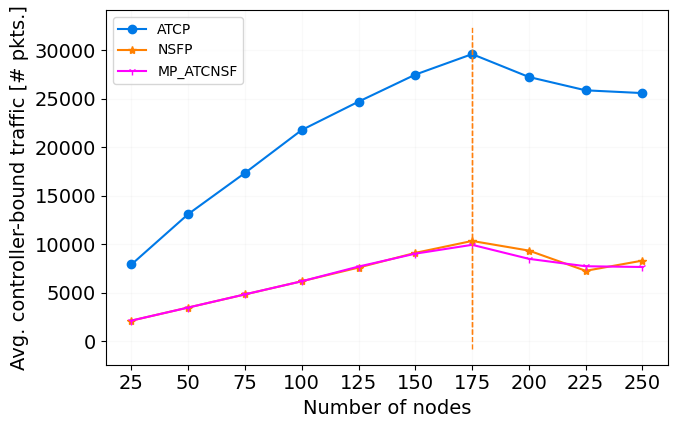

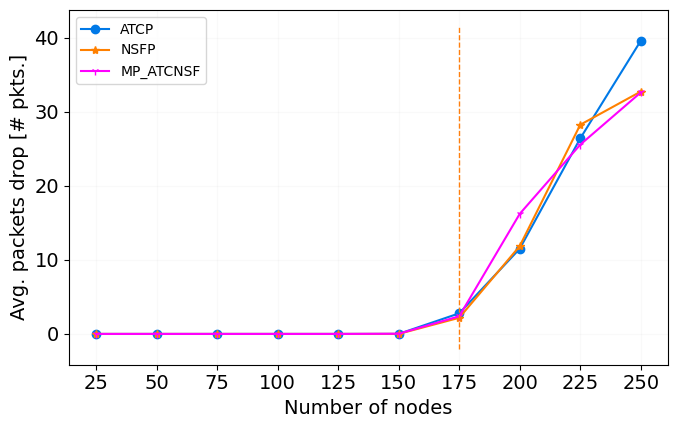

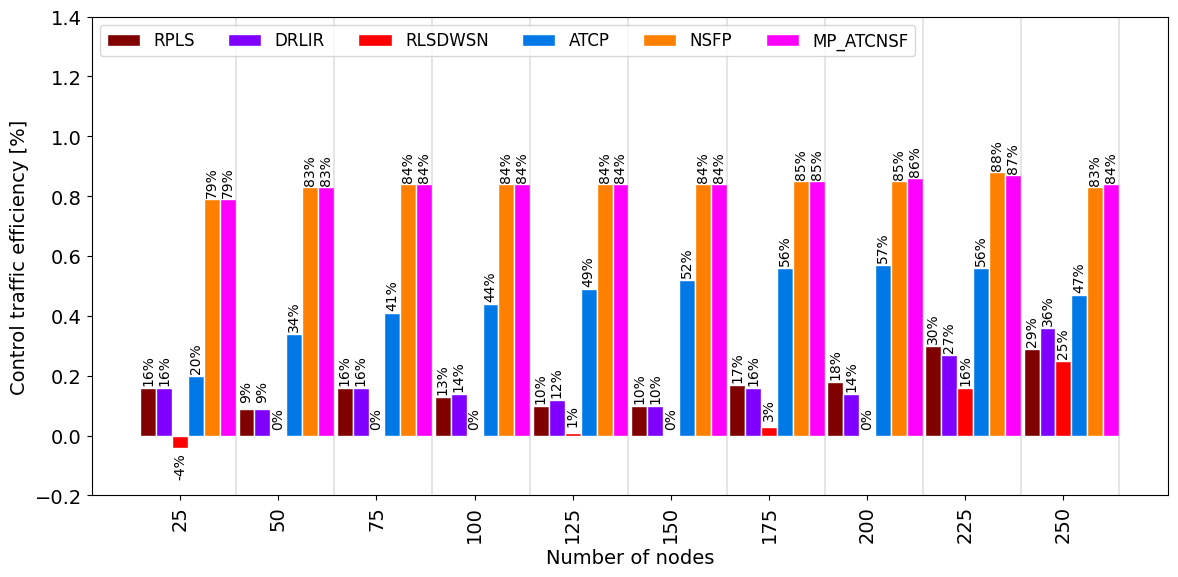

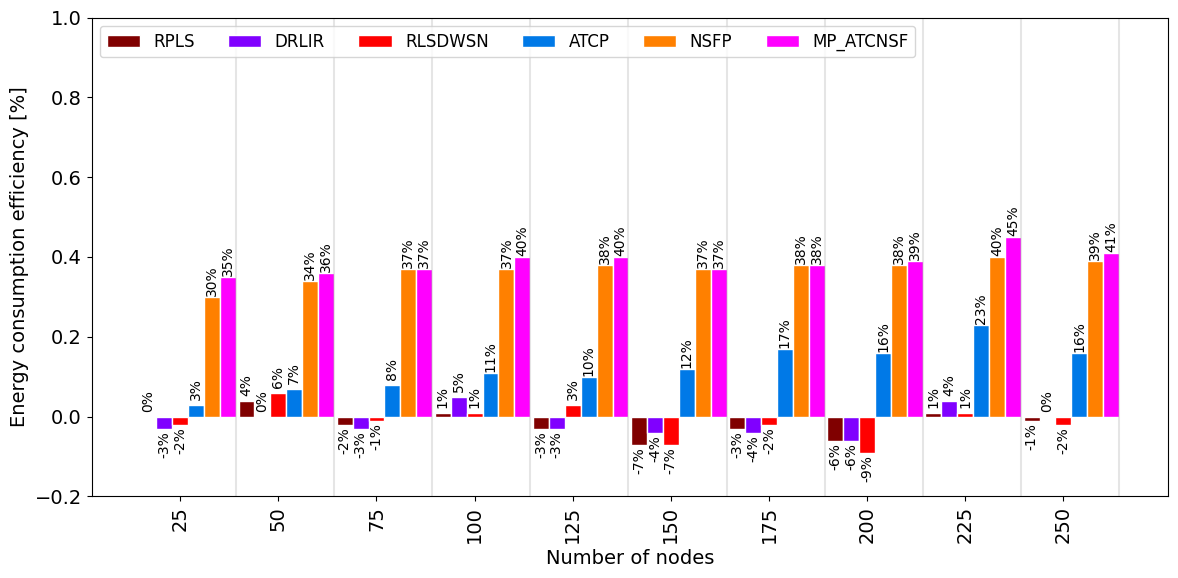

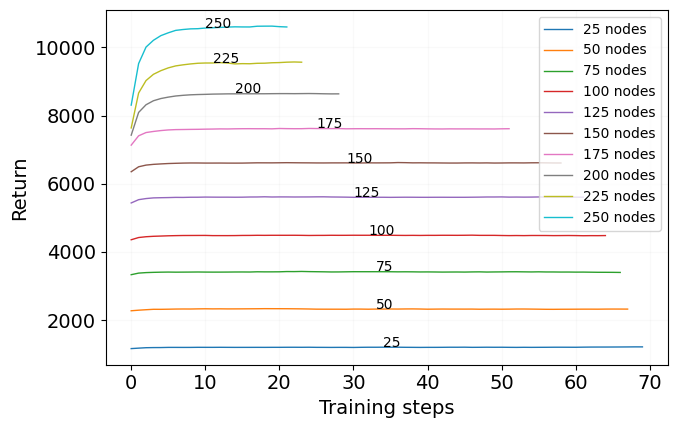

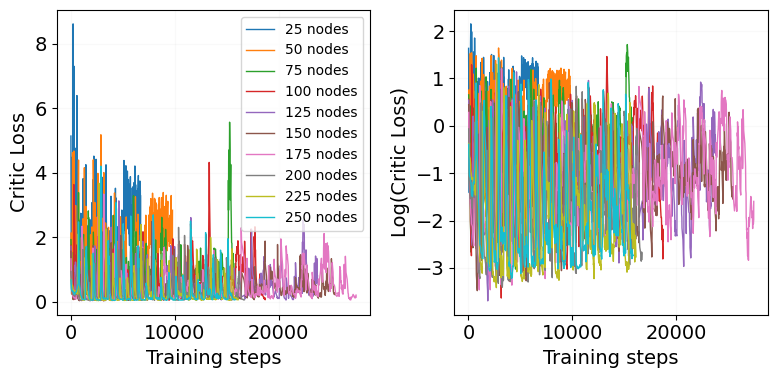

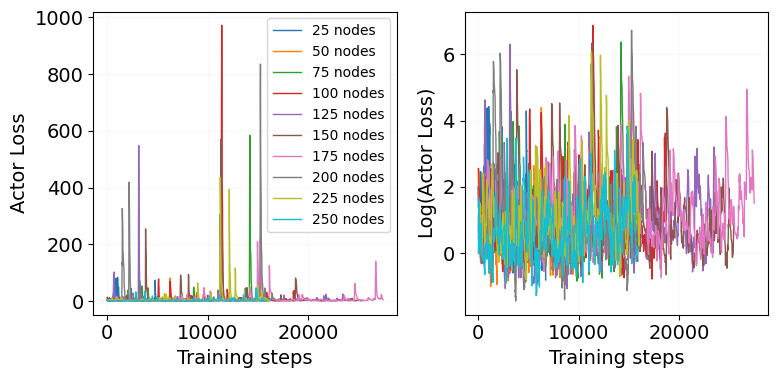

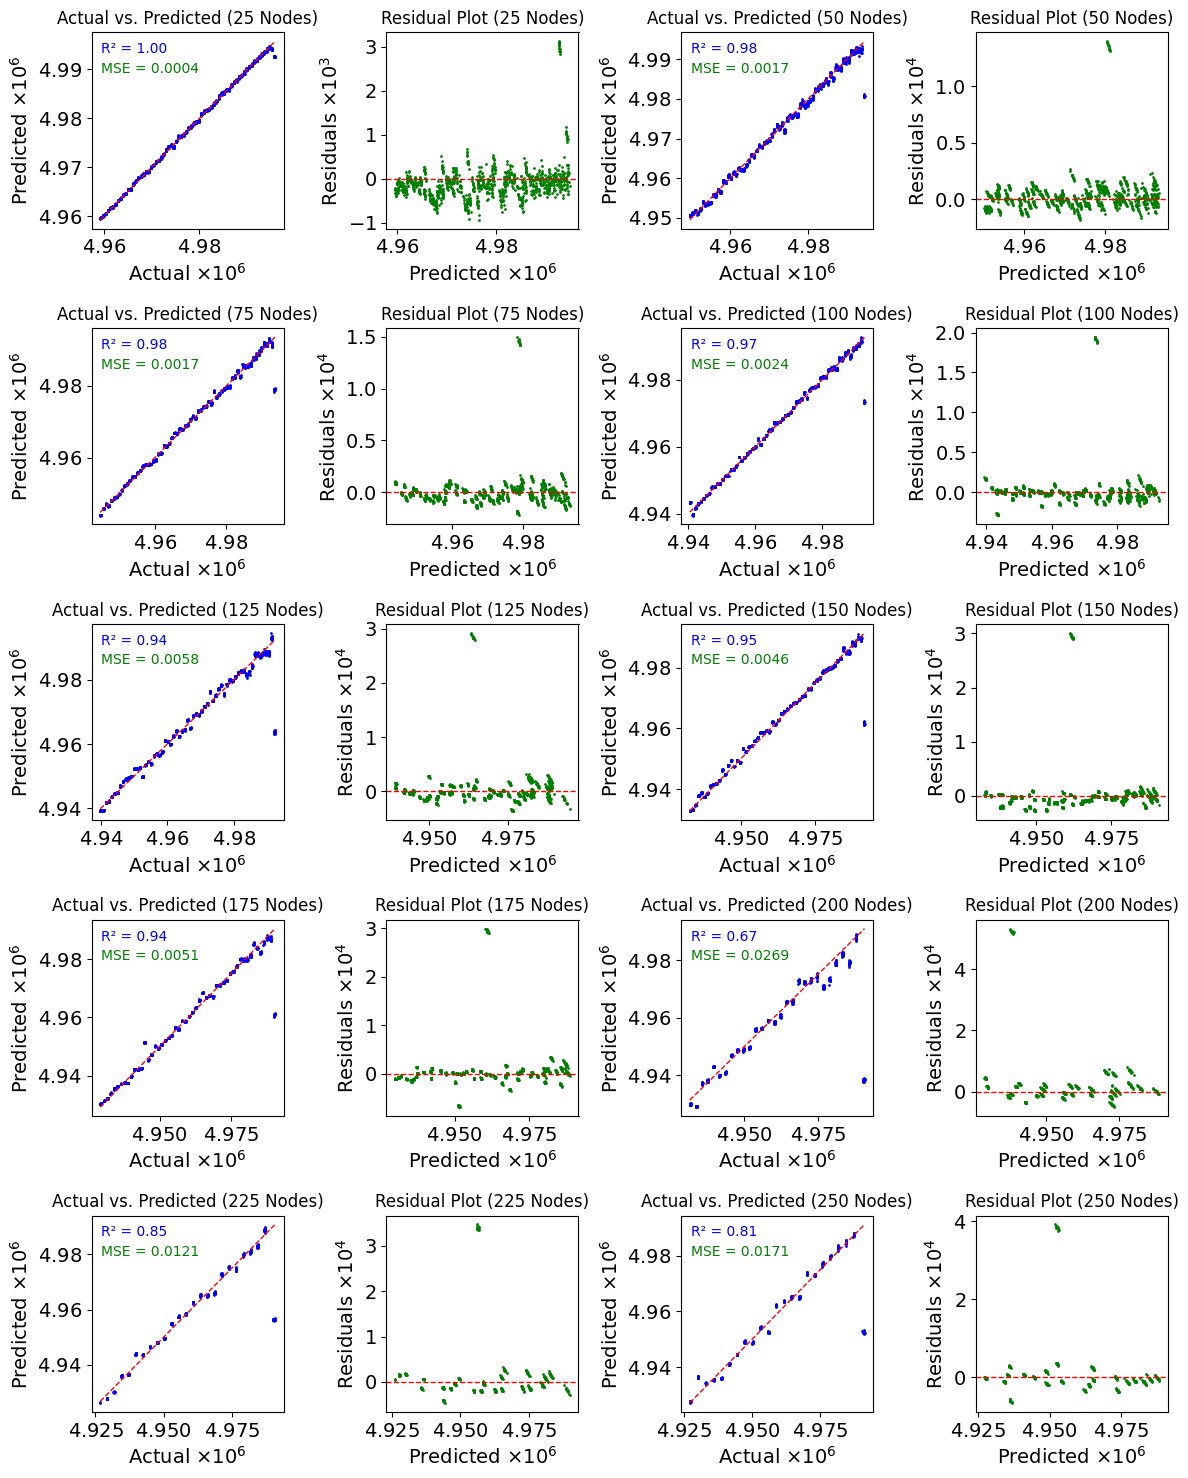

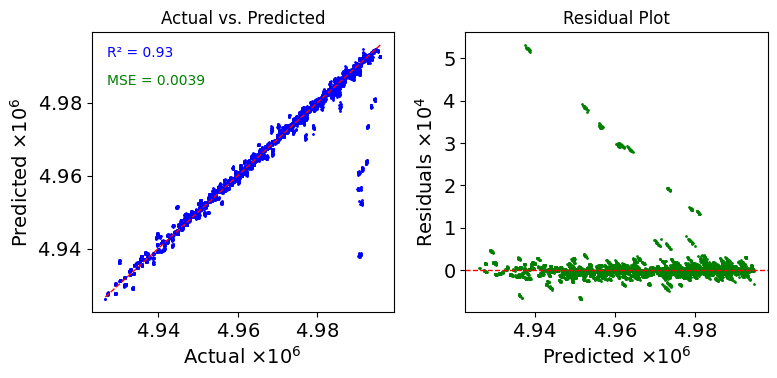

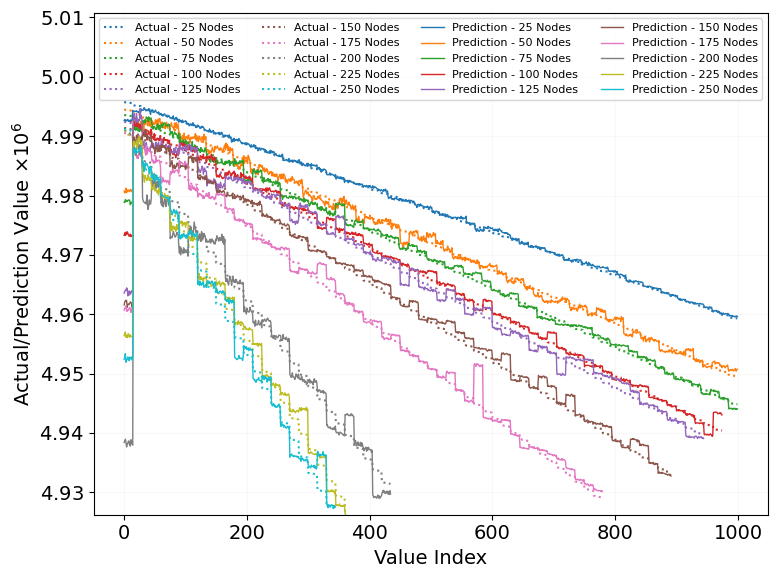

'\n#--------------MP_ATCNSF Mean Actual vs. Prediction------------------\nfig, ax = plt.subplots()\nnds = [int(nd) for nd in scenarios]\n\n# Calculate mean actual values for each scenario\nmean_actual = [np.mean(mp_atcnsf_actl_pred[\'actl\'][scenario]) for scenario in scenarios]\n\n# Calculate mean predicted values for each scenario\nmean_pred = [np.mean(mp_atcnsf_actl_pred[\'pred\'][scenario]) for scenario in scenarios]\n\n# Plot mean actual and predicted curves\nax.plot(nds, mean_actual, label=\'Mean Actual\', color=\'blue\')\nax.plot(nds, mean_pred, label=\'Mean Prediction\', linestyle=\'--\', color=\'red\')\n\nax.set_xlabel(\'Number of Nodes\')\n# Formatting\nformatter = mticker.ScalarFormatter(useMathText=True)\nformatter.set_powerlimits((-3, 2))\nax.yaxis.set_major_formatter(formatter)\nLabeloffset(ax, label="Mean Values", axis="y")\nax.grid(alpha=0.07)\n\n# Adjust legend\nax.legend(fontsize=\'10\')\n\n# Save or display the plot\nplt.tight_layout()\nplt.savefig("mp_atcnsf_renergy

In [41]:
#######RESULTS (MP_ATCNSF)##########
#--------------delay------------------
fig, ax = plt.subplots()
# ax.plot(data['scenarios'], data['delay_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
# ax.plot(data['scenarios'], data['delay_action_rpls'], label = "RPLS", marker="+", color = "#800000")
# ax.plot(data['scenarios'], data['delay_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
# ax.plot(data['scenarios'], data['delay_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['delay_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
ax.plot(data['scenarios'], data['delay_action_nsfp'], label = "NSFP", marker="*", color = "#ff8000")
ax.plot(data['scenarios'], data['delay_action_mp_atcnsf'], label = "MP_ATCNSF", marker="1", color = "#ff00ff")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Avg. delay [ms]')
# axset_title("Avg. Delay")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("mp_atcnsf_delay.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
# ax.plot(data['scenarios'], data['throughput_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
# ax.plot(data['scenarios'], data['throughput_action_rpls'], label = "RPLS", marker="+", color = "#800000")
# ax.plot(data['scenarios'], data['throughput_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
# ax.plot(data['scenarios'], data['throughput_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['throughput_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
ax.plot(data['scenarios'], data['throughput_action_nsfp'], label = "NSFP", marker="*", color = "#ff8000")
ax.plot(data['scenarios'], data['throughput_action_mp_atcnsf'], label = "MP_ATCNSF", marker="1", color = "#ff00ff")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Avg. throughput [kbps]')
# ax.set_title("(b) Avg. Throughput")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("mp_atcnsf_throughput.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
# ax.plot(data['scenarios'], data['renergy_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
# ax.plot(data['scenarios'], data['renergy_action_rpls'], label = "RPLS", marker="+", color = "#800000")
# ax.plot(data['scenarios'], data['renergy_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
# ax.plot(data['scenarios'], data['renergy_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['renergy_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
ax.plot(data['scenarios'], data['renergy_action_nsfp'], label = "NSFP", marker="*", color = "#ff8000")
ax.plot(data['scenarios'], data['renergy_action_mp_atcnsf'], label = "MP_ATCNSF", marker="1", color = "#ff00ff")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))
ax.yaxis.set_major_formatter(formatter)
lo = Labeloffset(ax, label="Avg. residual energy [mJ]", axis="y")
# ax.set_ylabel('Avg. Residual Energy [mJ]')
# ax.set_title("(c) Avg. Residual Energy")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("mp_atcnsf_renergy.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
# ax.plot(data['scenarios'], data['engconsvar_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
# ax.plot(data['scenarios'], data['engconsvar_action_rpls'], label = "RPLS", marker="+", color = "#800000")
# ax.plot(data['scenarios'], data['engconsvar_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
# ax.plot(data['scenarios'], data['engconsvar_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['engconsvar_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
ax.plot(data['scenarios'], data['engconsvar_action_nsfp'], label = "NSFP", marker="*", color = "#ff8000")
ax.plot(data['scenarios'], data['engconsvar_action_mp_atcnsf'], label = "MP_ATCNSF", marker="1", color = "#ff00ff")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Energy consumption rate Var [mJ/s]')
# ax.set_title("(d) Energy consumption Per Second Variance")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("mp_atcnsf_engcons_var.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
# ax.plot(data['scenarios'], data['lifetime_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
# ax.plot(data['scenarios'], data['lifetime_action_rpls'], label = "RPLS", marker="+", color = "#800000")
# ax.plot(data['scenarios'], data['lifetime_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
# ax.plot(data['scenarios'], data['lifetime_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['lifetime_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
ax.plot(data['scenarios'], data['lifetime_action_nsfp'], label = "NSFP", marker="*", color = "#ff8000")
ax.plot(data['scenarios'], data['lifetime_action_mp_atcnsf'], label = "MP_ATCNSF", marker="1", color = "#ff00ff")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Lifetime [s]')
# ax.set_title("(d) Energy consumption Per Second Variance")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("mp_atcnsf_lifetime.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
# ax.plot(data['scenarios'], data['txpacketin_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
# ax.plot(data['scenarios'], data['txpacketin_action_rpls'], label = "RPLS", marker="+", color = "#800000")
# ax.plot(data['scenarios'], data['txpacketin_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
# ax.plot(data['scenarios'], data['txpacketin_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['txpacketin_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
ax.plot(data['scenarios'], data['txpacketin_action_nsfp'], label = "NSFP", marker="*", color = "#ff8000")
ax.plot(data['scenarios'], data['txpacketin_action_mp_atcnsf'], label = "MP_ATCNSF", marker="1", color = "#ff00ff")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Avg. controller-bound traffic [# pkts.]')
# ax.set_title("(e) Avg. Controller Overhead")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("mp_atcnsf_txpacketin.eps", format="eps", dpi=600)

fig, ax = plt.subplots()
# ax.plot(data['scenarios'], data['drop_action_sdwise'], label = "SDWISE", marker="^", color = "#008000")
# ax.plot(data['scenarios'], data['drop_action_rpls'], label = "RPLS", marker="+", color = "#800000")
# ax.plot(data['scenarios'], data['drop_action_drlir'], label = "DRLIR", marker="s", color = "#8000ff")
# ax.plot(data['scenarios'], data['drop_action_rlsdwsn'], label = "RLSDWSN", marker=".", color = "#ff0000")
ax.plot(data['scenarios'], data['drop_action_atcp'], label = "ATCP", marker="o", color = "#0079E7")
ax.plot(data['scenarios'], data['drop_action_nsfp'], label = "NSFP", marker="*", color = "#ff8000")
ax.plot(data['scenarios'], data['drop_action_mp_atcnsf'], label = "MP_ATCNSF", marker="1", color = "#ff00ff")
# y min and max
ymin, ymax = ax.get_ylim()
ax.vlines(x=['175'], ymin=ymin, ymax=ymax, colors=['tab:orange', 'tab:blue'], ls='--', lw=1)
# ax.set_ylim(67,80)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Avg. packets drop [# pkts.]')
# ax.set_title("(f) Avg. Packets Drop")
ax.grid(alpha=0.07)
ax.legend(fontsize='10')
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("mp_atcnsf_drop.eps", format="eps", dpi=600)


ct = pd.concat([round(data['txpacketin_action_atcp'], 2), round(data['txpacketin_action_nsfp'], 2), round(data['txpacketin_action_mp_atcnsf'], 2), round(data['txpacketin_action_rpls'], 2), round(data['txpacketin_action_drlir'], 2), round(data['txpacketin_action_rlsdwsn'], 2), round(data['txpacketin_action_sdwise'], 2), round(BATT_LEVEL - data['renergy_action_atcp'], 2), round(BATT_LEVEL - data['renergy_action_nsfp'], 2), round(BATT_LEVEL - data['renergy_action_mp_atcnsf'], 2), round(BATT_LEVEL - data['renergy_action_rpls'], 2), round(BATT_LEVEL - data['renergy_action_drlir'], 2), round(BATT_LEVEL - data['renergy_action_rlsdwsn'], 2), round(BATT_LEVEL - data['renergy_action_sdwise'], 2)],
                axis=1, ignore_index=True).T
ct.columns = scenarios
ct.index = ['avg_ct_overhead_atcp', 'avg_ct_overhead_nsfp', 'avg_ct_overhead_mp_atcnsf', 'avg_ct_overhead_rpls', 'avg_ct_overhead_drlir', 'avg_ct_overhead_rlsdwsn', 'avg_ct_overhead_none', 'avg_engcons_atcp', 'avg_engcons_nsfp', 'avg_engcons_mp_atcnsf', 'avg_engcons_rpls', 'avg_engcons_drlir', 'avg_engcons_rlsdwsn', 'avg_engcons_none']
print(ct)
fig, ax = plt.subplots(figsize=(12, 6))
fig.tight_layout()
# Avg. = ct.mean(axis=1)
# ptx_overhead_enhancement = (Ptx_n - Ptx_n prime / Ptx_n prime)
dd1_1 = np.array([[round((ct.loc['avg_ct_overhead_none']['25'] - ct.loc['avg_ct_overhead_rpls']['25']) / ct.loc['avg_ct_overhead_none']['25'], 2),
                round((ct.loc['avg_ct_overhead_none']['50'] - ct.loc['avg_ct_overhead_rpls']['50']) / ct.loc['avg_ct_overhead_none']['50'], 2),
                round((ct.loc['avg_ct_overhead_none']['75'] - ct.loc['avg_ct_overhead_rpls']['75']) / ct.loc['avg_ct_overhead_none']['75'], 2),
                round((ct.loc['avg_ct_overhead_none']['100'] - ct.loc['avg_ct_overhead_rpls']['100']) / ct.loc['avg_ct_overhead_none']['100'], 2),
                round((ct.loc['avg_ct_overhead_none']['125'] - ct.loc['avg_ct_overhead_rpls']['125']) / ct.loc['avg_ct_overhead_none']['125'], 2),
                round((ct.loc['avg_ct_overhead_none']['150'] - ct.loc['avg_ct_overhead_rpls']['150']) / ct.loc['avg_ct_overhead_none']['150'], 2),
                round((ct.loc['avg_ct_overhead_none']['175'] - ct.loc['avg_ct_overhead_rpls']['175']) / ct.loc['avg_ct_overhead_none']['175'], 2),
                round((ct.loc['avg_ct_overhead_none']['200'] - ct.loc['avg_ct_overhead_rpls']['200']) / ct.loc['avg_ct_overhead_none']['200'], 2),
                round((ct.loc['avg_ct_overhead_none']['225'] - ct.loc['avg_ct_overhead_rpls']['225']) / ct.loc['avg_ct_overhead_none']['225'], 2),
                round((ct.loc['avg_ct_overhead_none']['250'] - ct.loc['avg_ct_overhead_rpls']['250']) / ct.loc['avg_ct_overhead_none']['250'], 2)]
               ], dtype=float)
control_overhead_1 = pd.DataFrame(dd1_1, columns=scenarios, index=['avg_ct_overhead_rpls_enhance'])
control_overhead_1 = control_overhead_1.T

dd1_2 = np.array([[round((ct.loc['avg_ct_overhead_none']['25'] - ct.loc['avg_ct_overhead_drlir']['25']) / ct.loc['avg_ct_overhead_none']['25'], 2),
                round((ct.loc['avg_ct_overhead_none']['50'] - ct.loc['avg_ct_overhead_drlir']['50']) / ct.loc['avg_ct_overhead_none']['50'], 2),
                round((ct.loc['avg_ct_overhead_none']['75'] - ct.loc['avg_ct_overhead_drlir']['75']) / ct.loc['avg_ct_overhead_none']['75'], 2),
                round((ct.loc['avg_ct_overhead_none']['100'] - ct.loc['avg_ct_overhead_drlir']['100']) / ct.loc['avg_ct_overhead_none']['100'], 2),
                round((ct.loc['avg_ct_overhead_none']['125'] - ct.loc['avg_ct_overhead_drlir']['125']) / ct.loc['avg_ct_overhead_none']['125'], 2),
                round((ct.loc['avg_ct_overhead_none']['150'] - ct.loc['avg_ct_overhead_drlir']['150']) / ct.loc['avg_ct_overhead_none']['150'], 2),
                round((ct.loc['avg_ct_overhead_none']['175'] - ct.loc['avg_ct_overhead_drlir']['175']) / ct.loc['avg_ct_overhead_none']['175'], 2),
                round((ct.loc['avg_ct_overhead_none']['200'] - ct.loc['avg_ct_overhead_drlir']['200']) / ct.loc['avg_ct_overhead_none']['200'], 2),
                round((ct.loc['avg_ct_overhead_none']['225'] - ct.loc['avg_ct_overhead_drlir']['225']) / ct.loc['avg_ct_overhead_none']['225'], 2),
                round((ct.loc['avg_ct_overhead_none']['250'] - ct.loc['avg_ct_overhead_drlir']['250']) / ct.loc['avg_ct_overhead_none']['250'], 2)]
               ], dtype=float)
control_overhead_2 = pd.DataFrame(dd1_2, columns=scenarios, index=['avg_ct_overhead_drlir_enhance'])
control_overhead_2 = control_overhead_2.T

dd1_3 = np.array([[round((ct.loc['avg_ct_overhead_none']['25'] - ct.loc['avg_ct_overhead_rlsdwsn']['25']) / ct.loc['avg_ct_overhead_none']['25'], 2),
                round((ct.loc['avg_ct_overhead_none']['50'] - ct.loc['avg_ct_overhead_rlsdwsn']['50']) / ct.loc['avg_ct_overhead_none']['50'], 2),
                round((ct.loc['avg_ct_overhead_none']['75'] - ct.loc['avg_ct_overhead_rlsdwsn']['75']) / ct.loc['avg_ct_overhead_none']['75'], 2),
                round((ct.loc['avg_ct_overhead_none']['100'] - ct.loc['avg_ct_overhead_rlsdwsn']['100']) / ct.loc['avg_ct_overhead_none']['100'], 2),
                round((ct.loc['avg_ct_overhead_none']['125'] - ct.loc['avg_ct_overhead_rlsdwsn']['125']) / ct.loc['avg_ct_overhead_none']['125'], 2),
                round((ct.loc['avg_ct_overhead_none']['150'] - ct.loc['avg_ct_overhead_rlsdwsn']['150']) / ct.loc['avg_ct_overhead_none']['150'], 2),
                round((ct.loc['avg_ct_overhead_none']['175'] - ct.loc['avg_ct_overhead_rlsdwsn']['175']) / ct.loc['avg_ct_overhead_none']['175'], 2),
                round((ct.loc['avg_ct_overhead_none']['200'] - ct.loc['avg_ct_overhead_rlsdwsn']['200']) / ct.loc['avg_ct_overhead_none']['200'], 2),
                round((ct.loc['avg_ct_overhead_none']['225'] - ct.loc['avg_ct_overhead_rlsdwsn']['225']) / ct.loc['avg_ct_overhead_none']['225'], 2),
                round((ct.loc['avg_ct_overhead_none']['250'] - ct.loc['avg_ct_overhead_rlsdwsn']['250']) / ct.loc['avg_ct_overhead_none']['250'], 2)]
               ], dtype=float)
control_overhead_3 = pd.DataFrame(dd1_3, columns=scenarios, index=['avg_ct_overhead_rlsdwsn_enhance'])
control_overhead_3 = control_overhead_3.T

dd1_4 = np.array([[round((ct.loc['avg_ct_overhead_none']['25'] - ct.loc['avg_ct_overhead_atcp']['25']) / ct.loc['avg_ct_overhead_none']['25'], 2),
                round((ct.loc['avg_ct_overhead_none']['50'] - ct.loc['avg_ct_overhead_atcp']['50']) / ct.loc['avg_ct_overhead_none']['50'], 2),
                round((ct.loc['avg_ct_overhead_none']['75'] - ct.loc['avg_ct_overhead_atcp']['75']) / ct.loc['avg_ct_overhead_none']['75'], 2),
                round((ct.loc['avg_ct_overhead_none']['100'] - ct.loc['avg_ct_overhead_atcp']['100']) / ct.loc['avg_ct_overhead_none']['100'], 2),
                round((ct.loc['avg_ct_overhead_none']['125'] - ct.loc['avg_ct_overhead_atcp']['125']) / ct.loc['avg_ct_overhead_none']['125'], 2),
                round((ct.loc['avg_ct_overhead_none']['150'] - ct.loc['avg_ct_overhead_atcp']['150']) / ct.loc['avg_ct_overhead_none']['150'], 2),
                round((ct.loc['avg_ct_overhead_none']['175'] - ct.loc['avg_ct_overhead_atcp']['175']) / ct.loc['avg_ct_overhead_none']['175'], 2),
                round((ct.loc['avg_ct_overhead_none']['200'] - ct.loc['avg_ct_overhead_atcp']['200']) / ct.loc['avg_ct_overhead_none']['200'], 2),
                round((ct.loc['avg_ct_overhead_none']['225'] - ct.loc['avg_ct_overhead_atcp']['225']) / ct.loc['avg_ct_overhead_none']['225'], 2),
                round((ct.loc['avg_ct_overhead_none']['250'] - ct.loc['avg_ct_overhead_atcp']['250']) / ct.loc['avg_ct_overhead_none']['250'], 2)]
               ], dtype=float)
control_overhead_4 = pd.DataFrame(dd1_4, columns=scenarios, index=['avg_ct_overhead_atcp_enhance'])
control_overhead_4 = control_overhead_4.T

dd1_5 = np.array([[round((ct.loc['avg_ct_overhead_none']['25'] - ct.loc['avg_ct_overhead_nsfp']['25']) / ct.loc['avg_ct_overhead_none']['25'], 2),
                round((ct.loc['avg_ct_overhead_none']['50'] - ct.loc['avg_ct_overhead_nsfp']['50']) / ct.loc['avg_ct_overhead_none']['50'], 2),
                round((ct.loc['avg_ct_overhead_none']['75'] - ct.loc['avg_ct_overhead_nsfp']['75']) / ct.loc['avg_ct_overhead_none']['75'], 2),
                round((ct.loc['avg_ct_overhead_none']['100'] - ct.loc['avg_ct_overhead_nsfp']['100']) / ct.loc['avg_ct_overhead_none']['100'], 2),
                round((ct.loc['avg_ct_overhead_none']['125'] - ct.loc['avg_ct_overhead_nsfp']['125']) / ct.loc['avg_ct_overhead_none']['125'], 2),
                round((ct.loc['avg_ct_overhead_none']['150'] - ct.loc['avg_ct_overhead_nsfp']['150']) / ct.loc['avg_ct_overhead_none']['150'], 2),
                round((ct.loc['avg_ct_overhead_none']['175'] - ct.loc['avg_ct_overhead_nsfp']['175']) / ct.loc['avg_ct_overhead_none']['175'], 2),
                round((ct.loc['avg_ct_overhead_none']['200'] - ct.loc['avg_ct_overhead_nsfp']['200']) / ct.loc['avg_ct_overhead_none']['200'], 2),
                round((ct.loc['avg_ct_overhead_none']['225'] - ct.loc['avg_ct_overhead_nsfp']['225']) / ct.loc['avg_ct_overhead_none']['225'], 2),
                round((ct.loc['avg_ct_overhead_none']['250'] - ct.loc['avg_ct_overhead_nsfp']['250']) / ct.loc['avg_ct_overhead_none']['250'], 2)]
               ], dtype=float)
control_overhead_5 = pd.DataFrame(dd1_5, columns=scenarios, index=['avg_ct_overhead_nsfp_enhance'])
control_overhead_5 = control_overhead_5.T

dd1_6 = np.array([[round((ct.loc['avg_ct_overhead_none']['25'] - ct.loc['avg_ct_overhead_mp_atcnsf']['25']) / ct.loc['avg_ct_overhead_none']['25'], 2),
                round((ct.loc['avg_ct_overhead_none']['50'] - ct.loc['avg_ct_overhead_mp_atcnsf']['50']) / ct.loc['avg_ct_overhead_none']['50'], 2),
                round((ct.loc['avg_ct_overhead_none']['75'] - ct.loc['avg_ct_overhead_mp_atcnsf']['75']) / ct.loc['avg_ct_overhead_none']['75'], 2),
                round((ct.loc['avg_ct_overhead_none']['100'] - ct.loc['avg_ct_overhead_mp_atcnsf']['100']) / ct.loc['avg_ct_overhead_none']['100'], 2),
                round((ct.loc['avg_ct_overhead_none']['125'] - ct.loc['avg_ct_overhead_mp_atcnsf']['125']) / ct.loc['avg_ct_overhead_none']['125'], 2),
                round((ct.loc['avg_ct_overhead_none']['150'] - ct.loc['avg_ct_overhead_mp_atcnsf']['150']) / ct.loc['avg_ct_overhead_none']['150'], 2),
                round((ct.loc['avg_ct_overhead_none']['175'] - ct.loc['avg_ct_overhead_mp_atcnsf']['175']) / ct.loc['avg_ct_overhead_none']['175'], 2),
                round((ct.loc['avg_ct_overhead_none']['200'] - ct.loc['avg_ct_overhead_mp_atcnsf']['200']) / ct.loc['avg_ct_overhead_none']['200'], 2),
                round((ct.loc['avg_ct_overhead_none']['225'] - ct.loc['avg_ct_overhead_mp_atcnsf']['225']) / ct.loc['avg_ct_overhead_none']['225'], 2),
                round((ct.loc['avg_ct_overhead_none']['250'] - ct.loc['avg_ct_overhead_mp_atcnsf']['250']) / ct.loc['avg_ct_overhead_none']['250'], 2)]
               ], dtype=float)
control_overhead_6 = pd.DataFrame(dd1_6, columns=scenarios, index=['avg_ct_overhead_mp_atcnsf_enhance'])
control_overhead_6 = control_overhead_6.T
# Add bars
width = 6
offset = 12  # Adjust the offset value as needed
xticks_values = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
x_new = [value + offset * i for i, value in enumerate(xticks_values)]
ax.bar(np.array(x_new) - 2*width, control_overhead_1["avg_ct_overhead_rpls_enhance"], width=width, color = '#800000', edgecolor='white', label="RPLS")
ax.bar(np.array(x_new) - width, control_overhead_2["avg_ct_overhead_drlir_enhance"], width=width, color = '#8000ff', edgecolor='white', label="DRLIR")
ax.bar(np.array(x_new) , control_overhead_3["avg_ct_overhead_rlsdwsn_enhance"], width=width, color = '#ff0000', edgecolor='white', label="RLSDWSN")
ax.bar(np.array(x_new) + width, control_overhead_4["avg_ct_overhead_atcp_enhance"], width=width, color = '#0079E7', edgecolor='white', label="ATCP")
ax.bar(np.array(x_new) + 2*width, control_overhead_5["avg_ct_overhead_nsfp_enhance"], width=width, color = '#ff8000', edgecolor='white', label="NSFP")
ax.bar(np.array(x_new) + 3*width, control_overhead_6["avg_ct_overhead_mp_atcnsf_enhance"], width=width, color = '#ff00ff', edgecolor='white', label="MP_ATCNSF")

# Add percentages as labels
i = 0
for idx in control_overhead_1.index:
    start = 0
    y = control_overhead_1.loc[idx, :]
    value = control_overhead_1.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i - 2*width,
        y=(start + y+0.06) if y.item() >= 0 else (start + y-0.06),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in control_overhead_2.index:
    start = 0
    y = control_overhead_2.loc[idx, :]
    value = control_overhead_2.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i - width,
        y=(start + y+0.06) if y.item() >= 0 else (start + y-0.06),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in control_overhead_3.index:
    start = 0
    y = control_overhead_3.loc[idx, :]
    value = control_overhead_3.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i,
        y=(start + y+0.06) if y.item() >= 0 else (start + y-0.06),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in control_overhead_4.index:
    start = 0
    y = control_overhead_4.loc[idx, :]
    value = control_overhead_4.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i + width,
        y=(start + y+0.06) if y.item() >= 0 else (start + y-0.06),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in control_overhead_5.index:
    start = 0
    y = control_overhead_5.loc[idx, :]
    value = control_overhead_5.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i + 2*width,
        y=(start + y+0.06) if y.item() >= 0 else (start + y-0.06),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in control_overhead_6.index:
    start = 0
    y = control_overhead_6.loc[idx, :]
    value = control_overhead_6.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i + 3*width,
        y=(start + y+0.06) if y.item() >= 0 else (start + y-0.06),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1

control_overhead = pd.concat([ct.loc['avg_ct_overhead_none'], ct.loc['avg_ct_overhead_rpls'], ct.loc['avg_ct_overhead_drlir'], ct.loc['avg_ct_overhead_rlsdwsn'], ct.loc['avg_ct_overhead_atcp'], ct.loc['avg_ct_overhead_nsfp'], ct.loc['avg_ct_overhead_mp_atcnsf'], control_overhead_1.iloc[:, 0], control_overhead_2.iloc[:, 0], control_overhead_3.iloc[:, 0], control_overhead_4.iloc[:, 0], control_overhead_5.iloc[:, 0], control_overhead_6.iloc[:, 0]], axis=1)
# Calculate mean and round the values
mean_row = control_overhead.mean().round(2)
# Append the mean row to the DataFrame
control_overhead.loc['mean'] = mean_row
control_overhead = control_overhead.T
# Set the columns and index of the DataFrame
control_overhead.index = ['SDWISE', 'RPLS', 'DRLIR', 'RLSDWSN', 'ATCP', 'NSFP', 'MP_ATCNSF', 'RPLS-enhance', 'DRLIR-enhance', 'RLSDWSN-enhance', 'ATCP-enhance', 'NSFP-enhance', 'MP_ATCNSF-enhance']
control_overhead.columns = ['Ptx_25', 'Ptx_50', 'Ptx_75', 'Ptx_100', 'Ptx_125', 'Ptx_150', 'Ptx_175', 'Ptx_200', 'Ptx_225', 'Ptx_250', 'mean']
print(control_overhead)

ax.tick_params(axis='x', labelrotation = 90)
plt.setp(ax, xticks=x_new, xticklabels=scenarios)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Control traffic efficiency [%]')
# ax.set_title("Avg. Control Traffic as Percentage of Enhancements for Different Node Scenarios")
ax.legend(fontsize="12", loc ="upper left", ncol=6)
ax.set_ylim(ymin=-0.2, ymax=1.4)
# ax.margins(None, 0.2)
# ax.grid(alpha=0.07)
i = 0
for idx in scenarios:
    ax.vlines(int(idx) + offset * i + 3*width + width/2, -0.2, 1.4, linestyles='solid', colors='gray', alpha=0.2)
    i += 1
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("mp_atcnsf_txpacketin_comparison.eps", format="eps", dpi=600)

fig, ax = plt.subplots(figsize=(12, 6))
fig.tight_layout()
# EC_n = E_0 - E_n
# EC_enhancement = (EC_n prime - EC_n / EC_n prime)
dd2_1 = np.array([[round((ct.loc['avg_engcons_none']['25'] - ct.loc['avg_engcons_rpls']['25']) / ct.loc['avg_engcons_none']['25'], 2),
                round((ct.loc['avg_engcons_none']['50'] - ct.loc['avg_engcons_rpls']['50']) / ct.loc['avg_engcons_none']['50'], 2),
                round((ct.loc['avg_engcons_none']['75'] - ct.loc['avg_engcons_rpls']['75']) / ct.loc['avg_engcons_none']['75'], 2),
                round((ct.loc['avg_engcons_none']['100'] - ct.loc['avg_engcons_rpls']['100']) / ct.loc['avg_engcons_none']['100'], 2),
                round((ct.loc['avg_engcons_none']['125'] - ct.loc['avg_engcons_rpls']['125']) / ct.loc['avg_engcons_none']['125'], 2),
                round((ct.loc['avg_engcons_none']['150'] - ct.loc['avg_engcons_rpls']['150']) / ct.loc['avg_engcons_none']['150'], 2),
                round((ct.loc['avg_engcons_none']['175'] - ct.loc['avg_engcons_rpls']['175']) / ct.loc['avg_engcons_none']['175'], 2),
                round((ct.loc['avg_engcons_none']['200'] - ct.loc['avg_engcons_rpls']['200']) / ct.loc['avg_engcons_none']['200'], 2),
                round((ct.loc['avg_engcons_none']['225'] - ct.loc['avg_engcons_rpls']['225']) / ct.loc['avg_engcons_none']['225'], 2),
                round((ct.loc['avg_engcons_none']['250'] - ct.loc['avg_engcons_rpls']['250']) / ct.loc['avg_engcons_none']['250'], 2)]
               ], dtype=float)
energy_consumption_1 = pd.DataFrame(dd2_1, columns=scenarios, index=['avg_engcons_rpls_enhance'])
energy_consumption_1 = energy_consumption_1.T

dd2_2 = np.array([[round((ct.loc['avg_engcons_none']['25'] - ct.loc['avg_engcons_drlir']['25']) / ct.loc['avg_engcons_none']['25'], 2),
                round((ct.loc['avg_engcons_none']['50'] - ct.loc['avg_engcons_drlir']['50']) / ct.loc['avg_engcons_none']['50'], 2),
                round((ct.loc['avg_engcons_none']['75'] - ct.loc['avg_engcons_drlir']['75']) / ct.loc['avg_engcons_none']['75'], 2),
                round((ct.loc['avg_engcons_none']['100'] - ct.loc['avg_engcons_drlir']['100']) / ct.loc['avg_engcons_none']['100'], 2),
                round((ct.loc['avg_engcons_none']['125'] - ct.loc['avg_engcons_drlir']['125']) / ct.loc['avg_engcons_none']['125'], 2),
                round((ct.loc['avg_engcons_none']['150'] - ct.loc['avg_engcons_drlir']['150']) / ct.loc['avg_engcons_none']['150'], 2),
                round((ct.loc['avg_engcons_none']['175'] - ct.loc['avg_engcons_drlir']['175']) / ct.loc['avg_engcons_none']['175'], 2),
                round((ct.loc['avg_engcons_none']['200'] - ct.loc['avg_engcons_drlir']['200']) / ct.loc['avg_engcons_none']['200'], 2),
                round((ct.loc['avg_engcons_none']['225'] - ct.loc['avg_engcons_drlir']['225']) / ct.loc['avg_engcons_none']['225'], 2),
                round((ct.loc['avg_engcons_none']['250'] - ct.loc['avg_engcons_drlir']['250']) / ct.loc['avg_engcons_none']['250'], 2)]
               ], dtype=float)
energy_consumption_2 = pd.DataFrame(dd2_2, columns=scenarios, index=['avg_engcons_drlir_enhance'])
energy_consumption_2 = energy_consumption_2.T

dd2_3 = np.array([[round((ct.loc['avg_engcons_none']['25'] - ct.loc['avg_engcons_rlsdwsn']['25']) / ct.loc['avg_engcons_none']['25'], 2),
                round((ct.loc['avg_engcons_none']['50'] - ct.loc['avg_engcons_rlsdwsn']['50']) / ct.loc['avg_engcons_none']['50'], 2),
                round((ct.loc['avg_engcons_none']['75'] - ct.loc['avg_engcons_rlsdwsn']['75']) / ct.loc['avg_engcons_none']['75'], 2),
                round((ct.loc['avg_engcons_none']['100'] - ct.loc['avg_engcons_rlsdwsn']['100']) / ct.loc['avg_engcons_none']['100'], 2),
                round((ct.loc['avg_engcons_none']['125'] - ct.loc['avg_engcons_rlsdwsn']['125']) / ct.loc['avg_engcons_none']['125'], 2),
                round((ct.loc['avg_engcons_none']['150'] - ct.loc['avg_engcons_rlsdwsn']['150']) / ct.loc['avg_engcons_none']['150'], 2),
                round((ct.loc['avg_engcons_none']['175'] - ct.loc['avg_engcons_rlsdwsn']['175']) / ct.loc['avg_engcons_none']['175'], 2),
                round((ct.loc['avg_engcons_none']['200'] - ct.loc['avg_engcons_rlsdwsn']['200']) / ct.loc['avg_engcons_none']['200'], 2),
                round((ct.loc['avg_engcons_none']['225'] - ct.loc['avg_engcons_rlsdwsn']['225']) / ct.loc['avg_engcons_none']['225'], 2),
                round((ct.loc['avg_engcons_none']['250'] - ct.loc['avg_engcons_rlsdwsn']['250']) / ct.loc['avg_engcons_none']['250'], 2)]
               ], dtype=float)
energy_consumption_3 = pd.DataFrame(dd2_3, columns=scenarios, index=['avg_engcons_rlsdwsn_enhance'])
energy_consumption_3 = energy_consumption_3.T

dd2_4 = np.array([[round((ct.loc['avg_engcons_none']['25'] - ct.loc['avg_engcons_atcp']['25']) / ct.loc['avg_engcons_none']['25'], 2),
                round((ct.loc['avg_engcons_none']['50'] - ct.loc['avg_engcons_atcp']['50']) / ct.loc['avg_engcons_none']['50'], 2),
                round((ct.loc['avg_engcons_none']['75'] - ct.loc['avg_engcons_atcp']['75']) / ct.loc['avg_engcons_none']['75'], 2),
                round((ct.loc['avg_engcons_none']['100'] - ct.loc['avg_engcons_atcp']['100']) / ct.loc['avg_engcons_none']['100'], 2),
                round((ct.loc['avg_engcons_none']['125'] - ct.loc['avg_engcons_atcp']['125']) / ct.loc['avg_engcons_none']['125'], 2),
                round((ct.loc['avg_engcons_none']['150'] - ct.loc['avg_engcons_atcp']['150']) / ct.loc['avg_engcons_none']['150'], 2),
                round((ct.loc['avg_engcons_none']['175'] - ct.loc['avg_engcons_atcp']['175']) / ct.loc['avg_engcons_none']['175'], 2),
                round((ct.loc['avg_engcons_none']['200'] - ct.loc['avg_engcons_atcp']['200']) / ct.loc['avg_engcons_none']['200'], 2),
                round((ct.loc['avg_engcons_none']['225'] - ct.loc['avg_engcons_atcp']['225']) / ct.loc['avg_engcons_none']['225'], 2),
                round((ct.loc['avg_engcons_none']['250'] - ct.loc['avg_engcons_atcp']['250']) / ct.loc['avg_engcons_none']['250'], 2)]
               ], dtype=float)
energy_consumption_4 = pd.DataFrame(dd2_4, columns=scenarios, index=['avg_engcons_atcp_enhance'])
energy_consumption_4 = energy_consumption_4.T

dd2_5 = np.array([[round((ct.loc['avg_engcons_none']['25'] - ct.loc['avg_engcons_nsfp']['25']) / ct.loc['avg_engcons_none']['25'], 2),
                round((ct.loc['avg_engcons_none']['50'] - ct.loc['avg_engcons_nsfp']['50']) / ct.loc['avg_engcons_none']['50'], 2),
                round((ct.loc['avg_engcons_none']['75'] - ct.loc['avg_engcons_nsfp']['75']) / ct.loc['avg_engcons_none']['75'], 2),
                round((ct.loc['avg_engcons_none']['100'] - ct.loc['avg_engcons_nsfp']['100']) / ct.loc['avg_engcons_none']['100'], 2),
                round((ct.loc['avg_engcons_none']['125'] - ct.loc['avg_engcons_nsfp']['125']) / ct.loc['avg_engcons_none']['125'], 2),
                round((ct.loc['avg_engcons_none']['150'] - ct.loc['avg_engcons_nsfp']['150']) / ct.loc['avg_engcons_none']['150'], 2),
                round((ct.loc['avg_engcons_none']['175'] - ct.loc['avg_engcons_nsfp']['175']) / ct.loc['avg_engcons_none']['175'], 2),
                round((ct.loc['avg_engcons_none']['200'] - ct.loc['avg_engcons_nsfp']['200']) / ct.loc['avg_engcons_none']['200'], 2),
                round((ct.loc['avg_engcons_none']['225'] - ct.loc['avg_engcons_nsfp']['225']) / ct.loc['avg_engcons_none']['225'], 2),
                round((ct.loc['avg_engcons_none']['250'] - ct.loc['avg_engcons_nsfp']['250']) / ct.loc['avg_engcons_none']['250'], 2)]
               ], dtype=float)
energy_consumption_5 = pd.DataFrame(dd2_5, columns=scenarios, index=['avg_engcons_nsfp_enhance'])
energy_consumption_5 = energy_consumption_5.T

dd2_6 = np.array([[round((ct.loc['avg_engcons_none']['25'] - ct.loc['avg_engcons_mp_atcnsf']['25']) / ct.loc['avg_engcons_none']['25'], 2),
                round((ct.loc['avg_engcons_none']['50'] - ct.loc['avg_engcons_mp_atcnsf']['50']) / ct.loc['avg_engcons_none']['50'], 2),
                round((ct.loc['avg_engcons_none']['75'] - ct.loc['avg_engcons_mp_atcnsf']['75']) / ct.loc['avg_engcons_none']['75'], 2),
                round((ct.loc['avg_engcons_none']['100'] - ct.loc['avg_engcons_mp_atcnsf']['100']) / ct.loc['avg_engcons_none']['100'], 2),
                round((ct.loc['avg_engcons_none']['125'] - ct.loc['avg_engcons_mp_atcnsf']['125']) / ct.loc['avg_engcons_none']['125'], 2),
                round((ct.loc['avg_engcons_none']['150'] - ct.loc['avg_engcons_mp_atcnsf']['150']) / ct.loc['avg_engcons_none']['150'], 2),
                round((ct.loc['avg_engcons_none']['175'] - ct.loc['avg_engcons_mp_atcnsf']['175']) / ct.loc['avg_engcons_none']['175'], 2),
                round((ct.loc['avg_engcons_none']['200'] - ct.loc['avg_engcons_mp_atcnsf']['200']) / ct.loc['avg_engcons_none']['200'], 2),
                round((ct.loc['avg_engcons_none']['225'] - ct.loc['avg_engcons_mp_atcnsf']['225']) / ct.loc['avg_engcons_none']['225'], 2),
                round((ct.loc['avg_engcons_none']['250'] - ct.loc['avg_engcons_mp_atcnsf']['250']) / ct.loc['avg_engcons_none']['250'], 2)]
               ], dtype=float)
energy_consumption_6 = pd.DataFrame(dd2_6, columns=scenarios, index=['avg_engcons_mp_atcnsf_enhance'])
energy_consumption_6 = energy_consumption_6.T
# Add bars
width = 6
offset = 12  # Adjust the offset value as needed
xticks_values = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
x_new = [value + offset * i for i, value in enumerate(xticks_values)]
ax.bar(np.array(x_new) - 2*width, energy_consumption_1["avg_engcons_rpls_enhance"], width=width, color = '#800000', edgecolor='white', label="RPLS")
ax.bar(np.array(x_new) - width, energy_consumption_2["avg_engcons_drlir_enhance"], width=width, color = '#8000ff', edgecolor='white', label="DRLIR")
ax.bar(np.array(x_new) , energy_consumption_3["avg_engcons_rlsdwsn_enhance"], width=width, color = '#ff0000', edgecolor='white', label="RLSDWSN")
ax.bar(np.array(x_new) + width, energy_consumption_4["avg_engcons_atcp_enhance"], width=width, color = '#0079E7', edgecolor='white', label="ATCP")
ax.bar(np.array(x_new) + 2*width, energy_consumption_5["avg_engcons_nsfp_enhance"], width=width, color = '#ff8000', edgecolor='white', label="NSFP")
ax.bar(np.array(x_new) + 3*width, energy_consumption_6["avg_engcons_mp_atcnsf_enhance"], width=width, color = '#ff00ff', edgecolor='white', label="MP_ATCNSF")

# Add percentages as labels
i = 0
for idx in energy_consumption_1.index:
    start = 0
    y = energy_consumption_1.loc[idx, :]
    value = energy_consumption_1.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i - 2*width,
        y=(start + y+0.04) if y.item() >= 0 else (start + y-0.04),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in energy_consumption_2.index:
    start = 0
    y = energy_consumption_2.loc[idx, :]
    value = energy_consumption_2.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i - width,
        y=(start + y+0.04) if y.item() >= 0 else (start + y-0.04),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in energy_consumption_3.index:
    start = 0
    y = energy_consumption_3.loc[idx, :]
    value = energy_consumption_3.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i,
        y=(start + y+0.04) if y.item() >= 0 else (start + y-0.04),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in energy_consumption_4.index:
    start = 0
    y = energy_consumption_4.loc[idx, :]
    value = energy_consumption_4.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i + width,
        y=(start + y+0.04) if y.item() >= 0 else (start + y-0.04),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in energy_consumption_5.index:
    start = 0
    y = energy_consumption_5.loc[idx, :]
    value = energy_consumption_5.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i + 2*width,
        y=(start + y+0.04) if y.item() >= 0 else (start + y-0.04),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1
i = 0
for idx in energy_consumption_6.index:
    start = 0
    y = energy_consumption_6.loc[idx, :]
    value = energy_consumption_6.loc[idx, :]
    ax.text(
        x=int(idx) + offset * i + 3*width,
        y=(start + y+0.04) if y.item() >= 0 else (start + y-0.04),
        s=f"{int(round(100 * value, 0))}%",
        va = 'center', ha = 'center', rotation = 90, fontsize = 10,
        color="black"
    )
    start += y
    i += 1

energy_consumption = pd.concat([ct.loc['avg_engcons_none'], ct.loc['avg_engcons_rpls'], ct.loc['avg_engcons_drlir'], ct.loc['avg_engcons_rlsdwsn'], ct.loc['avg_engcons_atcp'], ct.loc['avg_engcons_nsfp'], ct.loc['avg_engcons_mp_atcnsf'], energy_consumption_1.iloc[:, 0], energy_consumption_2.iloc[:, 0], energy_consumption_3.iloc[:, 0], energy_consumption_4.iloc[:, 0], energy_consumption_5.iloc[:, 0], energy_consumption_6.iloc[:, 0]], axis=1)
# Calculate mean and round the values
mean_row = energy_consumption.mean().round(2)
# Append the mean row to the DataFrame
energy_consumption.loc['mean'] = mean_row
energy_consumption = energy_consumption.T
# Set the columns and index of the DataFrame
energy_consumption.index = ['SDWISE', 'RPLS', 'DRLIR', 'RLSDWSN', 'ATCP', 'NSFP', 'MP_ATCNSF', 'RPLS-enhance', 'DRLIR-enhance', 'RLSDWSN-enhance', 'ATCP-enhance', 'NSFP-enhance', 'MP_ATCNSF-enhance']
energy_consumption.columns = ['E_25', 'E_50', 'E_75', 'E_100', 'E_125', 'E_150', 'E_175', 'E_200', 'E_225', 'E_250', 'mean']
print(energy_consumption)

ax.tick_params(axis='x', labelrotation = 90)
plt.setp(ax, xticks=x_new, xticklabels=scenarios)
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Energy consumption efficiency [%]')
# ax.set_title("Avg. Energy Consumption as Percentage of Enhancements for Different Node Scenarios")
ax.legend(fontsize="12", loc ="upper left", ncol=6)
ax.set_ylim(ymin=-0.2, ymax=1)
# ax.margins(None, 0.2)
# ax.grid(alpha=0.07)
i = 0
for idx in scenarios:
    ax.vlines(int(idx) + offset * i + 3*width + width/2, -0.2, 1.4, linestyles='solid', colors='gray', alpha=0.2)
    i += 1
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("mp_atcnsf_renergy_comparison.eps", format="eps", dpi=600)

#######RESULTS (2)##########

#--------------return------------------
fig, ax = plt.subplots()
return_data_list = [
    mp_atcnsf_action_25_return,
    mp_atcnsf_action_50_return,
    mp_atcnsf_action_75_return,
    mp_atcnsf_action_100_return,
    mp_atcnsf_action_125_return,
    mp_atcnsf_action_150_return,
    mp_atcnsf_action_175_return,
    mp_atcnsf_action_200_return,
    mp_atcnsf_action_225_return,
    mp_atcnsf_action_250_return
]
# Plot smoothed return curves for each scenario
for scenario, return_data in zip(scenarios, return_data_list):
    # Smooth the return values using exponential moving Avg.
    smoothed_return = return_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax.plot(return_data["Step"], smoothed_return, label=f"{scenario} nodes", linewidth=1)
    ax.annotate(f"{scenario}", (return_data["Step"].iloc[int(return_data["Step"].max()/2)], smoothed_return.iloc[int(return_data["Step"].max()/2)]+10), fontsize=10)

# Set logarithmic scale for y-axis
# ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Training steps')
ax.set_ylabel('Return')
ax.grid(alpha=0.07)
ax.legend(fontsize='10')

plt.tight_layout()
plt.savefig("mp_atcnsf_return.eps", format="eps", dpi=600)
plt.show()

'''
fig, ax = plt.subplots()
return_data_list = [
    rpls_action_25_return,
    rpls_action_50_return,
    rpls_action_75_return,
    rpls_action_100_return,
    rpls_action_125_return,
    rpls_action_150_return,
    rpls_action_175_return,
    rpls_action_200_return,
    rpls_action_225_return,
    rpls_action_250_return
]
# Plot smoothed return curves for each scenario
for scenario, return_data in zip(scenarios, return_data_list):
    # Smooth the return values using exponential moving Avg.
    smoothed_return = return_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax.plot(return_data["Step"], smoothed_return, label=f"{scenario} nodes", linewidth=1)

# Set logarithmic scale for y-axis
# ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Training steps')
ax.set_ylabel('Return')
ax.grid(alpha=0.07)
ax.legend(fontsize='10')

plt.tight_layout()
plt.savefig("rpls_return.eps", format="eps", dpi=600)
plt.show()

fig, ax = plt.subplots()
return_data_list = [
    drlir_action_25_return,
    drlir_action_50_return,
    drlir_action_75_return,
    drlir_action_100_return,
    drlir_action_125_return,
    drlir_action_150_return,
    drlir_action_175_return,
    drlir_action_200_return,
    drlir_action_225_return,
    drlir_action_250_return
]
# Plot smoothed return curves for each scenario
for scenario, return_data in zip(scenarios, return_data_list):
    # Smooth the return values using exponential moving Avg.
    smoothed_return = return_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax.plot(return_data["Step"], smoothed_return, label=f"{scenario} nodes", linewidth=1)

# Set logarithmic scale for y-axis
# ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Training steps')
ax.set_ylabel('Return')
ax.grid(alpha=0.07)
ax.legend(fontsize='10')

plt.tight_layout()
plt.savefig("drlir_return.eps", format="eps", dpi=600)
plt.show()

fig, ax = plt.subplots()
return_data_list = [
    rlsdwsn_action_25_return,
    rlsdwsn_action_50_return,
    rlsdwsn_action_75_return,
    rlsdwsn_action_100_return,
    rlsdwsn_action_125_return,
    rlsdwsn_action_150_return,
    rlsdwsn_action_175_return,
    rlsdwsn_action_200_return,
    rlsdwsn_action_225_return,
    rlsdwsn_action_250_return
]
# Plot smoothed return curves for each scenario
for scenario, return_data in zip(scenarios, return_data_list):
    # Smooth the return values using exponential moving Avg.
    smoothed_return = return_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax.plot(return_data["Step"], smoothed_return, label=f"{scenario} nodes", linewidth=1)

# Set logarithmic scale for y-axis
# ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Training steps')
ax.set_ylabel('Return')
ax.grid(alpha=0.07)
ax.legend(fontsize='10')

plt.tight_layout()
plt.savefig("rlsdwsn_return.eps", format="eps", dpi=600)
plt.show()
'''
#--------------critic loss------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
loss_data_list = [
    mp_atcnsf_action_25_valueloss,
    mp_atcnsf_action_50_valueloss,
    mp_atcnsf_action_75_valueloss,
    mp_atcnsf_action_100_valueloss,
    mp_atcnsf_action_125_valueloss,
    mp_atcnsf_action_150_valueloss,
    mp_atcnsf_action_175_valueloss,
    mp_atcnsf_action_200_valueloss,
    mp_atcnsf_action_225_valueloss,
    mp_atcnsf_action_250_valueloss
]
# Original Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax1.plot(loss_data["Step"], smoothed_valueloss, label=f"{scenario} nodes", linewidth=1)

ax1.set_xlabel('Training steps')
ax1.set_ylabel('Critic Loss')
ax1.grid(alpha=0.07)
ax1.legend(fontsize='10')

# Log Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax2.plot(loss_data["Step"], np.log(smoothed_valueloss), label=f"{scenario} nodes", linewidth=1)

ax2.set_xlabel('Training steps')
ax2.set_ylabel('Log(Critic Loss)')
ax2.grid(alpha=0.07)
# ax2.legend(fontsize='10')

plt.tight_layout()
plt.savefig("mp_atcnsf_critic_loss.eps", format="eps", dpi=600)
plt.show()
#--------------actor loss------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
loss_data_list = [
    mp_atcnsf_action_25_policyloss,
    mp_atcnsf_action_50_policyloss,
    mp_atcnsf_action_75_policyloss,
    mp_atcnsf_action_100_policyloss,
    mp_atcnsf_action_125_policyloss,
    mp_atcnsf_action_150_policyloss,
    mp_atcnsf_action_175_policyloss,
    mp_atcnsf_action_200_policyloss,
    mp_atcnsf_action_225_policyloss,
    mp_atcnsf_action_250_policyloss
]
# Original Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax1.plot(loss_data["Step"], smoothed_valueloss, label=f"{scenario} nodes", linewidth=1)

ax1.set_xlabel('Training steps')
ax1.set_ylabel('Actor Loss')
ax1.grid(alpha=0.07)
ax1.legend(fontsize='10')

# Log Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax2.plot(loss_data["Step"], np.log(smoothed_valueloss), label=f"{scenario} nodes", linewidth=1)

ax2.set_xlabel('Training steps')
ax2.set_ylabel('Log(Actor Loss)')
ax2.grid(alpha=0.07)
# ax2.legend(fontsize='10')

plt.tight_layout()
plt.savefig("mp_atcnsf_actor_loss.eps", format="eps", dpi=600)
plt.show()

'''
#--------------RPLS/DRLiR/RLSDWSN loss------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
loss_data_list = [
    rpls_action_25_loss,
    rpls_action_50_loss,
    rpls_action_75_loss,
    rpls_action_100_loss,
    rpls_action_125_loss,
    rpls_action_150_loss,
    rpls_action_175_loss,
    rpls_action_200_loss,
    rpls_action_225_loss,
    rpls_action_250_loss
]
# Original Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    # normalized_loss = (smoothed_valueloss - smoothed_valueloss.min()) / (smoothed_valueloss.max() - smoothed_valueloss.min())
    ax1.plot(loss_data["Step"], smoothed_valueloss, label=f"{scenario} nodes", linewidth=1)

ax1.set_xlabel('Training steps')
# formatter = mticker.ScalarFormatter(useMathText=True)
# formatter.set_powerlimits((-3,2))
# ax1.yaxis.set_major_formatter(formatter)
# Labeloffset(ax1, label="Loss", axis="y")
# ax1.set_ylim(0, 0.005)
ax1.set_ylabel('Loss')
ax1.grid(alpha=0.07)
ax1.legend(fontsize='10')

# Log Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax2.plot(loss_data["Step"], np.log(smoothed_valueloss), label=f"{scenario} nodes", linewidth=1)

ax2.set_xlabel('Training steps')
ax2.set_ylabel('Log(Loss)')
ax2.grid(alpha=0.07)
# ax2.legend(fontsize='10')

plt.tight_layout()
plt.savefig("rpls_actor_loss.eps", format="eps", dpi=600)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
loss_data_list = [
    drlir_action_25_loss,
    drlir_action_50_loss,
    drlir_action_75_loss,
    drlir_action_100_loss,
    drlir_action_125_loss,
    drlir_action_150_loss,
    drlir_action_175_loss,
    drlir_action_200_loss,
    drlir_action_225_loss,
    drlir_action_250_loss
]
# Original Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax1.plot(loss_data["Step"], smoothed_valueloss, label=f"{scenario} nodes", linewidth=1)

ax1.set_xlabel('Training steps')
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))
ax1.yaxis.set_major_formatter(formatter)
Labeloffset(ax1, label="Loss", axis="y")
# ax1.set_ylabel('Loss')
ax1.grid(alpha=0.07)
ax1.legend(fontsize='10')

# Log Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax2.plot(loss_data["Step"], np.log(smoothed_valueloss), label=f"{scenario} nodes", linewidth=1)

ax2.set_xlabel('Training steps')
ax2.set_ylabel('Log(Loss)')
ax2.grid(alpha=0.07)
# ax2.legend(fontsize='10')

plt.tight_layout()
plt.savefig("drlir_actor_loss.eps", format="eps", dpi=600)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
loss_data_list = [
    rlsdwsn_action_25_loss,
    rlsdwsn_action_50_loss,
    rlsdwsn_action_75_loss,
    rlsdwsn_action_100_loss,
    rlsdwsn_action_125_loss,
    rlsdwsn_action_150_loss,
    rlsdwsn_action_175_loss,
    rlsdwsn_action_200_loss,
    rlsdwsn_action_225_loss,
    rlsdwsn_action_250_loss
]
# Original Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax1.plot(loss_data["Step"], smoothed_valueloss, label=f"{scenario} nodes", linewidth=1)

ax1.set_xlabel('Training steps')
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))
ax1.yaxis.set_major_formatter(formatter)
Labeloffset(ax1, label="Loss", axis="y")
# ax1.set_ylabel('Loss')
ax1.grid(alpha=0.07)
ax1.legend(fontsize='10')

# Log Loss subplot
for scenario, loss_data in zip(scenarios, loss_data_list):
    smoothed_valueloss = loss_data["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean()
    ax2.plot(loss_data["Step"], np.log(smoothed_valueloss), label=f"{scenario} nodes", linewidth=1)

ax2.set_xlabel('Training steps')
ax2.set_ylabel('Log(Loss)')
ax2.grid(alpha=0.07)
# ax2.legend(fontsize='10')

plt.tight_layout()
plt.savefig("rlsdwsn_actor_loss.eps", format="eps", dpi=600)
plt.show()
'''
#--------------MP_ATCNSF Actual vs. Prediction----------------------
# MSE (Mean Squared Error) and R-squared are both commonly used metrics for evaluating regression models, but they capture different aspects of model performance and have their own strengths and weaknesses:

# Mean Squared Error (MSE):

#     Pros:
#         Provides a measure of the Avg. squared difference between the actual and predicted values.
#         Penalizes larger errors more heavily than smaller errors, making it sensitive to outliers.
#         Easy to interpret and understand.
#     Cons:
#         The MSE is sensitive to the scale of the data. When the target variable has large values, the squared errors can become very large, leading to inflated MSE values.
#         Not normalized, meaning that its value is highly dependent on the scale of the target variable. Comparing MSE values across different datasets with different scales may not be meaningful.
#         Outliers can heavily influence the MSE, potentially skewing its interpretation.

# R-squared (Coefficient of Determination):

#     Pros:
#         Represents the proportion of variance in the dependent variable (target variable) that is explained by the independent variables (features) in the regression model.
#         Scaled between 0 and 1, making it easier to compare across different models and datasets.
#         Provides an intuitive interpretation of the model's goodness of fit.
#     Cons:
#         R-squared can be misleading when used in isolation, as it does not indicate the magnitude of the errors or whether the model is biased.
#         Does not directly account for the scale of the data or the presence of outliers.
#         R-squared can be artificially inflated when adding more predictors to the model, even if those predictors are not truly associated with the target variable (overfitting).

    # Scatter plot of actual vs. predicted values: This plot helps visualize how well the model's predictions align with the actual values. Ideally, the points should fall close to the diagonal line (y = x).
    # Residual plot: This plot shows the residuals (the differences between actual and predicted values) against the predicted values. It helps to check for any patterns or heteroscedasticity in the residuals.

# Interpreting a residual plot for a regression prediction model involves examining the distribution and patterns of the residuals (the differences between the actual and predicted values) against the predicted values. Here are some key points to consider when interpreting a residual plot:

#     Randomness of Residuals:
#         Ideally, the residuals should be randomly scattered around the horizontal axis (predicted values) with no discernible pattern. A lack of pattern suggests that the model's predictions are unbiased and that the model captures the underlying relationship between the features and the target variable effectively.

#     Homoscedasticity vs. Heteroscedasticity:
#         Homoscedasticity refers to the constant variance of residuals across different levels of the predicted values. In other words, the spread of residuals should remain consistent throughout the range of predicted values. Conversely, heteroscedasticity occurs when the spread of residuals varies across the predicted values, indicating that the model's errors are not consistent across the data range.

#     Linearity:
#         The residual plot can provide insights into whether the relationship between the independent variables and the dependent variable is linear. If the residuals exhibit a clear pattern (e.g., a curve or a systematic increase or decrease) as the predicted values change, it suggests that the linear regression model may not adequately capture the underlying relationship and may require a more complex model.

#     Outliers and Influential Points:
#         Identify any outliers or influential points in the residual plot. Outliers are data points that significantly deviate from the overall pattern of the data and may have a disproportionate impact on the model's performance. Influential points have a strong influence on the model's parameters and may substantially alter the model's fit if removed.

#     Zero Mean Residuals:
#         Check whether the residuals have a mean close to zero. A mean significantly different from zero may indicate that the model is systematically overestimating or underestimating the target variable.

#     Check for Patterns:
#         Look for any systematic patterns or trends in the residuals, such as curvature or clustering. These patterns may suggest that the model is missing important features or that there are nonlinear relationships that the model cannot capture.

# Overall, a well-interpreted residual plot can provide valuable insights into the strengths and weaknesses of the regression model, helping identify areas for improvement and guiding further analysis or model refinement.

def normalize_data(x):
    return (x - x.min()) / (x.max() - x.min())

mp_atcnsf_actl_pred = {
    'actl': {
              '25':mp_atcnsf_action_25_renergy_forc_actl["Value"],
              '50':mp_atcnsf_action_50_renergy_forc_actl["Value"],
              '75':mp_atcnsf_action_75_renergy_forc_actl["Value"],
              '100':mp_atcnsf_action_100_renergy_forc_actl["Value"],
              '125':mp_atcnsf_action_125_renergy_forc_actl["Value"],
              '150':mp_atcnsf_action_150_renergy_forc_actl["Value"],
              '175':mp_atcnsf_action_175_renergy_forc_actl["Value"],
              '200':mp_atcnsf_action_200_renergy_forc_actl["Value"],
              '225':mp_atcnsf_action_225_renergy_forc_actl["Value"],
              '250':mp_atcnsf_action_250_renergy_forc_actl["Value"]
              },
    'pred': {
              '25':mp_atcnsf_action_25_renergy_forc_pred["Value"],
              '50':mp_atcnsf_action_50_renergy_forc_pred["Value"],
              '75':mp_atcnsf_action_75_renergy_forc_pred["Value"],
              '100':mp_atcnsf_action_100_renergy_forc_pred["Value"],
              '125':mp_atcnsf_action_125_renergy_forc_pred["Value"],
              '150':mp_atcnsf_action_150_renergy_forc_pred["Value"],
              '175':mp_atcnsf_action_175_renergy_forc_pred["Value"],
              '200':mp_atcnsf_action_200_renergy_forc_pred["Value"],
              '225':mp_atcnsf_action_225_renergy_forc_pred["Value"],
              '250':mp_atcnsf_action_250_renergy_forc_pred["Value"]
              }
    }

num_rows = int(np.ceil(len(scenarios) / 2))
fig, axs = plt.subplots(num_rows, 4, figsize=(12, 3 * num_rows))

for idx, scenario in enumerate(scenarios):
    row = idx // 2
    col = (idx % 2) * 2

    y_test = mp_atcnsf_actl_pred['actl'][scenario]
    y_pred = mp_atcnsf_actl_pred['pred'][scenario]
    mse = mean_squared_error(normalize_data(y_test), normalize_data(y_pred))
    r2 = r2_score(y_test, y_pred)

    # Scatter plot of actual vs. predicted values
    axs[row, col].scatter(y_test, y_pred, color='blue', s=1)
    axs[row, col].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=1)
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3,2))
    axs[row, col].xaxis.set_major_formatter(formatter)
    Labeloffset(axs[row, col], label="Actual", axis="x")
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3,2))
    axs[row, col].yaxis.set_major_formatter(formatter)
    Labeloffset(axs[row, col], label="Predicted", axis="y")
    # axs[row, col].set_xlabel('Actual')
    # axs[row, col].set_ylabel('Predicted')
    axs[row, col].set_title(f'Actual vs. Predicted ({scenario} Nodes)', fontsize=12)
    # Annotate R-squared and MSE
    axs[row, col].annotate(u'R\u00b2 = {:.2f}'.format(r2), xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10,
                         ha='left', va='top', color='blue')
    axs[row, col].annotate('MSE = {:.4f}'.format(mse), xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, ha='left',
                         va='top', color='green')

    # Residual plot
    residuals = y_test - y_pred
    axs[row, col+1].scatter(y_pred, residuals, color='green', s=1)
    axs[row, col+1].axhline(y=0, color='red', linestyle='--', linewidth=1)
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3,2))
    axs[row, col+1].xaxis.set_major_formatter(formatter)
    Labeloffset(axs[row, col+1], label="Predicted", axis="x")
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3,2))
    axs[row, col+1].yaxis.set_major_formatter(formatter)
    Labeloffset(axs[row, col+1], label="Residuals", axis="y")
    # axs[row, col+1].set_xlabel('Predicted')
    # axs[row, col+1].set_ylabel('Residuals')
    axs[row, col+1].set_title(f'Residual Plot ({scenario} Nodes)', fontsize=12)

# If there is an odd number of scenarios, create an empty subplot for the last row
if len(scenarios) % 2 != 0:
    fig.delaxes(axs[-1, -1])

plt.tight_layout()
plt.savefig("mp_atcnsf_renergy_actl_pred_scatter.eps", format="eps", dpi=600)
plt.show()

#---MP_ATCNSF Combined Actual vs. Prediction-----
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
# Create lists to store predicted and actual values for all scenarios
all_actual = []
all_pred = []

# Store predicted and actual values for each scenario
for scenario in scenarios:
    all_actual.extend(mp_atcnsf_actl_pred['actl'][scenario])
    all_pred.extend(mp_atcnsf_actl_pred['pred'][scenario])

# Convert lists to numpy arrays
all_actual = np.array(all_actual)
all_pred = np.array(all_pred)


mse = mean_squared_error(normalize_data(all_actual), normalize_data(all_pred))
r2 = r2_score(all_actual, all_pred)

# Scatter plot of combined actual vs. predicted values
axs[0].scatter(all_actual, all_pred, color='blue', s=1)
axs[0].plot([all_actual.min(), all_actual.max()], [all_actual.min(), all_actual.max()], '--', color='red', linewidth=1)
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))
axs[0].xaxis.set_major_formatter(formatter)
Labeloffset(axs[0], label="Actual", axis="x")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))
axs[0].yaxis.set_major_formatter(formatter)
Labeloffset(axs[0], label="Predicted", axis="y")
# axs[0].set_xlabel('Actual')
# axs[0].set_ylabel('Predicted')
axs[0].set_title('Actual vs. Predicted', fontsize=12)
# Annotate R-squared and MSE
axs[0].annotate(u'R\u00b2 = {:.2f}'.format(r2), xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10,
                      ha='left', va='top', color='blue')
axs[0].annotate('MSE = {:.4f}'.format(mse), xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, ha='left',
                      va='top', color='green')

# Combined Residual plot
residuals = all_actual - all_pred
axs[1].scatter(all_pred, residuals, color='green', s=1)
axs[1].axhline(y=0, color='red', linestyle='--', linewidth=1)
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))
axs[1].xaxis.set_major_formatter(formatter)
Labeloffset(axs[1], label="Predicted", axis="x")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))
axs[1].yaxis.set_major_formatter(formatter)
Labeloffset(axs[1], label="Residuals", axis="y")
# axs[1].set_xlabel('Predicted')
# axs[1].set_ylabel('Residuals')
axs[1].set_title(f'Residual Plot', fontsize=12)

plt.tight_layout()
plt.savefig("mp_atcnsf_combined_renergy_actl_pred_scatter.eps", format="eps", dpi=600)
plt.show()

# # Creating heatmap for combined predicted vs. actual values
# heatmap, xedges, yedges = np.histogram2d(all_actual, all_pred, bins=50)
# extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
# plt.plot([all_actual.min(), all_actual.max()], [all_actual.min(), all_actual.max()], '--', color='red', linewidth=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Combined Actual vs. Predicted')
# plt.colorbar(label='Frequency')

# plt.tight_layout()
# plt.savefig("combined_actual_pred_heatmap.eps", format="eps", dpi=600)
# plt.show()

# # Create a list to store residuals for all scenarios
# all_residuals = []

# # Calculate residuals for each scenario and store them in the list
# for scenario in scenarios:
#     y_test = mp_atcnsf_actl_pred['actl'][scenario]
#     y_pred = mp_atcnsf_actl_pred['pred'][scenario]
#     residuals = y_test - y_pred
#     all_residuals.extend(residuals)

# # Convert list of residuals to numpy array
# combined_residuals = np.array(all_residuals)

# # Flatten the list of predicted values for all scenarios
# pred_values = np.concatenate([mp_atcnsf_actl_pred['pred'][scenario] for scenario in scenarios])

# # Creating heatmap for combined residuals
# heatmap, xedges, yedges = np.histogram2d(pred_values, combined_residuals, bins=50)
# extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
# plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
# plt.xlabel('Predicted')
# plt.ylabel('Residuals')
# plt.title('Combined Residual Plot')
# plt.colorbar(label='Frequency')

# plt.tight_layout()
# plt.savefig("combined_residual_heatmap.eps", format="eps", dpi=600)
# plt.show()
fig, ax = plt.subplots(figsize=(8, 6))

# Plot scattered actual points
for idx, scenario in enumerate(scenarios):
    ax.plot(mp_atcnsf_actl_pred['actl'][scenario], label=f'Actual - {scenario} Nodes', linestyle=':', color=f'C{idx}')
    # ax.scatter(range(len(mp_atcnsf_actl_pred['actl'][scenario])), mp_atcnsf_actl_pred['actl'][scenario], label=f'Actual - {scenario} Nodes', color=f'C{idx}', s=1)

# Plot prediction curves
for idx, scenario in enumerate(scenarios):
    ax.plot(mp_atcnsf_actl_pred['pred'][scenario], label=f'Prediction - {scenario} Nodes', color=f'C{idx}', linewidth=1)

# Initialize an empty list to store all actual and prediction values
all_values = []

# Extract actual and prediction values and append them to the all_values list
for scenario in scenarios:
    all_values.extend(mp_atcnsf_actl_pred['actl'][scenario])
    all_values.extend(mp_atcnsf_actl_pred['pred'][scenario])

# Calculate the maximum y-value
max_y_value = np.max(all_values) + 15000
min_y_value = np.min(all_values)
# Set y-axis limit
ax.set_ylim(min_y_value, max_y_value)

ax.set_xlabel('Value Index')
# Formatting
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 2))
# ax.xaxis.set_major_formatter(formatter)
# Labeloffset(ax, label="Value Index", axis="x")
ax.yaxis.set_major_formatter(formatter)
Labeloffset(ax, label="Actual/Prediction Value", axis="y")
ax.grid(alpha=0.07)
# Adjust legend
# ax.legend(fontsize='10', loc='upper right')
ax.legend(fontsize='8', loc='upper center', ncol=4)

# Save or display the plot
plt.tight_layout()
plt.savefig("mp_atcnsf_renergy_actl_pred.eps", format="eps", dpi=600)
plt.show()

'''
#--------------MP_ATCNSF Mean Actual vs. Prediction------------------
fig, ax = plt.subplots()
nds = [int(nd) for nd in scenarios]

# Calculate mean actual values for each scenario
mean_actual = [np.mean(mp_atcnsf_actl_pred['actl'][scenario]) for scenario in scenarios]

# Calculate mean predicted values for each scenario
mean_pred = [np.mean(mp_atcnsf_actl_pred['pred'][scenario]) for scenario in scenarios]

# Plot mean actual and predicted curves
ax.plot(nds, mean_actual, label='Mean Actual', color='blue')
ax.plot(nds, mean_pred, label='Mean Prediction', linestyle='--', color='red')

ax.set_xlabel('Number of Nodes')
# Formatting
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 2))
ax.yaxis.set_major_formatter(formatter)
Labeloffset(ax, label="Mean Values", axis="y")
ax.grid(alpha=0.07)

# Adjust legend
ax.legend(fontsize='10')

# Save or display the plot
plt.tight_layout()
plt.savefig("mp_atcnsf_renergy_actl_pred_mean.eps", format="eps", dpi=600)
plt.show()
#--------------MP_ATCNSF R2 Score------------------
# Lists to store actual and predicted values for each scenario
y_true_list = []
y_pred_list = []

# Populate the lists with actual and predicted values for each scenario
for scenario in scenarios:
    y_true_scenario = mp_atcnsf_actl_pred['actl'][scenario]  # Replace this with your actual data
    y_pred_scenario = mp_atcnsf_actl_pred['pred'][scenario]  # Replace this with your predicted data
    y_true_list.append(y_true_scenario)
    y_pred_list.append(y_pred_scenario)

# Function to calculate Avg. R-squared
def calculate_avg_r2(y_true, y_pred):
    r2_values = [r2_score(true, pred) for true, pred in zip(y_true, y_pred)]
    return np.mean(r2_values)

fig, ax = plt.subplots()

# Plot the R-squared scores for each scenario
ax.plot(scenarios,
        [round(r2_score(true, pred), 2) for true, pred in zip(y_true_list, y_pred_list)],
        marker='o',
        linestyle='-',
        color='blue',
        label=u"R\u00b2 Score")

# Formatting
ax.set_xlabel('Number of Nodes')
ax.set_ylabel(u"R\u00b2 Score")
avg_r2 = calculate_avg_r2(y_true_list, y_pred_list)
ax.annotate(u'Avg. R\u00b2 = {:.2f}'.format(avg_r2), xy=(0.05, 0.50), xycoords='axes fraction', fontsize=10,
            ha='left', va='top', color='blue')
ax.grid(alpha=0.07)
ax.legend(fontsize='10')

# Save or display the plot
plt.tight_layout()
plt.savefig("mp_atcnsf_renergy_r2score.eps", format="eps", dpi=600)
plt.show()
'''


NameError: name 'atcp_no_action_250_delay' is not defined

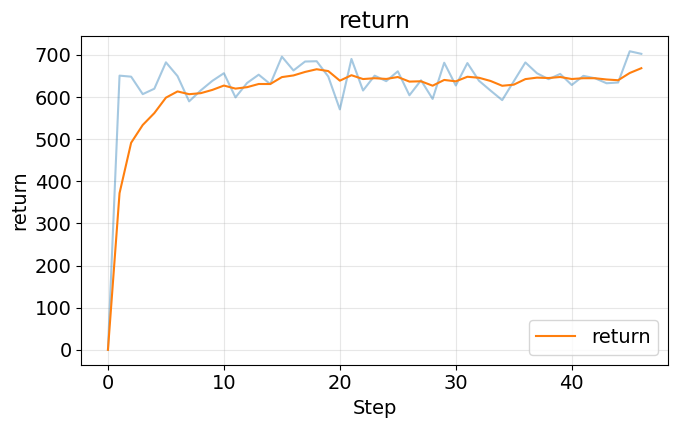

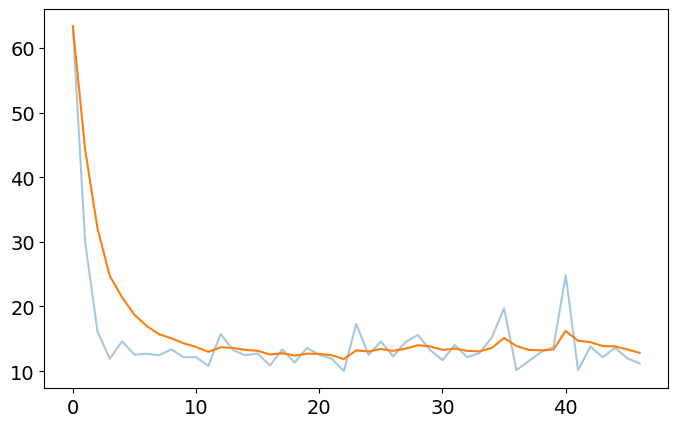

In [42]:
##################PLOTTING####################33
#--------------return------------------
fig, ax = plt.subplots()
ax.plot(atcp_action_250_return["Value"], alpha=0.4)
ax.plot(atcp_action_250_return["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "return")
# ax.set_ylim(67,80)
plt.xlabel('Step')
plt.ylabel('return')
plt.title("return")
plt.grid(alpha=0.3)
plt.legend()
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("return.svg", format="svg", dpi=100)

#--------------delay------------------
fig, ax = plt.subplots()
ax.plot(atcp_action_250_delay["Value"], alpha=0.4)
ax.plot(atcp_action_250_delay["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "delay_action")
ax.plot(atcp_no_action_250_delay["Value"], alpha=0.4)
ax.plot(atcp_no_action_250_delay["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "delay_no_action")
# ax.set_ylim(67,80)
plt.xlabel('Step')
plt.ylabel('delay')
plt.title("delay")
plt.grid(alpha=0.3)
plt.legend()
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("delay.svg", format="svg", dpi=100)

#--------------throughput------------------
fig, ax = plt.subplots()
ax.plot(atcp_action_250_throughput["Value"], alpha=0.4)
ax.plot(atcp_action_250_throughput["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "throughput_action")
ax.plot(atcp_no_action_250_throughput["Value"], alpha=0.4)
ax.plot(atcp_no_action_250_throughput["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "throughput_no_action")
# ax.set_ylim(67,80)
plt.xlabel('Step')
plt.ylabel('throughput')
plt.title("throughput")
plt.grid(alpha=0.3)
plt.legend()
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("throughput.svg", format="svg", dpi=100)

#--------------renergy------------------
fig, ax = plt.subplots()
ax.plot(atcp_action_250_renergy["Value"], alpha=0.4)
ax.plot(atcp_action_250_renergy["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "renergy_action")
ax.plot(atcp_no_action_250_renergy["Value"], alpha=0.4)
ax.plot(atcp_no_action_250_renergy["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "renergy_no_action")
# ax.set_ylim(67,80)
plt.xlabel('Step')
plt.ylabel('renergy')
plt.title("renergy")
plt.grid(alpha=0.3)
plt.legend()
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("renergy.svg", format="svg", dpi=100)

#--------------engcons------------------
fig, ax = plt.subplots()
ax.plot(atcp_action_250_engcons["Value"], alpha=0.4)
ax.plot(atcp_action_250_engcons["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "engcons_action")
ax.plot(atcp_no_action_250_engcons["Value"], alpha=0.4)
ax.plot(atcp_no_action_250_engcons["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "engcons_no_action")
# ax.set_ylim(67,80)
plt.xlabel('Step')
plt.ylabel('engcons')
plt.title("engcons")
plt.grid(alpha=0.3)
plt.legend()
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("engcons.svg", format="svg", dpi=100)

#--------------engconsvar------------------
fig, ax = plt.subplots()
ax.plot(atcp_action_250_engconsvar["Value"], alpha=0.4)
ax.plot(atcp_action_250_engconsvar["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "engconsvar_action")
ax.plot(atcp_no_action_250_engconsvar["Value"], alpha=0.4)
ax.plot(atcp_no_action_250_engconsvar["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "engconsvar_no_action")
# ax.set_ylim(67,80)
plt.xlabel('Step')
plt.ylabel('engconsvar')
plt.title("engconsvar")
plt.grid(alpha=0.3)
plt.legend()
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("engconsvar.svg", format="svg", dpi=100)

#--------------renergy------------------
fig, ax = plt.subplots()
ax.plot(atcp_action_250_renergy["Value"], alpha=0.4)
ax.plot(atcp_action_250_renergy["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "renergy_action")
ax.plot(atcp_no_action_250_renergy["Value"], alpha=0.4)
ax.plot(atcp_no_action_250_renergy["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "renergy_no_action")
# ax.set_ylim(67,80)
plt.xlabel('Step')
plt.ylabel('renergy')
plt.title("renergy")
plt.grid(alpha=0.3)
plt.legend()
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("renergy.svg", format="svg", dpi=100)

#--------------txpacket------------------
fig, ax = plt.subplots()
ax.plot(atcp_action_250_txpacket["Value"], alpha=0.4)
ax.plot(atcp_action_250_txpacket["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "txpacket_action")
ax.plot(atcp_no_action_250_txpacket["Value"], alpha=0.4)
ax.plot(atcp_no_action_250_txpacket["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "txpacket_no_action")
# ax.set_ylim(67,80)
plt.xlabel('Step')
plt.ylabel('txpacket')
plt.title("txpacket")
plt.grid(alpha=0.3)
plt.legend()
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("txpacket.svg", format="svg", dpi=100)

#--------------rxpacket------------------
fig, ax = plt.subplots()
ax.plot(atcp_action_250_rxpacket["Value"], alpha=0.4)
ax.plot(atcp_action_250_rxpacket["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "rxpacket_action")
ax.plot(atcp_no_action_250_rxpacket["Value"], alpha=0.4)
ax.plot(atcp_no_action_250_rxpacket["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "rxpacket_no_action")
# ax.set_ylim(67,80)
plt.xlabel('Step')
plt.ylabel('rxpacket')
plt.title("rxpacket")
plt.grid(alpha=0.3)
plt.legend()
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("rxpacket.svg", format="svg", dpi=100)

#--------------rxpacketin------------------
fig, ax = plt.subplots()
ax.plot(atcp_action_250_rxpacketin["Value"], alpha=0.4)
ax.plot(atcp_action_250_rxpacketin["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "rxpacketin_action")
ax.plot(atcp_no_action_250_rxpacketin["Value"], alpha=0.4)
ax.plot(atcp_no_action_250_rxpacketin["Value"].ewm(alpha=(1 - TSBOARD_SMOOTHING[0])).mean(), label = "rxpacketin_no_action")
# ax.set_ylim(67,80)
plt.xlabel('Step')
plt.ylabel('rxpacketin')
plt.title("rxpacketin")
plt.grid(alpha=0.3)
plt.legend()
plt.gcf()
# plt.show()
plt.draw()
plt.savefig("rxpacketin.svg", format="svg", dpi=100)

